# Исследовательский Анализ Данных Недвижимости Санкт-Петербурга

##  Вводная информация
Цель проекта - выполнение предобработки данных, поиск интересных особенностей и зависимости, которые существуют на рынке недвижимости.

Исходные данные - файл real_estate_data.csv, о каждом объекте недвижимости имеются 2 типа данных: добавленные пользователем (площадь квартиры, ее этаж, количество балконов и т.д.) и картографические (расстояние до центра города, до аэропорта и ближайшего парка).

##  Оглавление

<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Вводная-информация" data-toc-modified-id="Вводная-информация-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Вводная информация</a></span></li><li><span><a href="#Оглавление" data-toc-modified-id="Оглавление-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Оглавление</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Приведение-названий-столбцов-к-единому-стилю" data-toc-modified-id="Приведение-названий-столбцов-к-единому-стилю-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Приведение названий столбцов к единому стилю</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Обработка-типов-данных" data-toc-modified-id="Обработка-типов-данных-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Обработка типов данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Поиск-аномальных-значений" data-toc-modified-id="Поиск-аномальных-значений-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Поиск аномальных значений</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Добавление-новых-столбцов" data-toc-modified-id="Добавление-новых-столбцов-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Добавление новых столбцов</a></span></li><li><span><a href="#Изучение-отдельных-параметров" data-toc-modified-id="Изучение-отдельных-параметров-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Изучение отдельных параметров</a></span></li><li><span><a href="#Изучение-скорости-продажи-квартиры" data-toc-modified-id="Изучение-скорости-продажи-квартиры-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Изучение скорости продажи квартиры</a></span></li><li><span><a href="#Поиск-факторов,-наиболее-влияющих-на-стоимость" data-toc-modified-id="Поиск-факторов,-наиболее-влияющих-на-стоимость-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Поиск факторов, наиболее влияющих на стоимость</a></span></li><li><span><a href="#Влияние-локации-на-стоимость" data-toc-modified-id="Влияние-локации-на-стоимость-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Влияние локации на стоимость</a></span></li><li><span><a href="#Влияние-отдаленности-от-центра-Санкт-Петербурга-на-стоимость" data-toc-modified-id="Влияние-отдаленности-от-центра-Санкт-Петербурга-на-стоимость-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Влияние отдаленности от центра Санкт-Петербурга на стоимость</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

##  Обзор данных

Импорт библиотек

In [1]:
!pip install missingno -U 

In [2]:
import pandas as pd
from IPython.display import display
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

Импорт данных из файла и ознакомление с структурой датафрейма

In [3]:
try:
    from io import BytesIO
    import requests
    spreadsheet_id = '11LxUXGoVHevpypN_3hGBLIoKkGxXhFPqZdpEnYX0v1s'
    file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
    r = requests.get(file_name)
    data = pd.read_csv(BytesIO(r.content))

except:
    data = pd.read_csv('/datasets/real_estate_data.csv')

In [4]:
data.info()

display(data.head())
pd.set_option('display.max_columns', None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0   2019-03-07 0:00:00      3   
1             7   3350000.0        40.4   2018-12-04 0:00:00      1   
2            10   5196000.0        56.0   2015-08-20 0:00:00      2   
3             0  64900000.0       159.0   2015-07-24 0:00:00      3   
4             2  10000000.0       100.0   2018-06-19 0:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1          11.0      2.0   посёлок Шушары           12817.0   
2           8.3      0.0  Санкт-Петербург           21741.0   
3           NaN      0.0  Санкт-Петербург           28098.0   
4          41.0      NaN  Санкт-Петербург           31856.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0            NaN               0.0   
2             13933.0               1.0           90.0               2.0   
3              6800.0               2.0           84.0               3.0   
4              8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  

[5 rows x 22 columns]

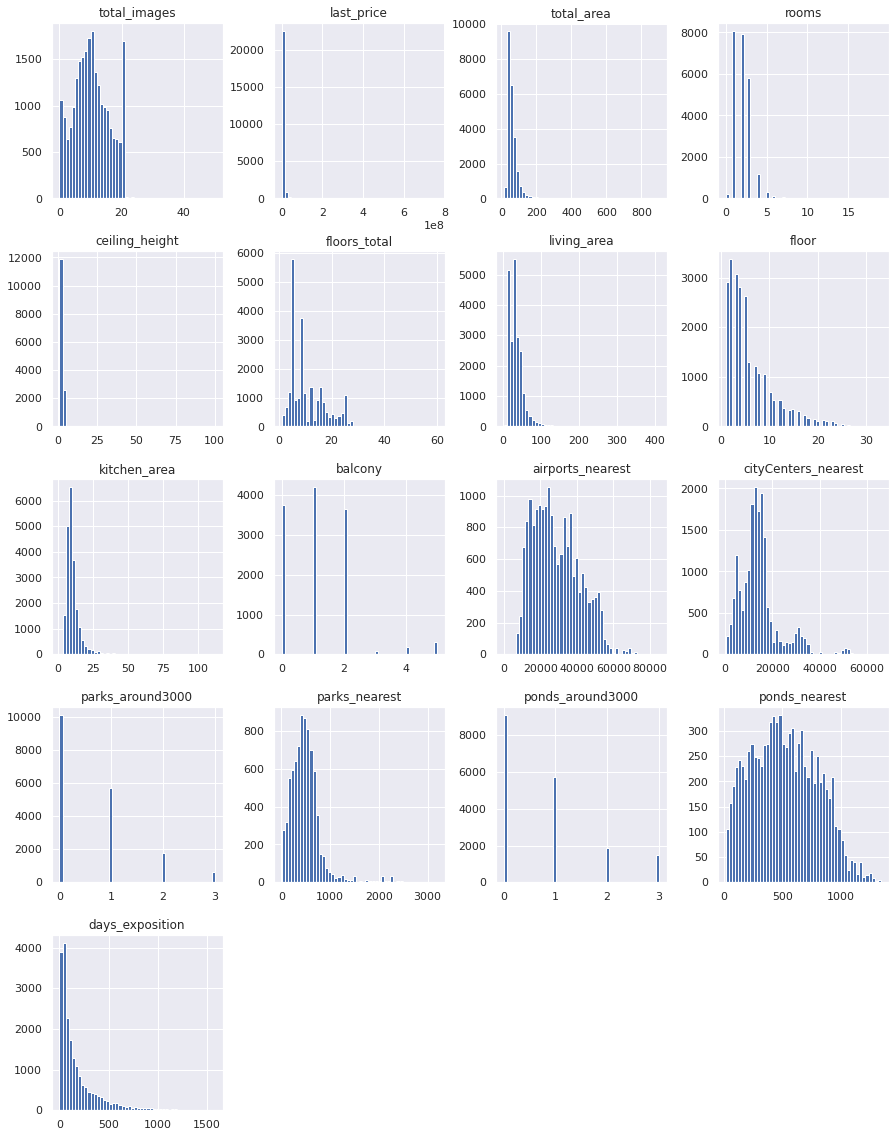

In [5]:
data.hist(figsize= (15,20), bins= 50);

##  Предобработка данных

###  Приведение названий столбцов к единому стилю

In [6]:
data = data.rename(columns= {'cityCenters_nearest': 'city_centers_nearest'})

###  Обработка пропусков 

**Поиск пропусков**

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
(data.isna().sum() / len(data)).round(4).sort_values(ascending= False) * 100

is_apartment            88.29
parks_nearest           65.91
ponds_nearest           61.56
balcony                 48.61
ceiling_height          38.80
airports_nearest        23.38
city_centers_nearest    23.29
ponds_around3000        23.28
parks_around3000        23.28
days_exposition         13.42
kitchen_area             9.61
living_area              8.03
floors_total             0.36
locality_name            0.21
total_images             0.00
last_price               0.00
studio                   0.00
floor                    0.00
rooms                    0.00
first_day_exposition     0.00
total_area               0.00
open_plan                0.00
dtype: float64

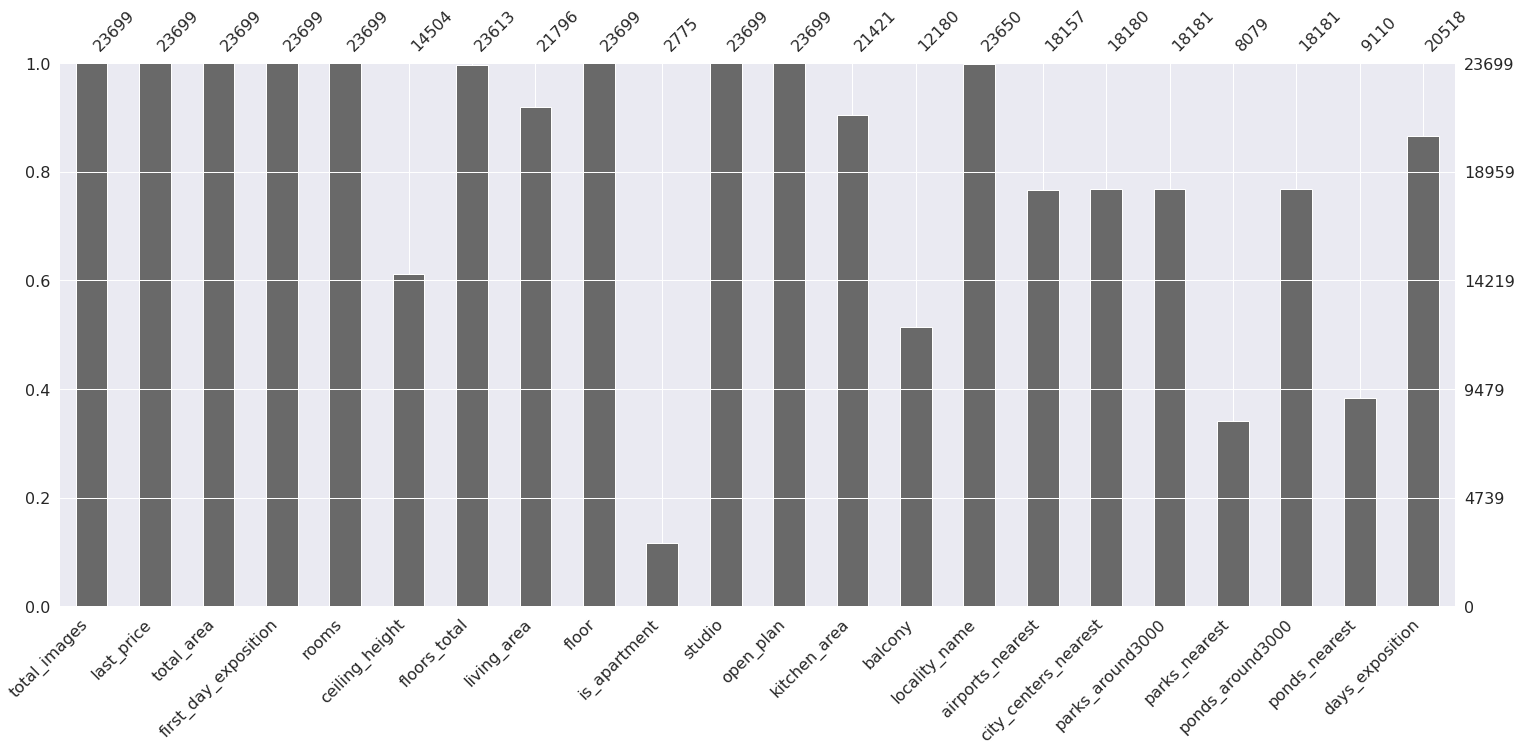

In [9]:
msno.bar(data);

**Гипотезы о появлении пропусков**

Пропуски - отрицательные показатели категории:
- Больше всего пропусков в данных о статусе апартаментов (88%) - данные пропуски скорее всего можно тем, что статус апартаментов глобально встречается редко и данные не заполнялись, если квартира не была апартаментами. Пропуски можно заполнить значениями соответствующим значением. Аналогичная ситуация с наличием/отсутствием балкона - при отсуствии балкона продавец решил не указывать данную информацию, при его наличии - наоборот не забыл продемонстрировать данный бонус недвижимости.

Пропуски в данных о потолках: 
- Можно предположить, что высота потолка является относительно стандартной величиной и ее могут не указывать в ординарных случаях. Следует заменить медианой.
  
Пропуски в картографических данных:
- Пропуски в картографических данных делятся по своим масштабам на 2 группы - с пропусками около 65% (ближайшие пруды и ближайшие парки) и с пропусками около 25% (расстояния до ближайшего аэропорта, центра города, количество прудов в радиусе 3 км и кол-во парков в р. 3 км). 
- _Гипотеза появления пропусков:_ Размещение данной информации требует от продавца дополнительных усилий (поиск объектов на карте, рассчет расстояний) и некоторые продавцы считают данную информацию излишней (усилия по заполнению не окупятся, квартира "уйдет" и так), в связи с чем они ее не заполняют. Предварительно данная гипотеза подтверждается тем, что проценты пропусков практически совпадают - если продавец решил, что картографические данные излишни, то он не будет заполнять их совсем и таким образом пропуски будут по всем соответствующим столбцам. Однако часть продавцов все же решила добавить данные по аэропортам, центру города и паркам, прудам в радиусе, как по относительно востребованным показателям, и пропусков тут уже меньше. Требуется проверить данное предположение и затем принять решение о методе обработки пропусков.

Менее частые пропуски:
 - Имеющиеся пропуски в данных о длительности размещения объявления скорее всего связаны с техническими факторами, не заполняются продавцом вручную. Если в процессе дальнейшего анализа не обнаружится иная взаимосвязь, то данные пропуски можно будет заполнить медианой.

- Пропуски в площадях кухни и гостиной можно объяснить аналогично пропускам в геоданных - требуются дополнительные усилия продавца, не влияющие на скорость/стоимость продажи. Можно заполнить медианой имеющихся значений.

- Пропуски в локации объекта вероятно объясняются техническими факторами.

**Проверка взаимосвязей в имеющихся данных**

In [10]:
data.corr()

total_images  last_price  total_area     rooms  \
total_images              1.000000    0.104473    0.115352  0.099288   
last_price                0.104473    1.000000    0.653675  0.363343   
total_area                0.115352    0.653675    1.000000  0.758344   
rooms                     0.099288    0.363343    0.758344  1.000000   
ceiling_height           -0.001987    0.085430    0.095490  0.054457   
floors_total              0.010427   -0.006984   -0.075774 -0.228215   
living_area               0.104780    0.566492    0.939537  0.845977   
floor                     0.031340    0.026576   -0.024754 -0.150862   
studio                   -0.029303   -0.025362   -0.072653 -0.147286   
open_plan                -0.024407   -0.008802   -0.034885 -0.087500   
kitchen_area              0.104756    0.519869    0.609121  0.269945   
balcony                   0.121693    0.029646    0.047937  0.017991   
airports_nearest         -0.002298   -0.026239   -0.030753 -0.061199   
city_centers_nearest     -0.047666   -0.206747   -0.231446 -0.184864   
parks_around3000          0.021120    0.151058    0.164689  0.137257   
parks_nearest            -0.008347   -0.016414   -0.021497 -0.054549   
ponds_around3000         -0.011553    0.159996    0.162346  0.092693   
ponds_nearest            -0.003034   -0.084809   -0.097969 -0.057689   
days_exposition          -0.026657    0.081146    0.149675  0.126961   

                      ceiling_height  floors_total  living_area     floor  \
total_images               -0.001987      0.010427     0.104780  0.031340   
last_price                  0.085430     -0.006984     0.566492  0.026576   
total_area                  0.095490     -0.075774     0.939537 -0.024754   
rooms                       0.054457     -0.228215     0.845977 -0.150862   
ceiling_height              1.000000     -0.028732     0.090650 -0.011798   
floors_total               -0.028732      1.000000    -0.169311  0.678059   
living_area                 0.090650     -0.169311     1.000000 -0.097210   
floor                      -0.011798      0.678059    -0.097210  1.000000   
studio                      0.001674      0.070151    -0.056231  0.036940   
open_plan                   0.042777      0.050791    -0.033711  0.035824   
kitchen_area                0.087641      0.163944     0.428674  0.135531   
balcony                     0.040523      0.194065     0.018849  0.168773   
airports_nearest           -0.023947      0.108288    -0.057912  0.071597   
city_centers_nearest       -0.091689      0.019774    -0.231368  0.009084   
parks_around3000            0.065915     -0.252833     0.184453 -0.163784   
parks_nearest              -0.019167      0.097527    -0.050167  0.073045   
ponds_around3000            0.078209     -0.122735     0.148933 -0.076312   
ponds_nearest              -0.059090      0.038864    -0.081674  0.024850   
days_exposition             0.019091     -0.052234     0.142454 -0.039463   

                        studio  open_plan  kitchen_area   balcony  \
total_images         -0.029303  -0.024407      0.104756  0.121693   
last_price           -0.025362  -0.008802      0.519869  0.029646   
total_area           -0.072653  -0.034885      0.609121  0.047937   
rooms                -0.147286  -0.087500      0.269945  0.017991   
ceiling_height        0.001674   0.042777      0.087641  0.040523   
floors_total          0.070151   0.050791      0.163944  0.194065   
living_area          -0.056231  -0.033711      0.428674  0.018849   
floor                 0.036940   0.035824      0.135531  0.168773   
studio                1.000000  -0.004235           NaN  0.031455   
open_plan            -0.004235   1.000000           NaN  0.019491   
kitchen_area               NaN        NaN      1.000000  0.098634   
balcony               0.031455   0.019491      0.098634  1.000000   
airports_nearest     -0.021876  -0.013583      0.008200  0.066834   
city_centers_nearest -0.007029  -0.004204     -0.190049  0.051051   
parks

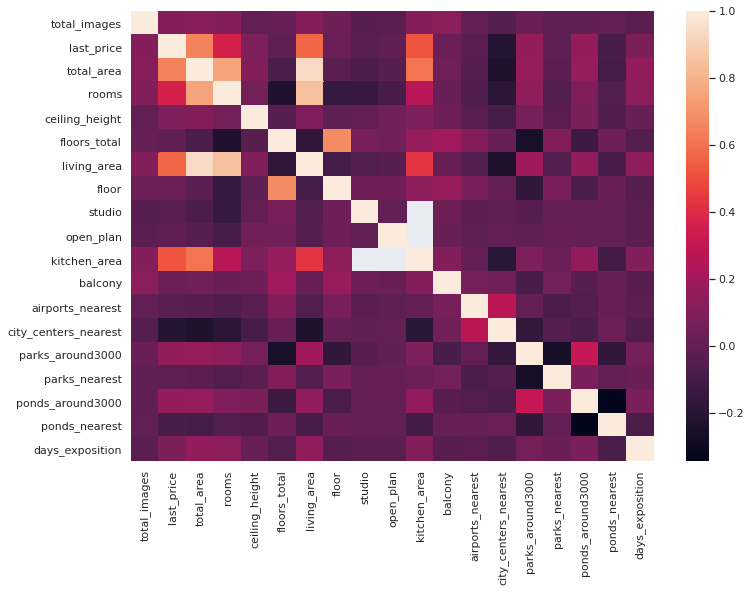

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data.corr());

Видна четкая положительная корреляция между стоимостью квартиры и всеми метриками площадей, с количеством комнат связь уже не такая сильная, однако в некоторой мере присутствует. Это укладывается в общую логику и ожидаемо - чем больше объект недвижимости, тем он дороже.

**Проверка взаимосвязи пропусков между собой**

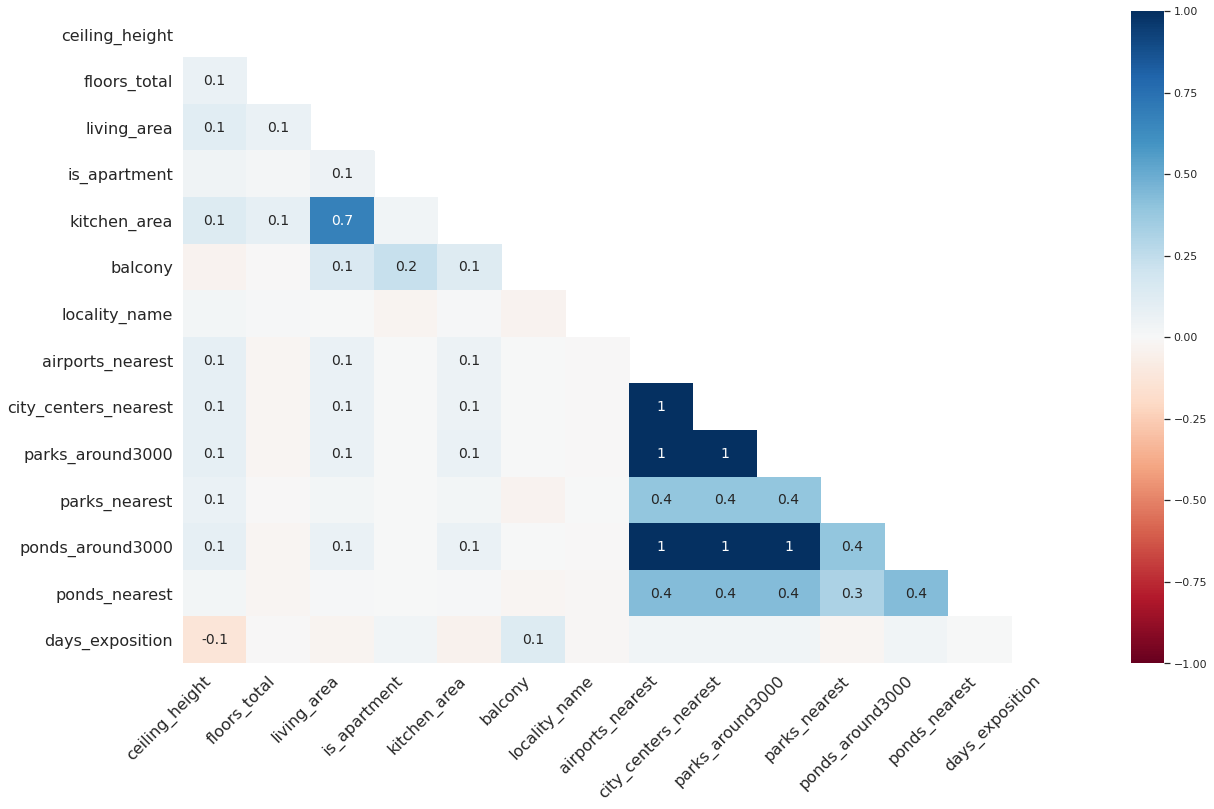

In [12]:
msno.heatmap(data);

Видно, что имеется 2 группы записей с пропусками в одинаковых переменных (картографические данные), как мы это уже заметили прежде. Здесь это представлено более наглядно.

**Проверка взаимосвязей имеющихся количественных данных с пропусками**

Для данной проверки был использован метод, визуализирующий все пропуски в датафрейме - пропуск отображается белым цветом, заполненное значение - черным. Таким образом, сортируя значения по каждой переменной по очереди и сопоставляя отсортированный столбец по очереди с остальными столбцами, можно отследить структуру пропусков по другим значениям. Это может быть прямая корреляция, обратная корреляция, отсутствие связи с структурой пропусков или же более сложная взаимосвязь.
Оценка взаимосвязи происходит визуально - отсортированный столбец и сопоставляемый примерно делятся на равные участки и затем идет оценка изменения плотности цвета в сопоставляемом столбце по мере продвижения вдоль отсортированного.
Данным методом можно лишь примерно оценить факт корреляции и ее направление. К тому же данный метод приведет к ошибочным методам при неравномерном распределении значений в отсортированном столбце, что справделиво как для категориальных данных, так и для значений с нормальным распределением. Например, если рассматривать количественный показатель с распредлением по гауссу, то при равной количестве пропусков на отрезок вдоль всего столбца, это будет по факту означать увеличенный процент пропусков при крайних значениях отсортированного столбца. Аналогично если поделить гауссиану на равные отрезки, и отметить, что в каждом отрезке количество пропусков совпадает, то из-за меньшего количества записей в крайних участках такое же количество пропусков будет означать их больший процент. Однако визуально это может быть расценено как отсутствие структуры взаимосвязи.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Данные отсортированы в порядке возрастания total_images.


total_images  last_price  total_area first_day_exposition  rooms  \
18226             0  10500000.0       111.3   2017-09-26 0:00:00      4   
2421              0   1900000.0        58.8   2018-02-01 0:00:00      3   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
18226             3.2           5.0         72.8      1          NaN   False   
2421              2.5           5.0         44.0      1          NaN   False   

       open_plan  kitchen_area  balcony            locality_name  \
18226      False          15.3      NaN          Санкт-Петербург   
2421       False           5.2      NaN  городской посёлок Назия   

       airports_nearest  city_centers_nearest  parks_around3000  \
18226           16877.0                8408.0               1.0   
2421                NaN                   NaN               NaN   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  
18226          461.0               3.0          588.0            134.0  
2421             NaN               NaN            NaN             93.0

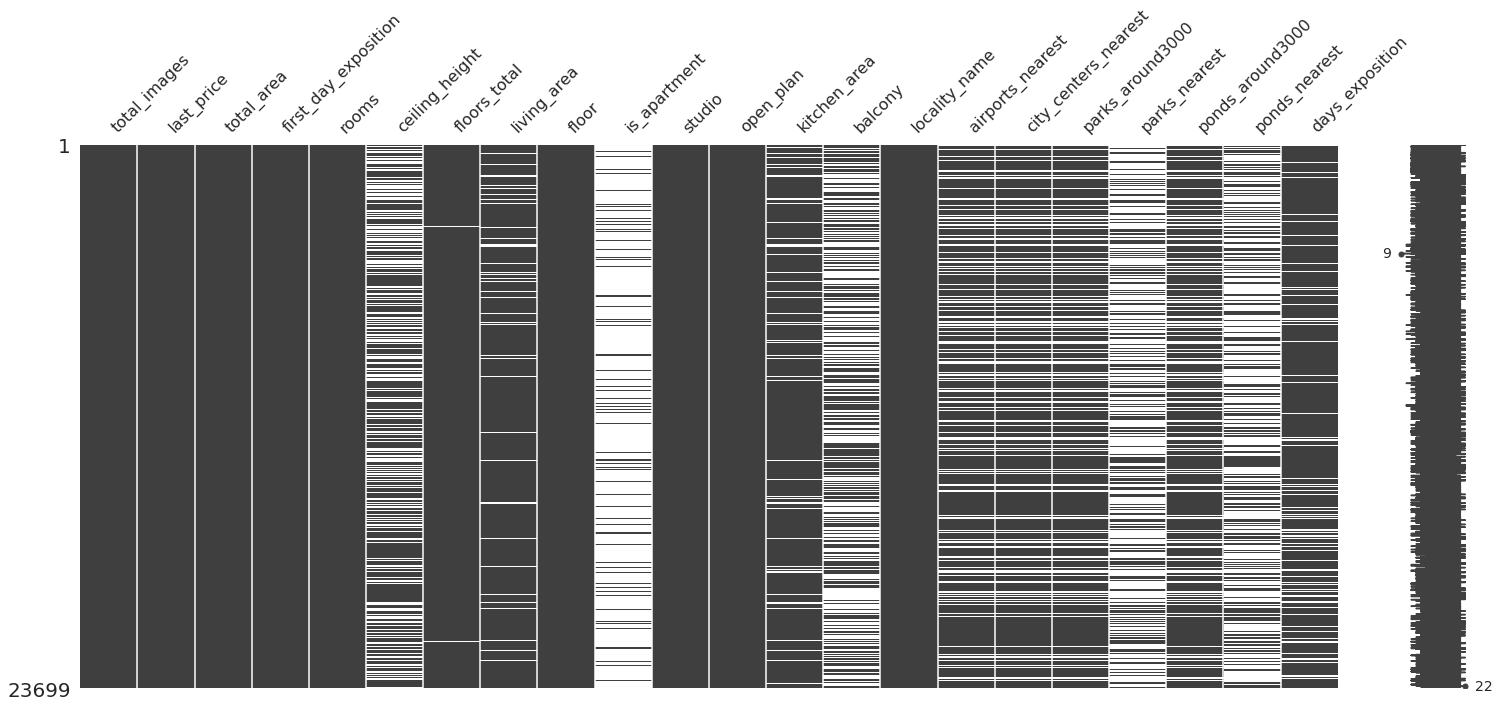

Данные отсортированы в порядке возрастания last_price.


total_images  last_price  total_area first_day_exposition  rooms  \
8793              7     12190.0       109.0   2019-03-20 0:00:00      2   
17456             7    430000.0        30.4   2019-04-22 0:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
8793             2.75          25.0         32.0     25          NaN   False   
17456             NaN           2.0         16.0      1          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
8793       False          40.5      NaN  Санкт-Петербург           36421.0   
17456      False           6.0      NaN           Сланцы               NaN   

       city_centers_nearest  parks_around3000  parks_nearest  \
8793                 9176.0               1.0          805.0   
17456                   NaN               NaN            NaN   

       ponds_around3000  ponds_nearest  days_exposition  
8793                0.0            NaN              8.0  
17456               NaN            NaN              NaN

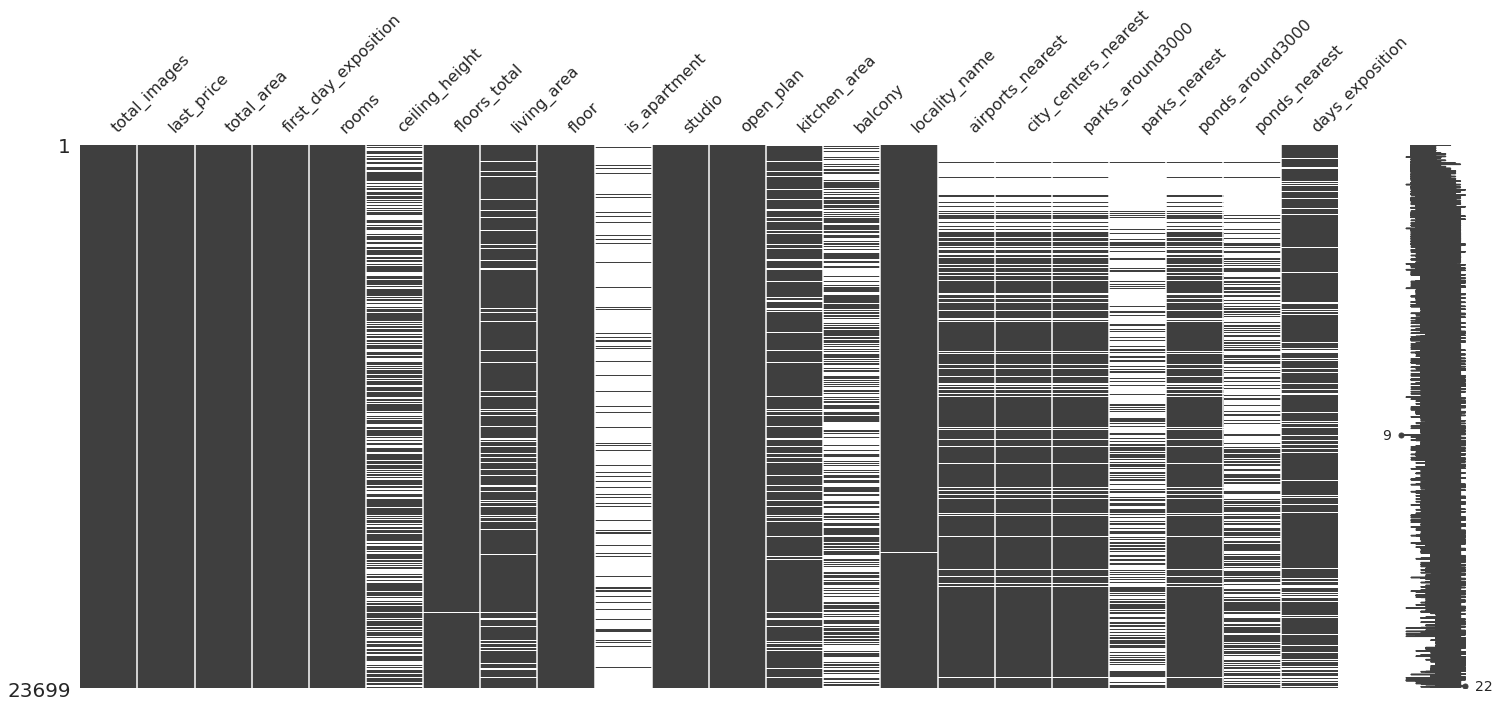

Данные отсортированы в порядке возрастания total_area.


total_images  last_price  total_area first_day_exposition  rooms  \
19904             4   2400000.0        12.0   2017-07-19 0:00:00      1   
17961             3   1400000.0        13.0   2017-12-03 0:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
19904            2.55           5.0         10.0      2          NaN   False   
17961            2.60           9.0          NaN      1          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
19904      False           NaN      NaN  Санкт-Петербург           21314.0   
17961      False           NaN      NaN  Санкт-Петербург           14350.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
19904                 964.0               1.0          886.0   
17961               15945.0               0.0            NaN   

       ponds_around3000  ponds_nearest  days_exposition  
19904               2.0           45.0            200.0  
17961               1.0          185.0            410.0

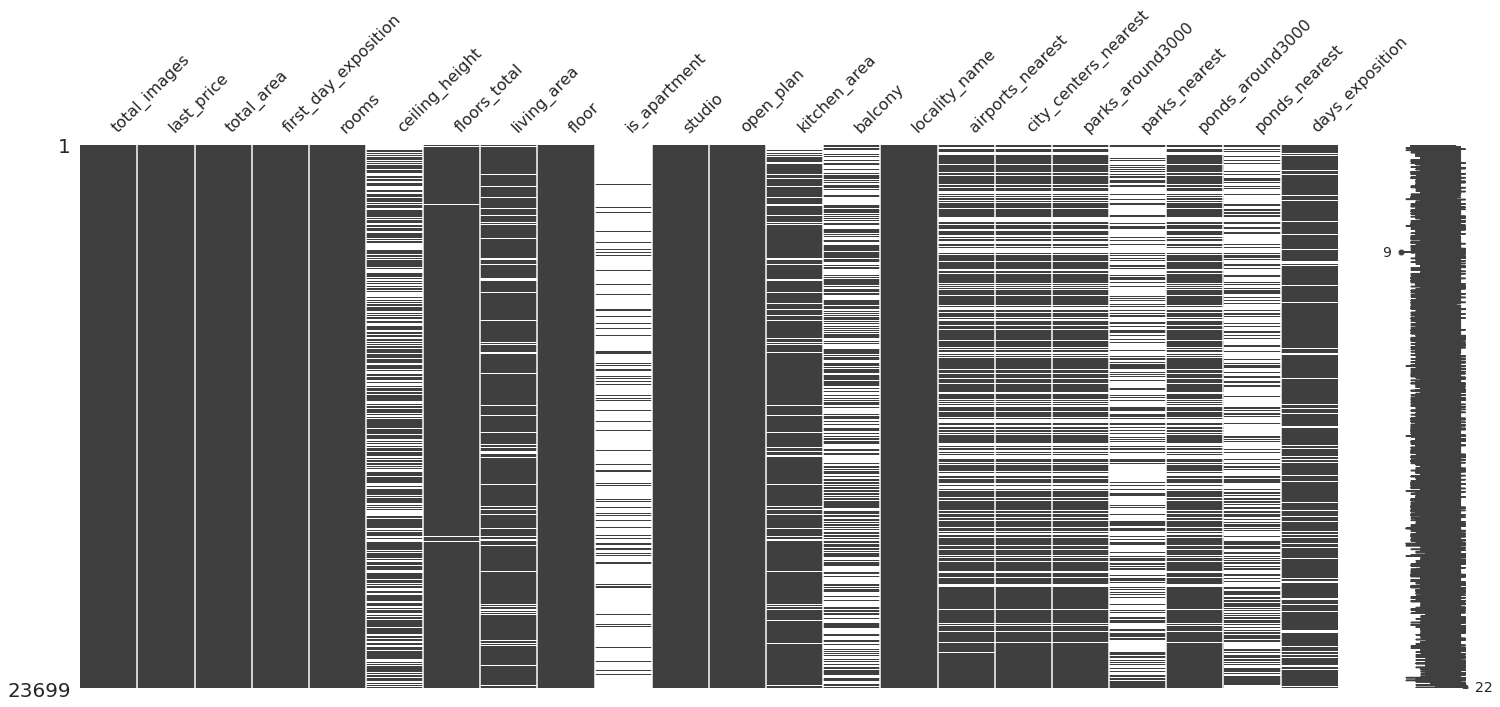

Данные отсортированы в порядке возрастания first_day_exposition.


total_images  last_price  total_area first_day_exposition  rooms  \
10132             2  16137000.0      154.76   2014-11-27 0:00:00      4   
8393             10   8037000.0       56.20   2014-11-27 0:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
10132             2.7          20.0        67.81     20          NaN   False   
8393              NaN           5.0        24.20      5        False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
10132      False         32.55      0.0  Санкт-Петербург           18490.0   
8393       False         12.90      0.0  Санкт-Петербург           36813.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
10132               17492.0               0.0            NaN   
8393                 8572.0               1.0         2467.0   

       ponds_around3000  ponds_nearest  days_exposition  
10132               2.0          113.0            573.0  
8393                3.0          214.0            972.0

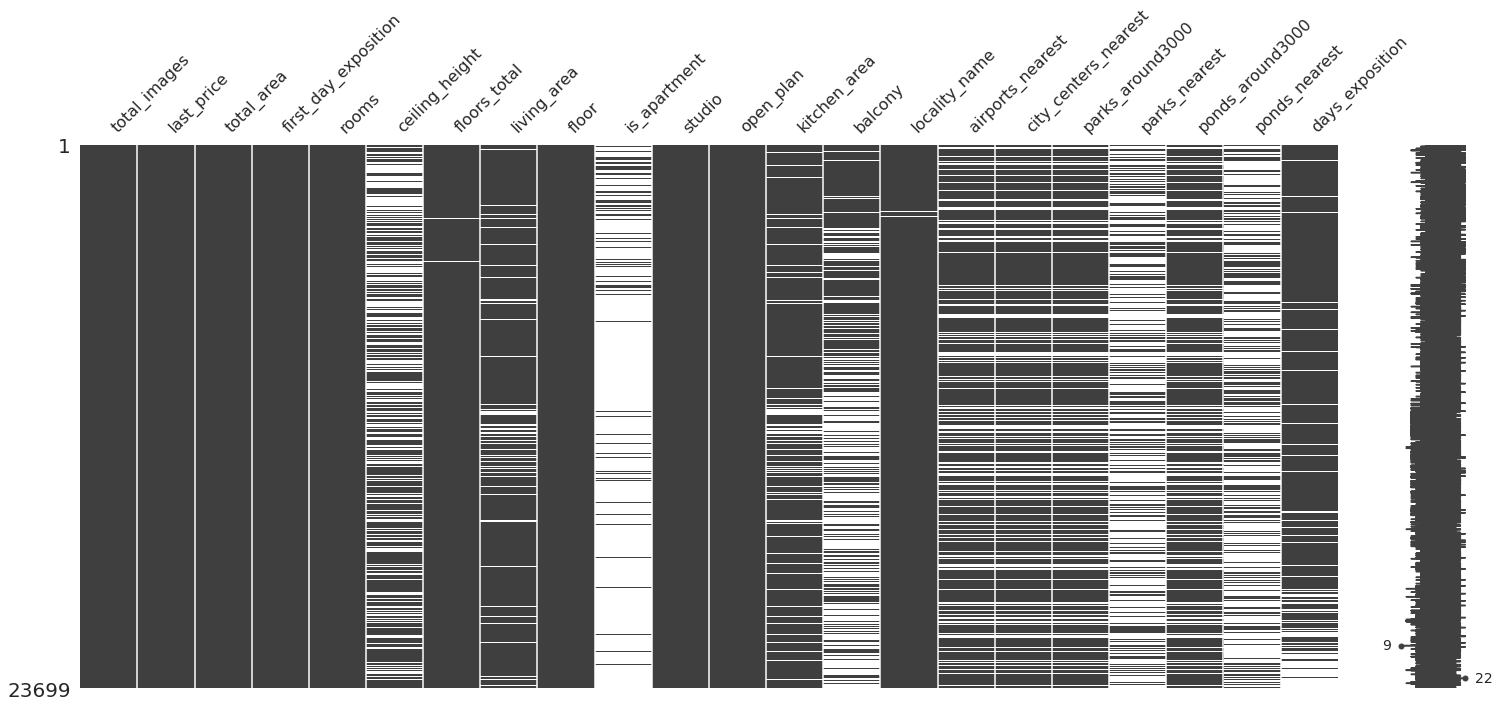

Данные отсортированы в порядке возрастания rooms.


total_images  last_price  total_area first_day_exposition  rooms  \
9412             5   2100000.0        16.0   2017-12-10 0:00:00      0   
8886            10   2450000.0        15.5   2018-08-22 0:00:00      0   

      ceiling_height  floors_total  living_area  floor is_apartment  studio  \
9412             NaN           6.0         13.0      1          NaN   False   
8886             NaN           5.0         10.0      2          NaN    True   

      open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
9412       True           NaN      NaN  Санкт-Петербург           20735.0   
8886      False           NaN      NaN  Санкт-Петербург           24326.0   

      city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
9412                2111.0               2.0          228.0               3.0   
8886                4589.0               0.0            NaN               1.0   

      ponds_nearest  days_exposition  
9412           72.0              3.0  
8886          446.0             27.0

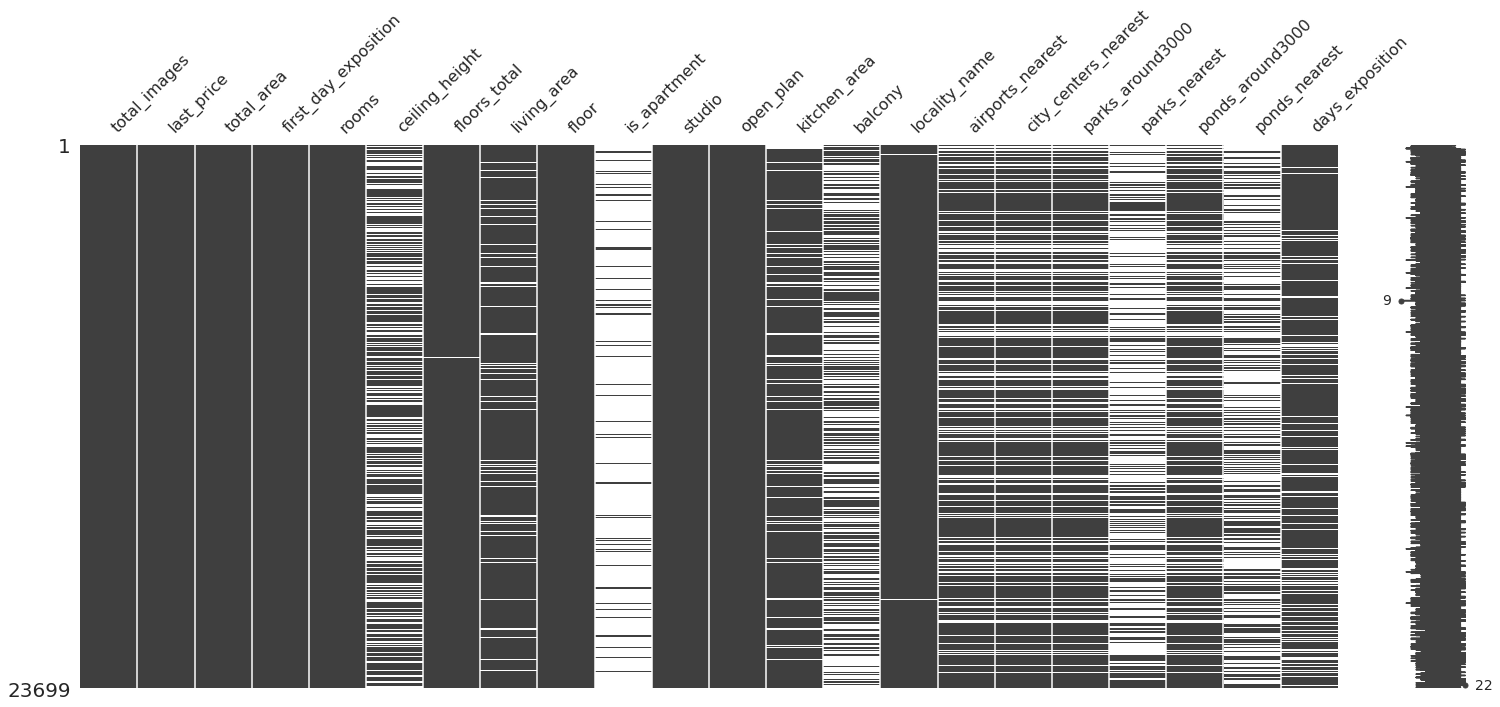

Данные отсортированы в порядке возрастания ceiling_height.


total_images  last_price  total_area first_day_exposition  rooms  \
22590            16   6000000.0        55.0   2018-10-31 0:00:00      2   
5712              5   1500000.0        42.8   2017-08-14 0:00:00      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
22590             1.0          12.0         32.4      7          NaN   False   
5712              1.2           2.0         27.5      1          NaN   False   

       open_plan  kitchen_area  balcony          locality_name  \
22590      False          10.0      NaN        Санкт-Петербург   
5712       False           5.2      NaN  городской посёлок Мга   

       airports_nearest  city_centers_nearest  parks_around3000  \
22590           33053.0               14217.0               2.0   
5712                NaN                   NaN               NaN   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  
22590          293.0               2.0          289.0             13.0  
5712             NaN               NaN            NaN            248.0

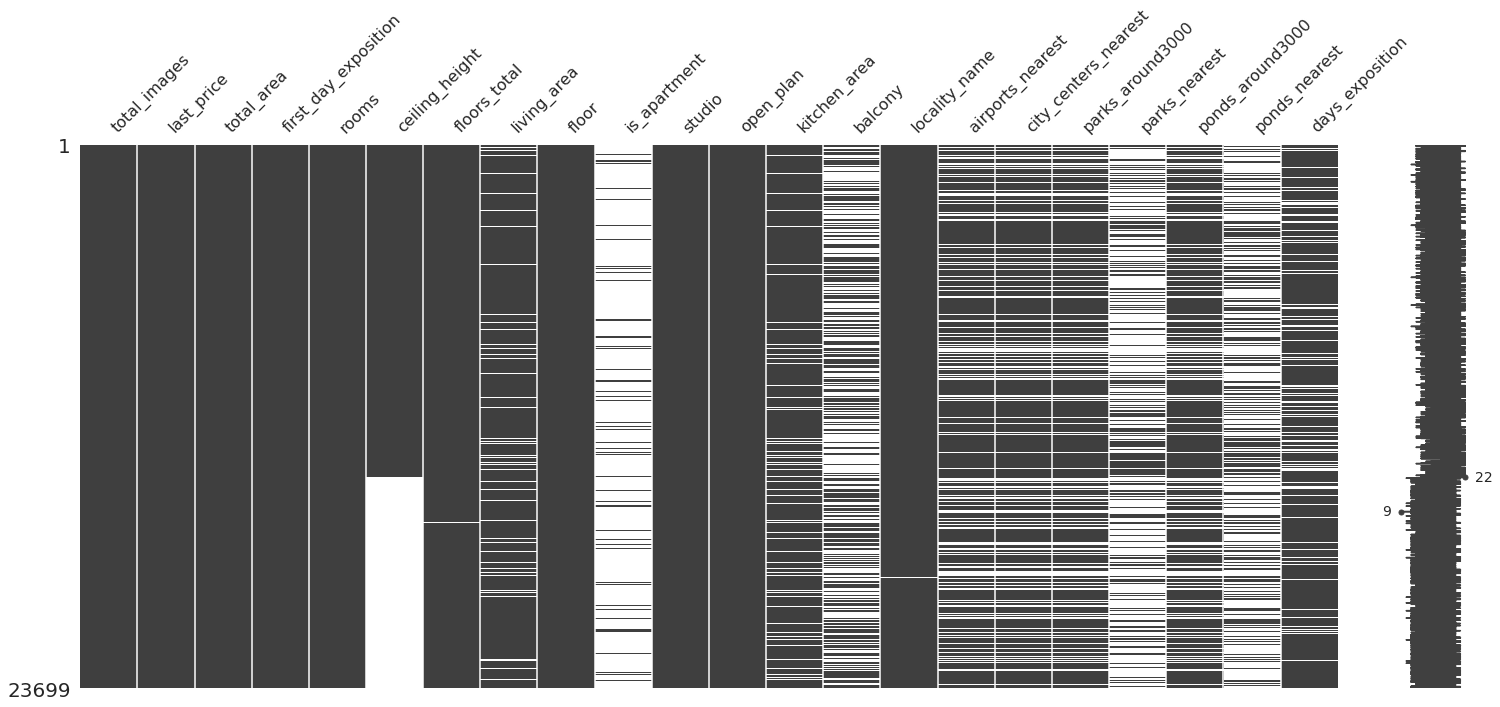

Данные отсортированы в порядке возрастания floors_total.


total_images  last_price  total_area first_day_exposition  rooms  \
8335            10   2700000.0        80.0   2018-07-07 0:00:00      3   
5300             5   2990000.0        60.0   2018-11-15 0:00:00      3   

      ceiling_height  floors_total  living_area  floor is_apartment  studio  \
8335             3.0           1.0         45.0      1          NaN   False   
5300             NaN           1.0         50.0      1          NaN   False   

      open_plan  kitchen_area  balcony           locality_name  \
8335      False          15.0      NaN                    Луга   
5300      False          10.0      NaN  поселок станции Вещево   

      airports_nearest  city_centers_nearest  parks_around3000  parks_nearest  \
8335               NaN                   NaN               NaN            NaN   
5300               NaN                   NaN               NaN            NaN   

      ponds_around3000  ponds_nearest  days_exposition  
8335               NaN            NaN             51.0  
5300               NaN            NaN             40.0

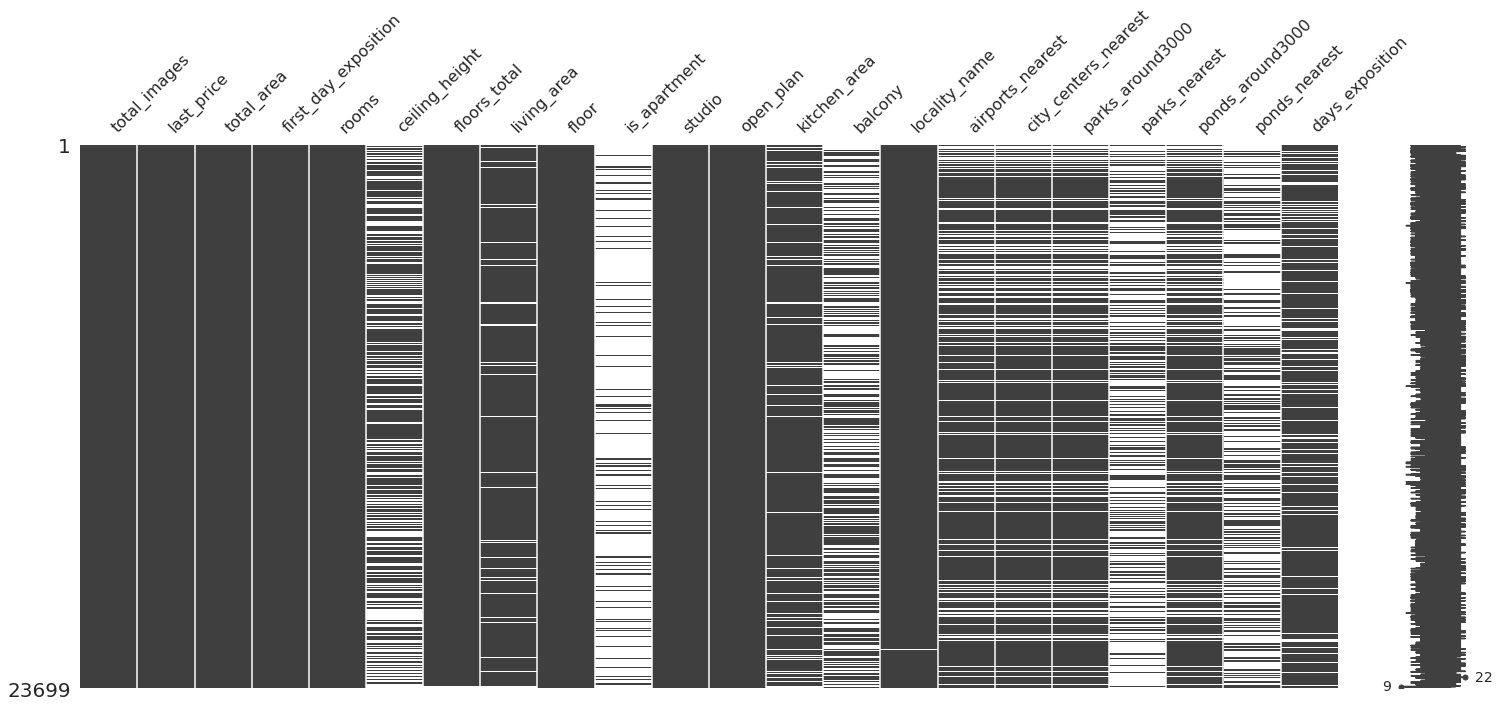

Данные отсортированы в порядке возрастания living_area.


total_images  last_price  total_area first_day_exposition  rooms  \
21758             0   2330000.0        23.0   2018-01-01 0:00:00      0   
13915            20   6350000.0        52.0   2018-02-06 0:00:00      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
21758             NaN          24.0          2.0     22          NaN    True   
13915             3.0           6.0          2.0      2          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
21758      False           NaN      NaN   посёлок Мурино               NaN   
13915      False           9.0      NaN  Санкт-Петербург           32453.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
21758                   NaN               NaN            NaN   
13915                6521.0               0.0            NaN   

       ponds_around3000  ponds_nearest  days_exposition  
21758               NaN            NaN             66.0  
13915               1.0         1012.0             91.0

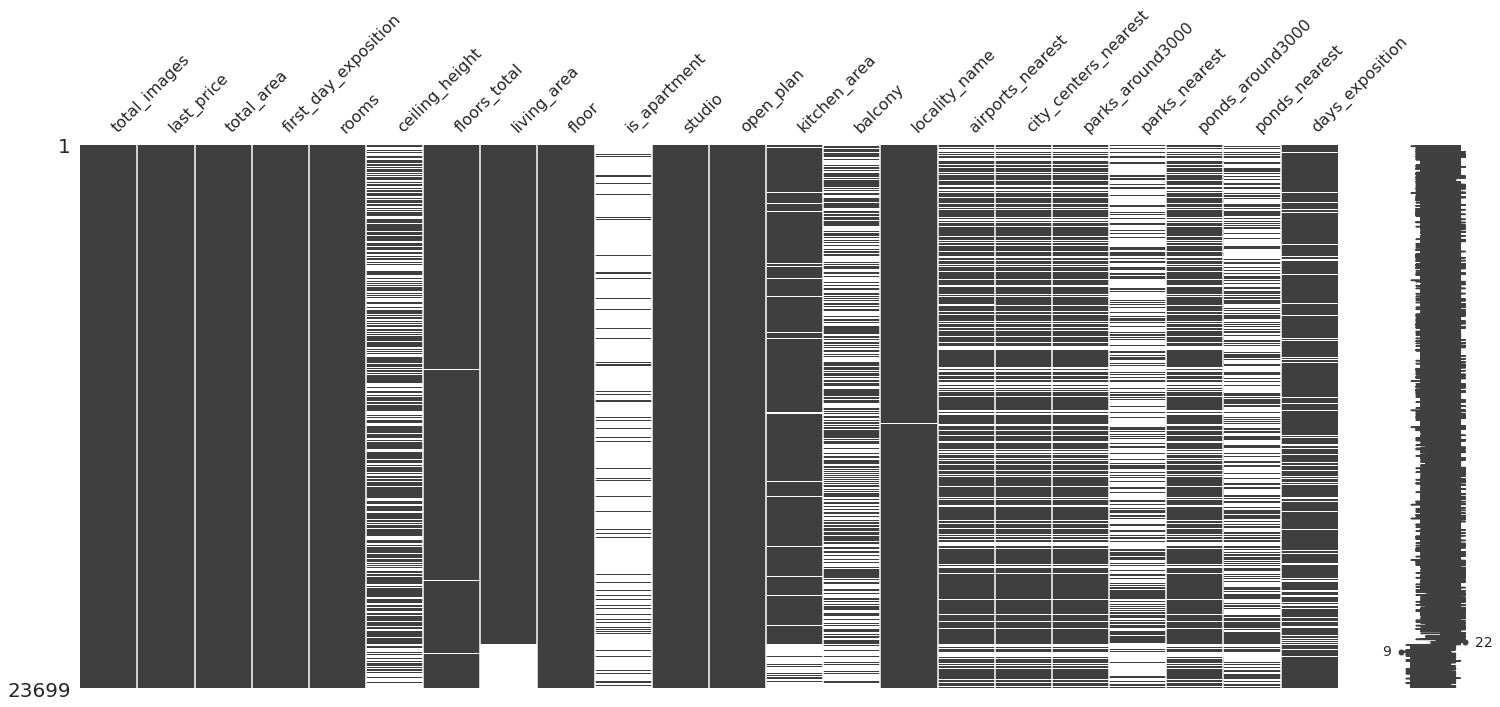

Данные отсортированы в порядке возрастания floor.


total_images  last_price  total_area first_day_exposition  rooms  \
11849             8   3700000.0        55.8   2017-03-03 0:00:00      3   
9838             16   2950000.0        35.5   2017-01-09 0:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
11849             NaN           5.0         41.1      1          NaN   False   
9838              2.6          18.0         17.9      1          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
11849      False           5.3      0.0         Петергоф           37498.0   
9838       False           8.9      NaN  Санкт-Петербург           41759.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
11849               32687.0               2.0          136.0   
9838                21048.0               0.0            NaN   

       ponds_around3000  ponds_nearest  days_exposition  
11849               3.0          146.0            220.0  
9838                1.0          164.0            626.0

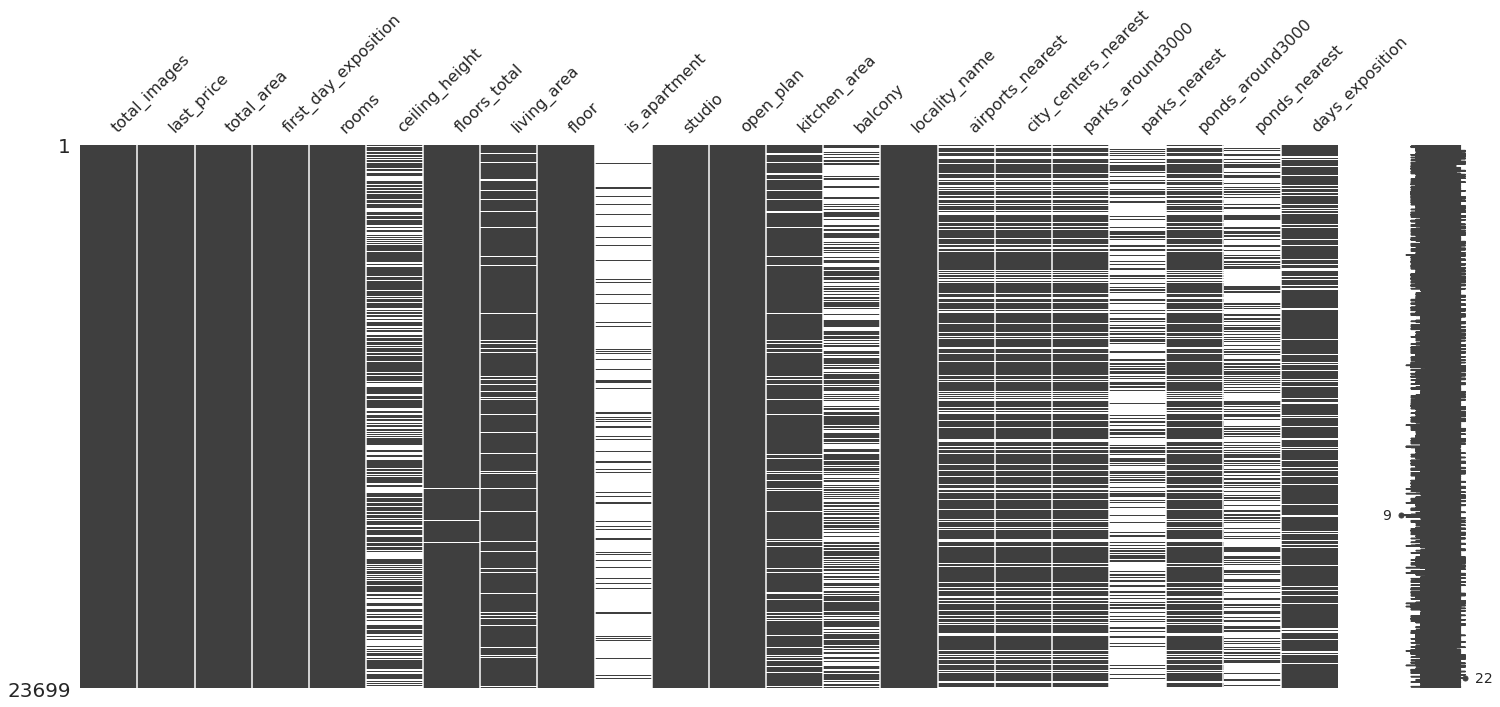

Данные отсортированы в порядке возрастания is_apartment.


total_images  last_price  total_area first_day_exposition  rooms  \
11                9   3300000.0        44.0   2018-08-27 0:00:00      2   
15765             8   1720000.0        33.0   2017-09-25 0:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
11                NaN           5.0         31.0      4        False   False   
15765            2.55           5.0         15.0      4        False   False   

       open_plan  kitchen_area  balcony                    locality_name  \
11         False           6.0      1.0                        Ломоносов   
15765      False           8.3      1.0  посёлок городского типа Лебяжье   

       airports_nearest  city_centers_nearest  parks_around3000  \
11              48252.0               51677.0               0.0   
15765               NaN                   NaN               NaN   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  
11               NaN               0.0            NaN              7.0  
15765            NaN               NaN            NaN            581.0

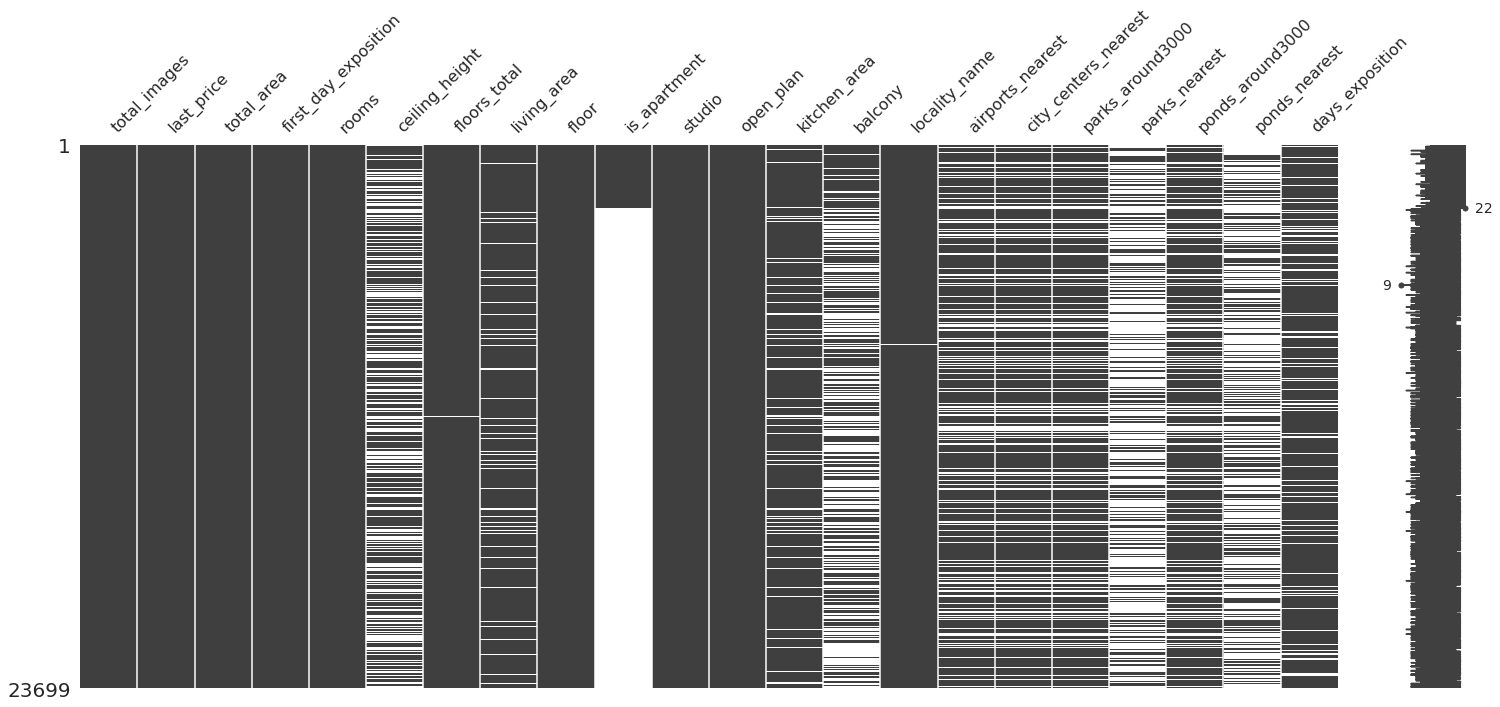

Данные отсортированы в порядке возрастания studio.


total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0       108.0   2019-03-07 0:00:00      3   
15776             8   3950000.0        48.8   2017-03-09 0:00:00      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0                 2.7          16.0         51.0      8          NaN   False   
15776             3.0           5.0         28.7      5          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0          False          25.0      NaN  Санкт-Петербург           18863.0   
15776      False           8.4      0.0          Колпино           24943.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
0                   16028.0               1.0          482.0   
15776               30729.0               1.0          392.0   

       ponds_around3000  ponds_nearest  days_exposition  
0                   2.0          755.0              NaN  
15776               0.0            NaN            245.0

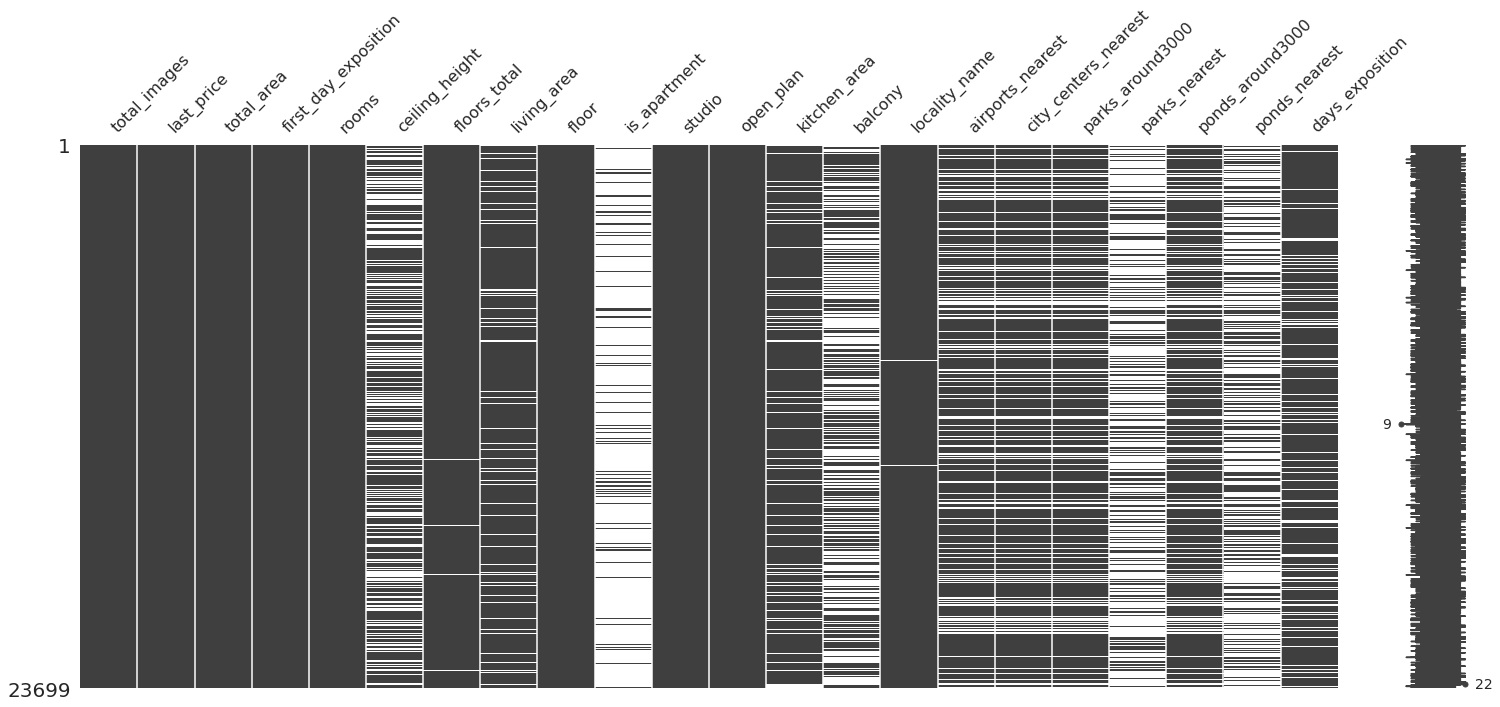

Данные отсортированы в порядке возрастания open_plan.


total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0       108.0   2019-03-07 0:00:00      3   
15792            13   5800000.0        70.0   2018-09-04 0:00:00      3   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0                 2.7          16.0         51.0      8          NaN   False   
15792             2.5           9.0         42.9      8          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0          False          25.0      NaN  Санкт-Петербург           18863.0   
15792      False           8.4      2.0     Сосновый Бор               NaN   

       city_centers_nearest  parks_around3000  parks_nearest  \
0                   16028.0               1.0          482.0   
15792                   NaN               NaN            NaN   

       ponds_around3000  ponds_nearest  days_exposition  
0                   2.0          755.0              NaN  
15792               NaN            NaN             65.0

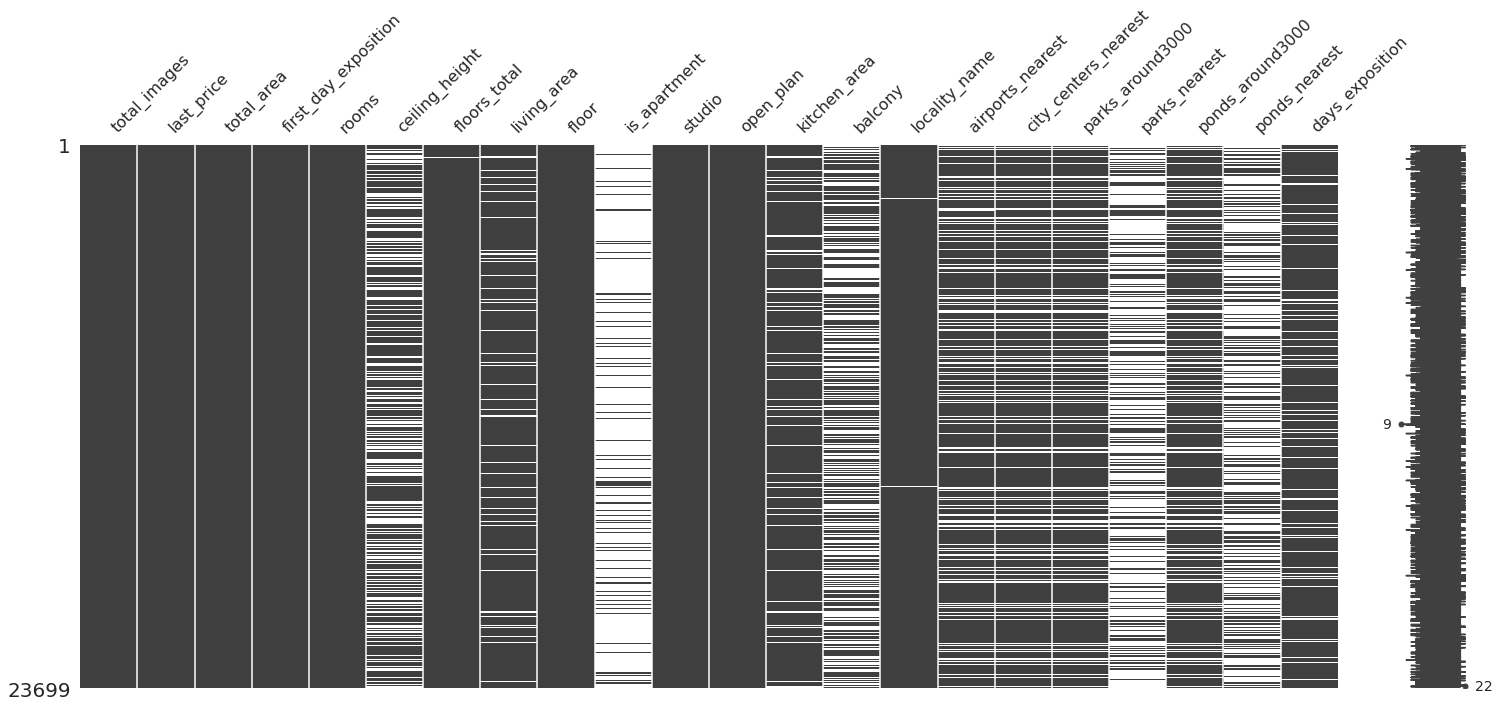

Данные отсортированы в порядке возрастания kitchen_area.


total_images  last_price  total_area first_day_exposition  rooms  \
20217             7   4250000.0       28.50   2019-05-01 0:00:00      1   
9138             17   2920000.0       23.29   2018-12-12 0:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
20217             2.8          14.0         19.5     10          NaN   False   
9138              NaN           3.0         21.0      1          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
20217      False           1.3      NaN  Санкт-Петербург           37199.0   
9138       False           2.0      NaN  Санкт-Петербург           19506.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
20217               12721.0               0.0            NaN   
9138                 4008.0               0.0            NaN   

       ponds_around3000  ponds_nearest  days_exposition  
20217               0.0            NaN              NaN  
9138                2.0           45.0            107.0

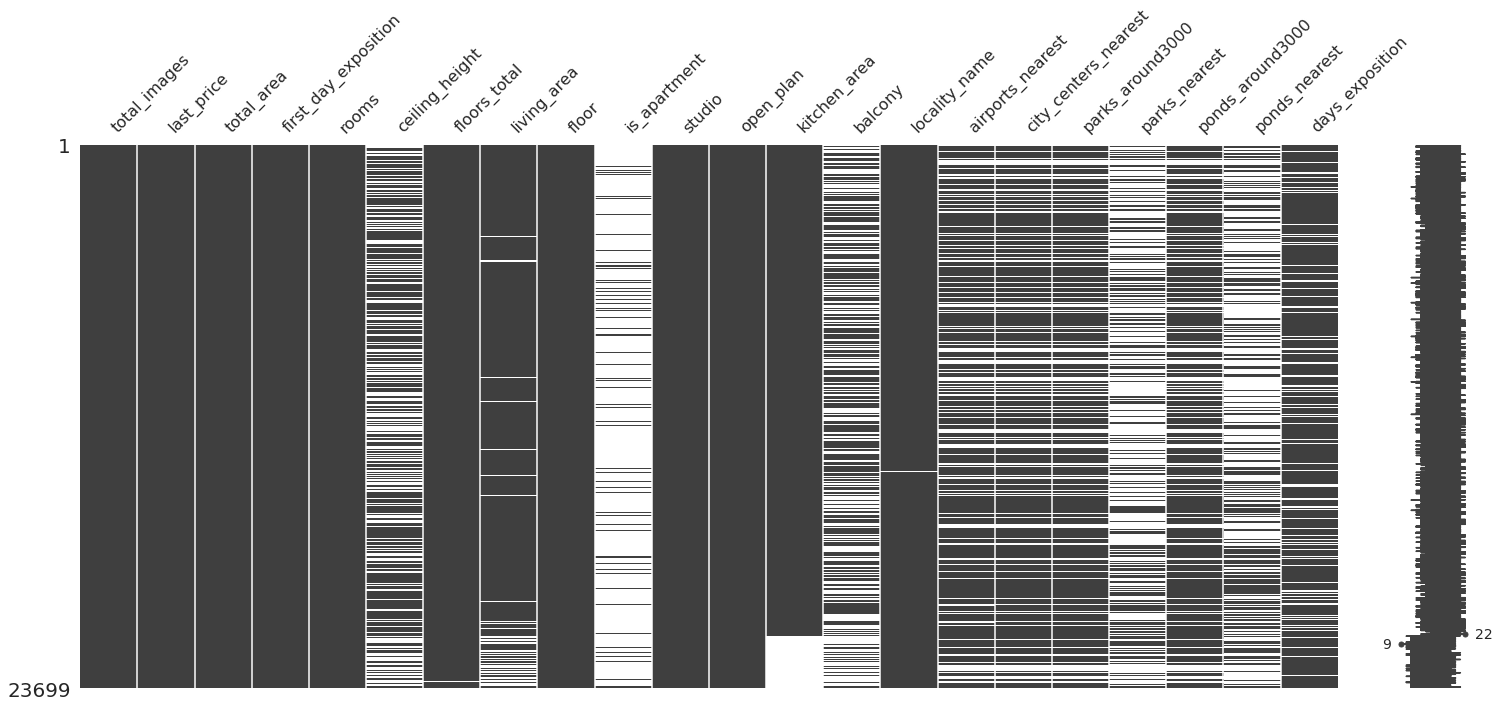

Данные отсортированы в порядке возрастания balcony.


total_images  last_price  total_area first_day_exposition  rooms  \
8614             7  10990000.0       100.0   2015-12-16 0:00:00      3   
6320            12   3458944.0        41.2   2015-11-26 0:00:00      1   

      ceiling_height  floors_total  living_area  floor is_apartment  studio  \
8614             3.9           5.0         37.8      3          NaN   False   
6320             NaN          24.0         17.8     13          NaN   False   

      open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
8614      False          11.6      0.0  Санкт-Петербург           21818.0   
6320      False          10.4      0.0  Санкт-Петербург           21793.0   

      city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
8614                 215.0               3.0          229.0               2.0   
6320               17121.0               0.0            NaN               1.0   

      ponds_nearest  days_exposition  
8614          511.0            265.0  
6320           31.0            588.0

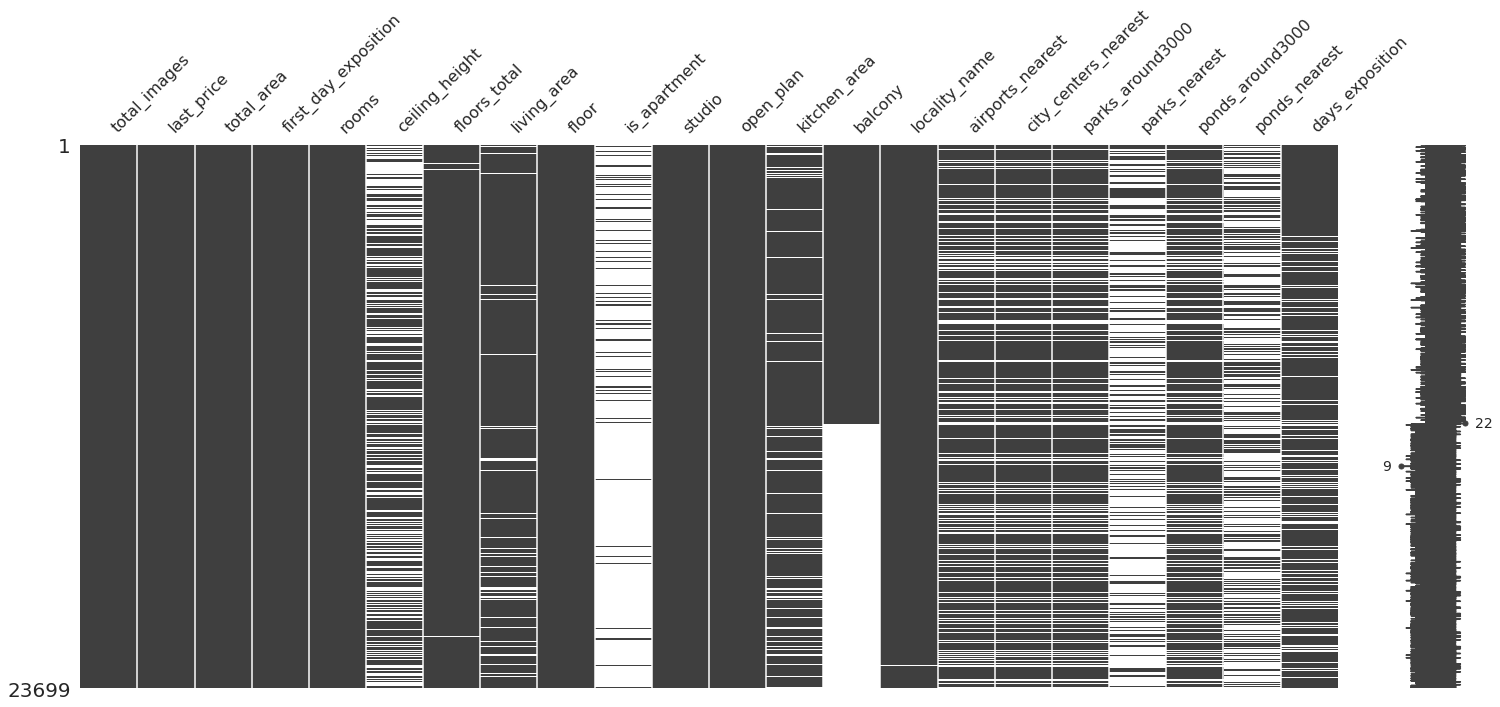

Данные отсортированы в порядке возрастания locality_name.


total_images  last_price  total_area first_day_exposition  rooms  \
1053            13    550000.0        29.0   2018-02-01 0:00:00      1   
764              4    950000.0        44.0   2018-05-05 0:00:00      2   

      ceiling_height  floors_total  living_area  floor is_apartment  studio  \
1053             5.0           3.0          NaN      1        False   False   
764              NaN           5.0          NaN      2          NaN   False   

      open_plan  kitchen_area  balcony locality_name  airports_nearest  \
1053      False           NaN      NaN  Бокситогорск               NaN   
764       False           6.0      1.0  Бокситогорск               NaN   

      city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
1053                   NaN               NaN            NaN               NaN   
764                    NaN               NaN            NaN               NaN   

      ponds_nearest  days_exposition  
1053            NaN              6.0  
764             NaN            156.0

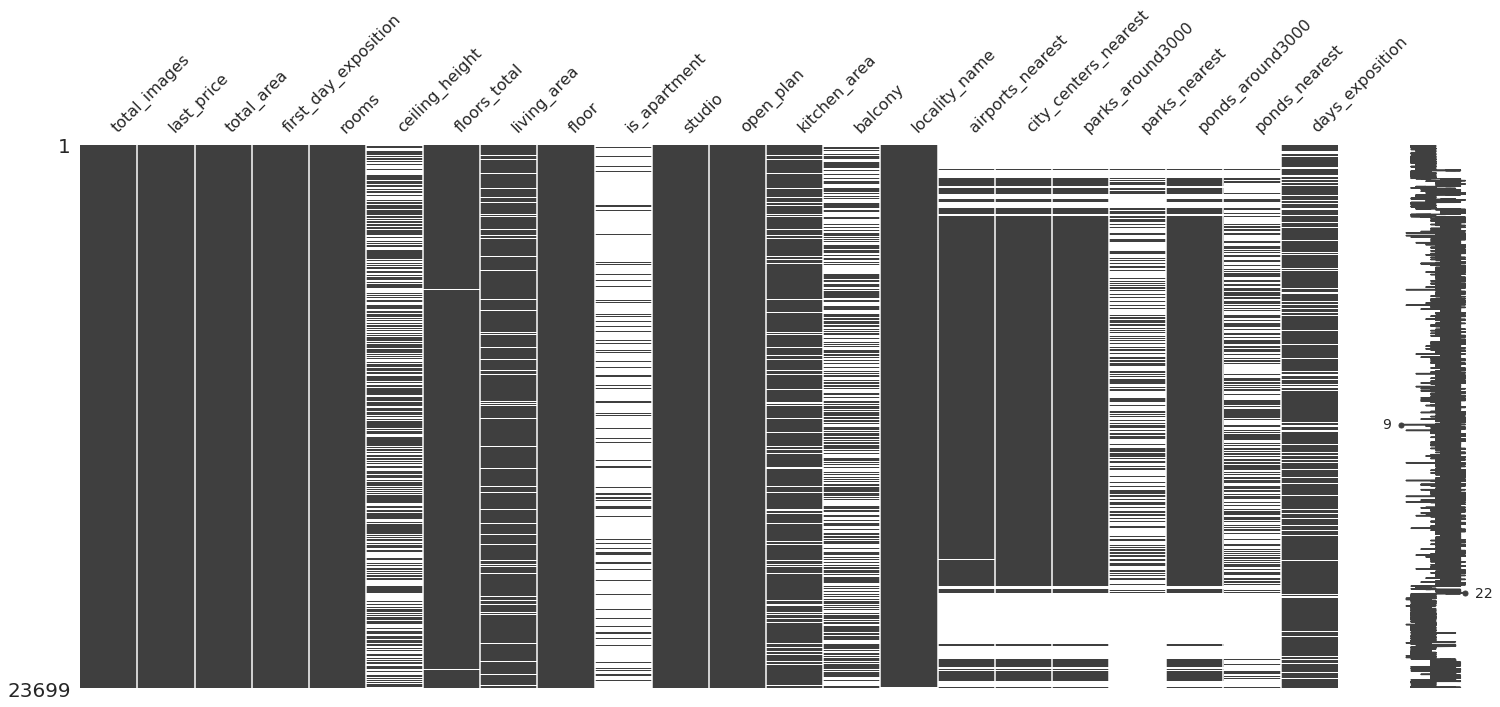

Данные отсортированы в порядке возрастания airports_nearest.


total_images  last_price  total_area first_day_exposition  rooms  \
21085             0   7000000.0        34.7   2018-09-23 0:00:00      1   
12899             8   4199000.0        56.0   2017-12-21 0:00:00      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
21085             2.7           9.0         19.8      3          NaN   False   
12899             NaN           9.0         27.0      5          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
21085      False           6.0      2.0  Санкт-Петербург               0.0   
12899      False          15.0      NaN  Санкт-Петербург            6450.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
21085               22801.0               0.0            NaN   
12899               17461.0               0.0            NaN   

       ponds_around3000  ponds_nearest  days_exposition  
21085               0.0            NaN             60.0  
12899               1.0          444.0             24.0

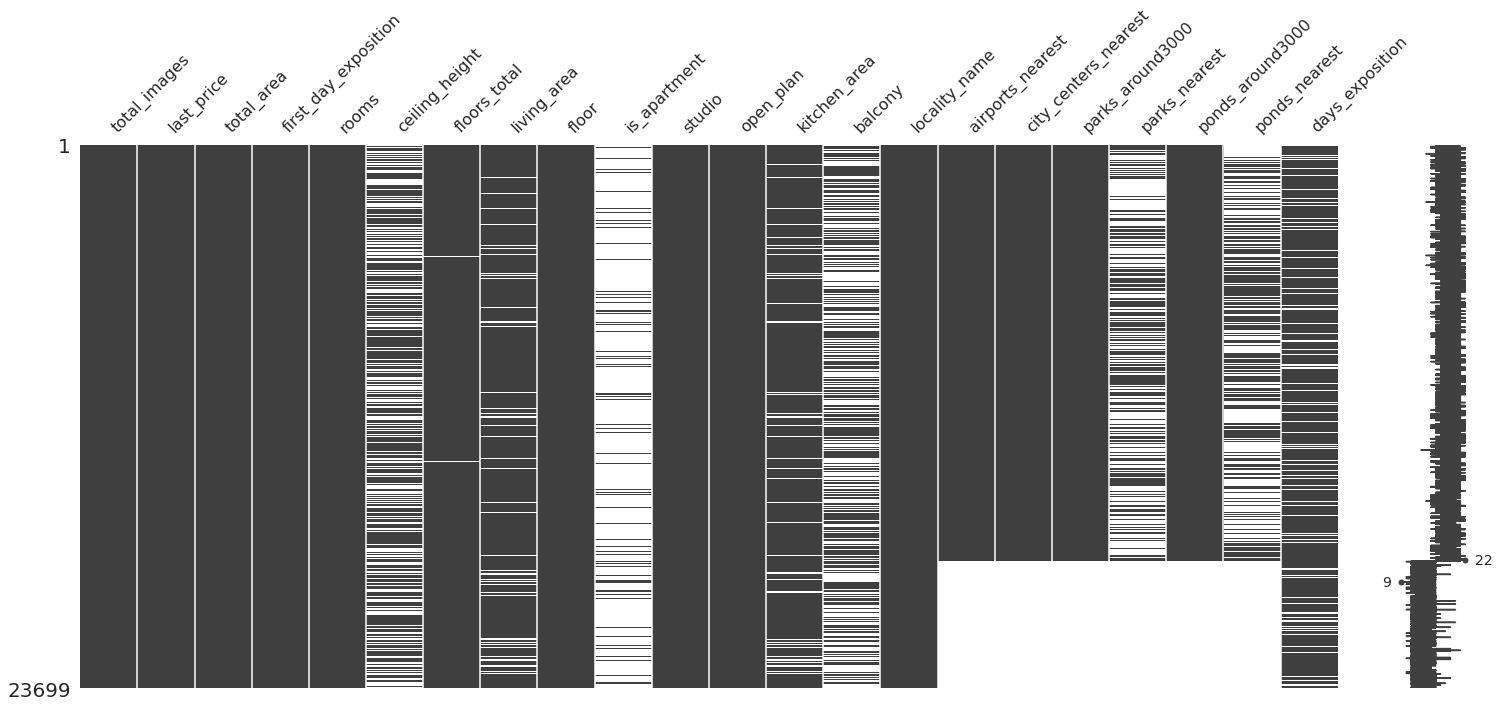

Данные отсортированы в порядке возрастания city_centers_nearest.


total_images  last_price  total_area first_day_exposition  rooms  \
13694             2  31099000.0       159.0   2018-06-25 0:00:00      5   
1182              1   5800000.0        33.6   2016-03-10 0:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
13694            3.28           5.0        106.0      5          NaN   False   
1182             3.70           7.0         22.8      4        False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
13694      False          15.0      NaN  Санкт-Петербург           21633.0   
1182       False           6.6      0.0  Санкт-Петербург           21632.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
13694                 181.0               2.0          254.0   
1182                  208.0               3.0          304.0   

       ponds_around3000  ponds_nearest  days_exposition  
13694               3.0          426.0              NaN  
1182                3.0          503.0            167.0

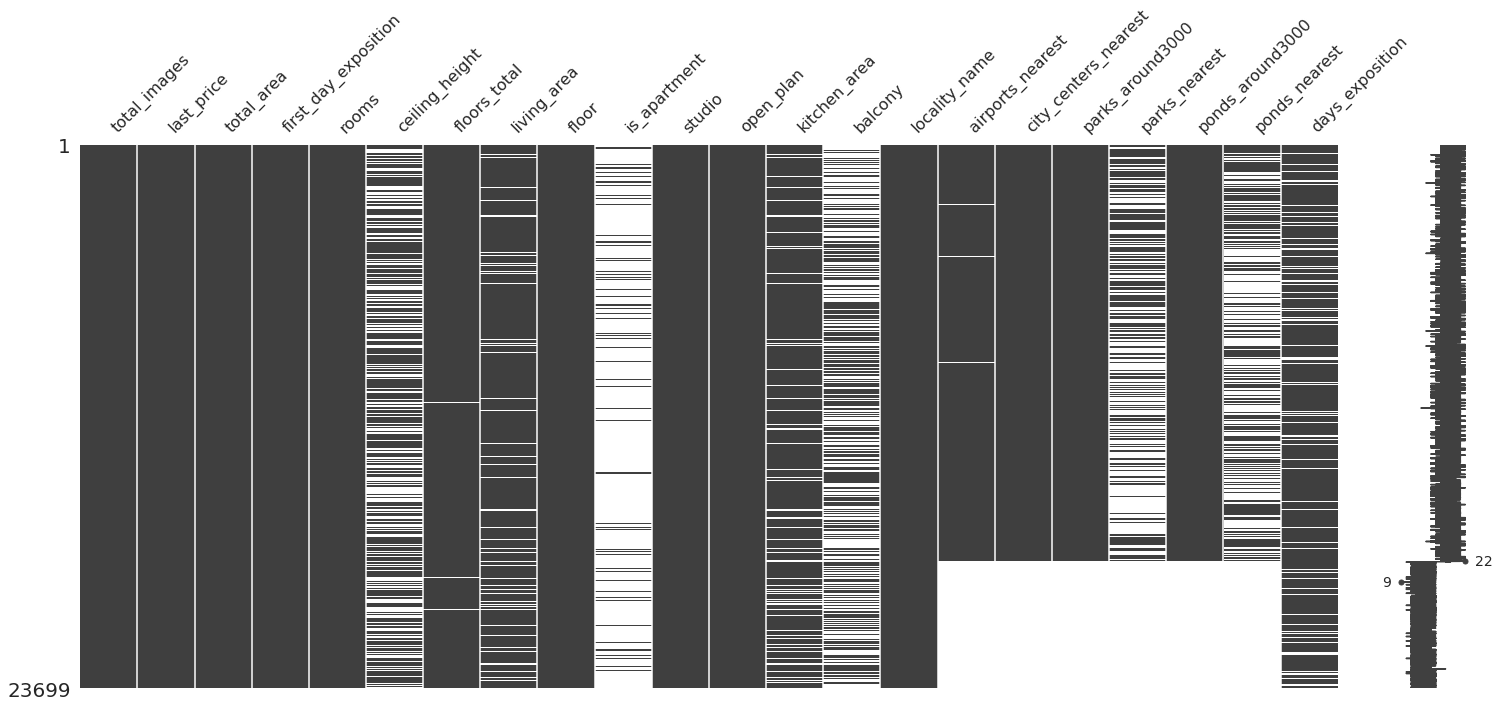

Данные отсортированы в порядке возрастания parks_around3000.


total_images  last_price  total_area first_day_exposition  rooms  \
7842             10   5100000.0        60.0   2017-04-08 0:00:00      3   
18508             9   3990000.0        69.0   2018-04-09 0:00:00      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
7842              NaN           5.0         41.0      4          NaN   False   
18508             2.5           4.0         41.0      2          NaN   False   

       open_plan  kitchen_area  balcony      locality_name  airports_nearest  \
7842       False           7.0      1.0    Санкт-Петербург           12950.0   
18508      False          15.0      NaN  посёлок Понтонный           29493.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
7842                12955.0               0.0            NaN   
18508               31205.0               0.0            NaN   

       ponds_around3000  ponds_nearest  days_exposition  
7842                1.0          217.0            537.0  
18508               0.0            NaN              NaN

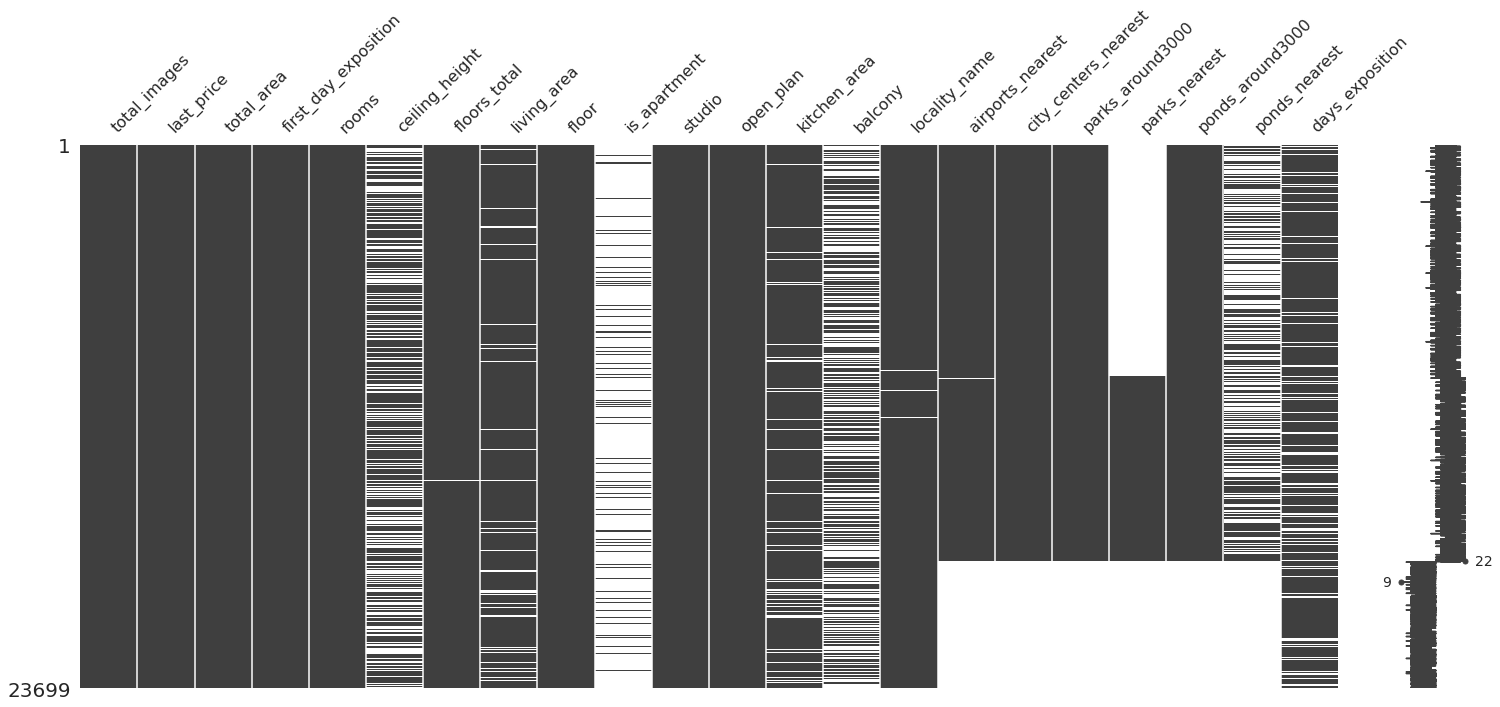

Данные отсортированы в порядке возрастания parks_nearest.


total_images  last_price  total_area first_day_exposition  rooms  \
14624             8   3770000.0        45.4   2019-03-20 0:00:00      2   
11949             7   4500000.0        44.0   2017-11-24 0:00:00      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
14624             NaN           9.0        28.43      2          NaN   False   
11949             2.6           9.0        30.00      7          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
14624      False           6.9      NaN  Санкт-Петербург           43932.0   
11949      False           7.0      NaN  Санкт-Петербург           11806.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
14624               16436.0               1.0            1.0   
11949               12292.0               1.0            3.0   

       ponds_around3000  ponds_nearest  days_exposition  
14624               0.0            NaN             42.0  
11949               1.0          508.0             82.0

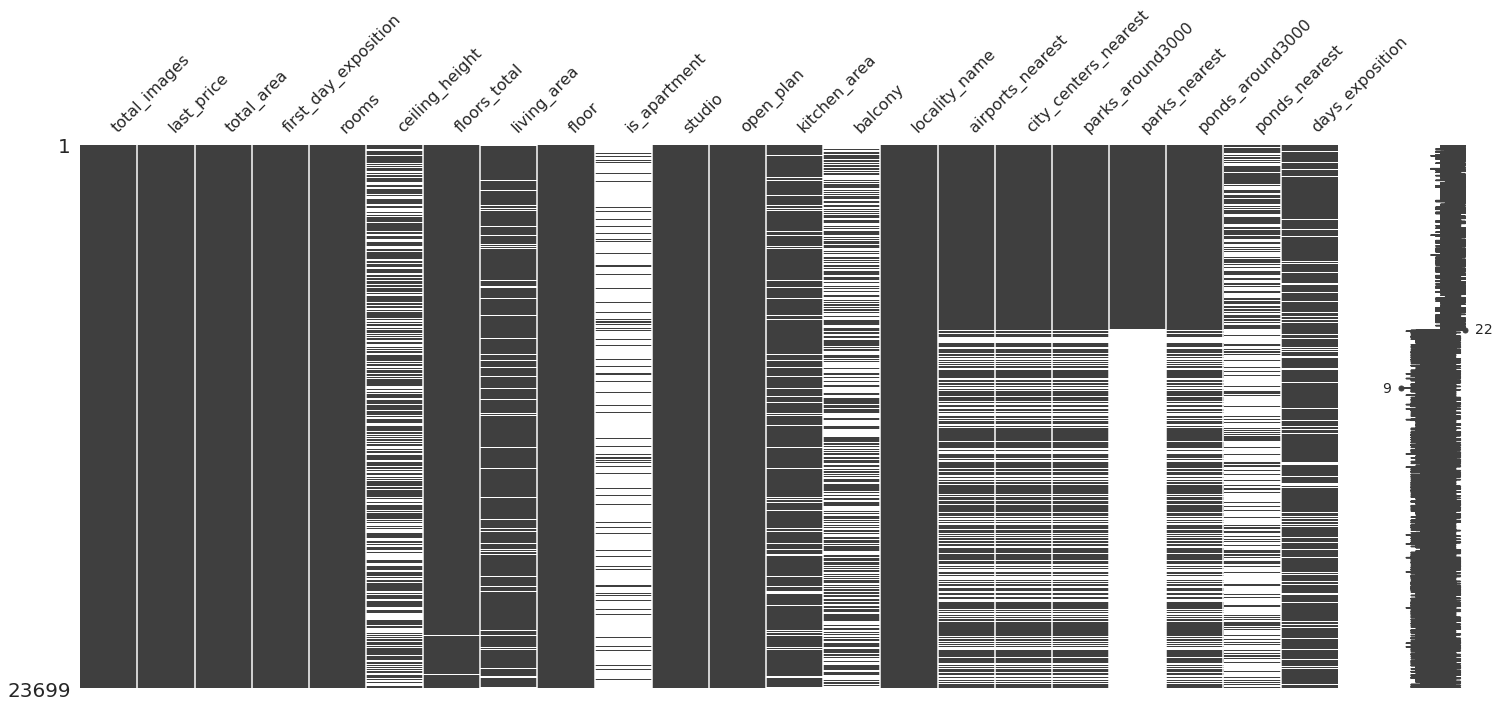

Данные отсортированы в порядке возрастания ponds_around3000.


total_images  last_price  total_area first_day_exposition  rooms  \
9828              0   2460000.0        31.0   2015-12-09 0:00:00      1   
11442             9   4900000.0        59.0   2017-07-21 0:00:00      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
9828              NaN           4.0          NaN      2          NaN   False   
11442             NaN          10.0         33.1      9          NaN   False   

       open_plan  kitchen_area  balcony   locality_name  airports_nearest  \
9828       False           NaN      0.0    Красное Село           25072.0   
11442      False          10.7      1.0  посёлок Шушары           12005.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
9828                28497.0               0.0            NaN   
11442               17791.0               0.0            NaN   

       ponds_around3000  ponds_nearest  days_exposition  
9828                0.0            NaN            446.0  
11442               0.0            NaN            460.0

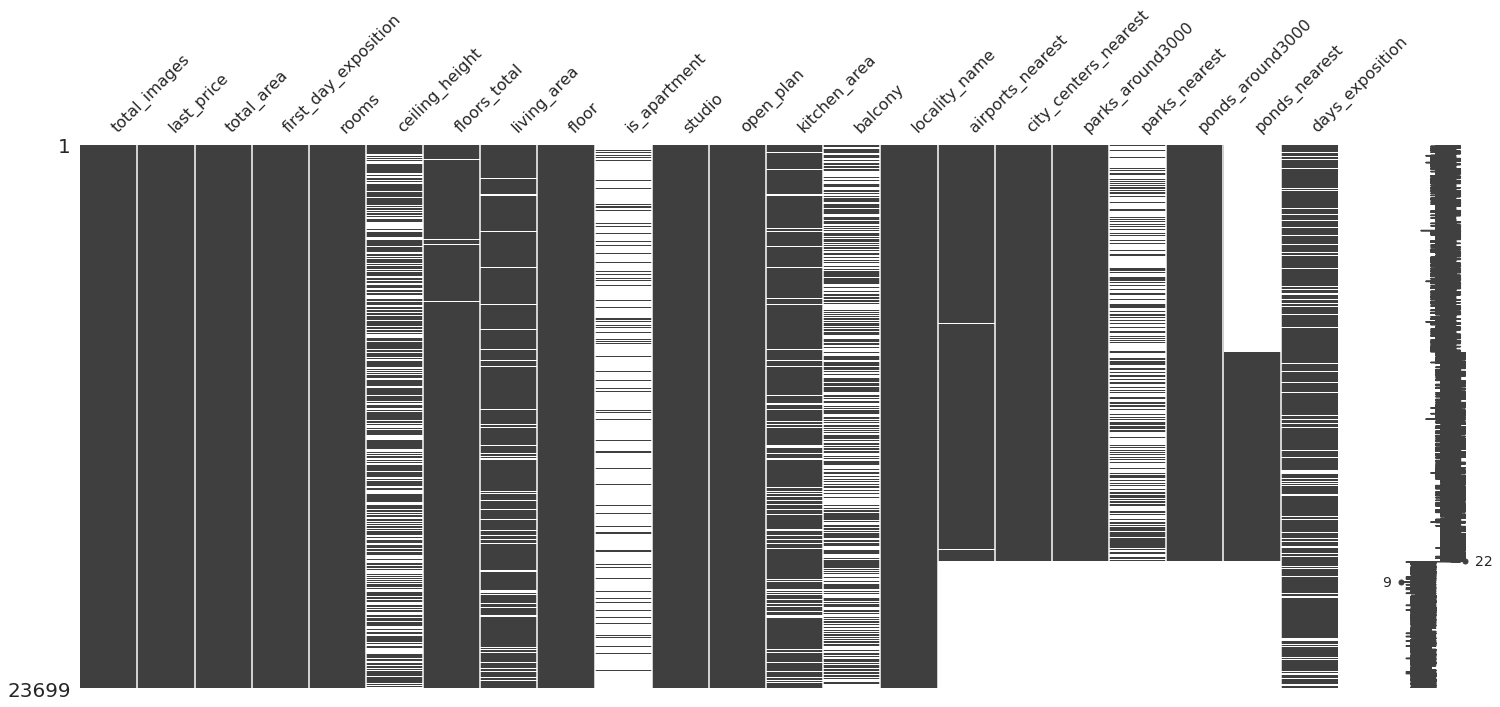

Данные отсортированы в порядке возрастания ponds_nearest.


total_images  last_price  total_area first_day_exposition  rooms  \
17585            14  12900000.0        86.0   2018-12-08 0:00:00      3   
1548              1  12300000.0        90.0   2018-03-03 0:00:00      3   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
17585             NaN           8.0         45.0      7          NaN   False   
1548              NaN           8.0         55.0      3          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
17585      False          22.0      NaN  Санкт-Петербург           18689.0   
1548       False          14.0      NaN  Санкт-Петербург           18689.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
17585               17691.0               1.0         1145.0   
1548                17691.0               1.0         1145.0   

       ponds_around3000  ponds_nearest  days_exposition  
17585               2.0           13.0              NaN  
1548                2.0           13.0            347.0

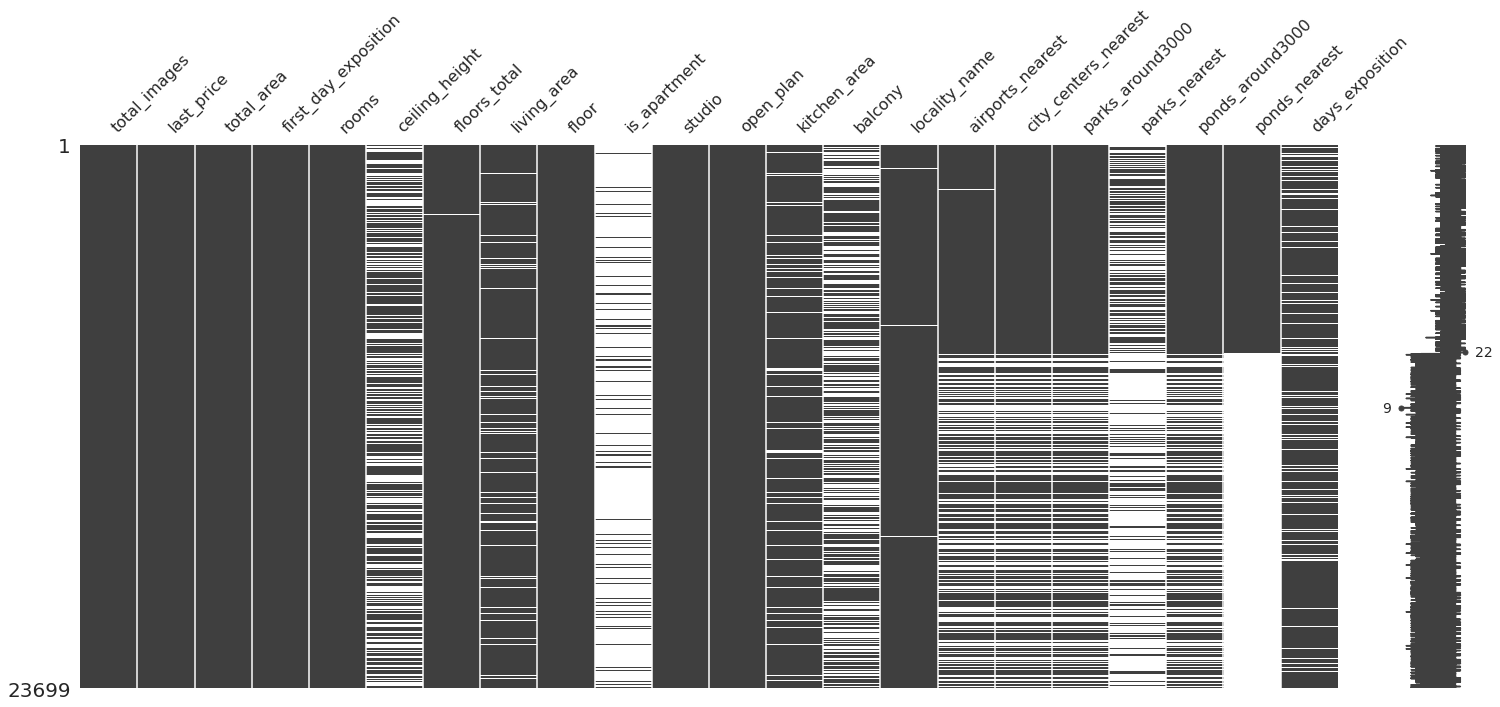

Данные отсортированы в порядке возрастания days_exposition.


total_images  last_price  total_area first_day_exposition  rooms  \
1632             19   4000000.0        49.9   2019-05-01 0:00:00      2   
16053             4   4070000.0        45.1   2019-04-30 0:00:00      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
1632              2.5           9.0         25.0      1          NaN   False   
16053             NaN           5.0         22.7      3          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
1632       False          10.0      NaN  Санкт-Петербург           13567.0   
16053      False           6.6      NaN  Санкт-Петербург           40859.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
1632                14384.0               1.0           20.0   
16053               11668.0               2.0          485.0   

       ponds_around3000  ponds_nearest  days_exposition  
1632                1.0          681.0              1.0  
16053               0.0            NaN              2.0

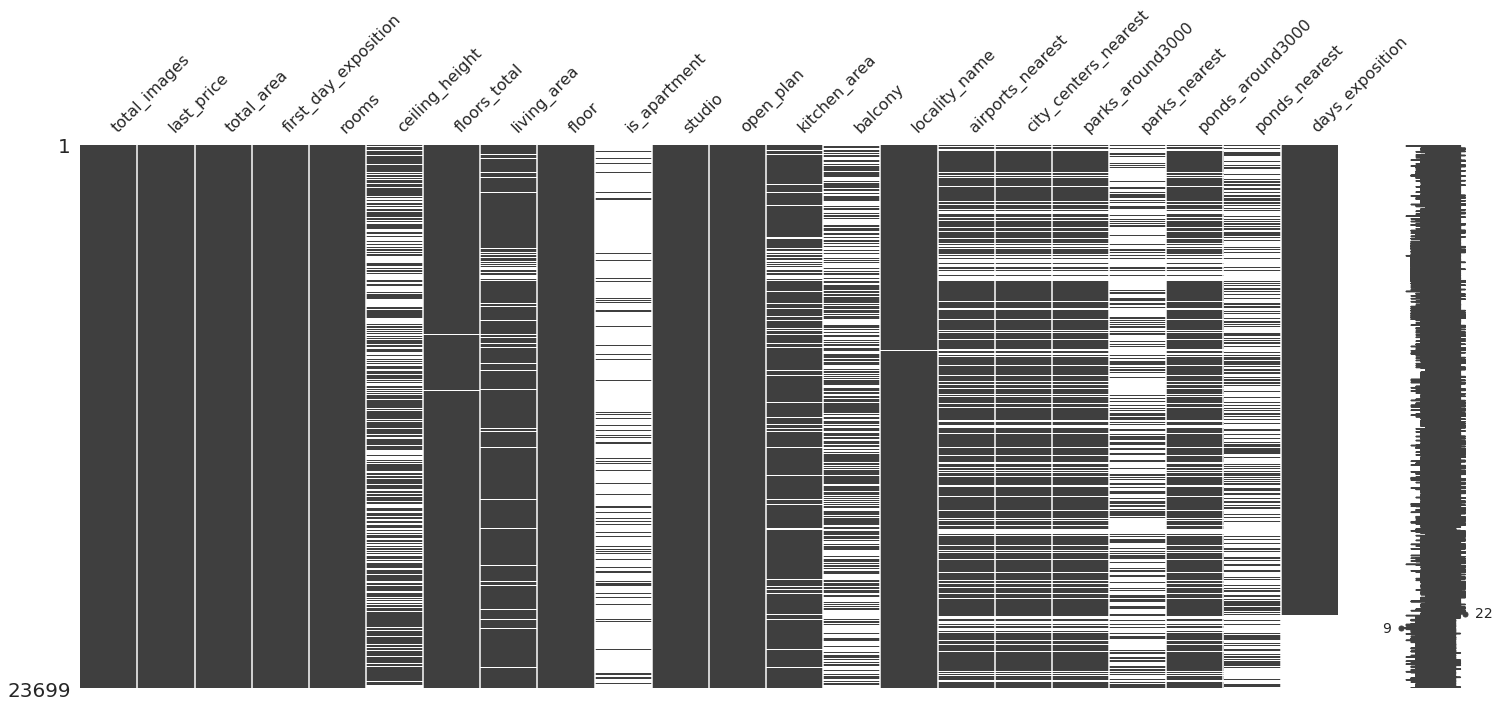

In [14]:

for column in data.columns:
    data_sorted = data.sort_values(by= column)
    print(f'Данные отсортированы в порядке возрастания {column}.')
    display(data_sorted.head(2))
    msno.matrix(data_sorted)
    plt.show()


- Стоимостьи квартиры - отрицательная корреляция с пропусками по всем картографическим данным. Чем дороже, тем меньше пропусков - более ответственный подход продавца?

- Высота потолка - отрицательная корреляция с пропусками в геоданных. Чем выше потолок, тем меньше пропусков. Вероятно коррелирует со стоимостью.

- Жилая площадь - отрицательная корреляция с пропусками в геоданных. Чем больше площадь, тем меньше пропусков. Корреляция со стоимостью.

- Площадь кухни - некоторая отрицательная корреляция с пропусками в геоданных. Корреляция со стоимостью.

- Расстояние до центра города - отрицательная взаимосвязь расстояния с пропусками количества ближайших парков и прудов. Чем ближе центр, тем меньше пропусков о парках и прудах. Корреляция со стоимостью.

- Длительность существования объявления - некоторая положительная корреляция с пропусками в геоданных. Чем дольше "висит", тем больше пропусков в геоданных. Корреляция со стоимостью.

- Локация квартиры - структура пропусков неравномерна в зависимости от локации объекта недвижимости. Необходимо исследовать детальнее.

Перепроверим наши выводы с помощью составления матрицы корреляции между имеющимися значениями и пропусками.

In [15]:
numeric_columns = []
for column in data.columns:
    if data[column].dtype == 'int64':
        data[column] = data[column].astype('float64')
        print(data[column].dtype)

float64
float64
float64


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  float64
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  float64
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  float64
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [17]:
#создание датафрейма с столбцами с пропусками
missing_data = data.isna()
#удаление столбцов без пропусков
for column in missing_data.columns:
    if missing_data[column].sum() == 0:
        missing_data = missing_data.drop(columns= column)
#создание датафрейма с корреляцией каждого столбца оригинального столбца с каждым столбцом с пропусками
data_corr_missing = pd.DataFrame()

display(missing_data.head())
display(data.head())
#идем по каждому численному столбцу в оригинальном датасете и оцениваем его влияние на пропуски 
for column in data.columns:
    if data[column].dtype != 'object':
        data_corr_missing[column] = missing_data.corrwith(data[column])
        
data_corr_missing['last_price'] = missing_data.corrwith(data['last_price'])
data_corr_missing

ceiling_height  floors_total  living_area  is_apartment  kitchen_area  \
0           False         False        False          True         False   
1            True         False        False          True         False   
2            True         False        False          True         False   
3            True         False         True          True          True   
4           False         False        False          True         False   

   balcony  locality_name  airports_nearest  city_centers_nearest  \
0     True          False             False                 False   
1    False          False             False                 False   
2    False          False             False                 False   
3    False          False             False                 False   
4     True          False             False                 False   

   parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
0             False          False             False          False   
1             False           True             False           True   
2             False          False             False          False   
3             False          False             False          False   
4             False          False             False          False   

   days_exposition  
0             True  
1            False  
2            False  
3            False  
4            False

total_images  last_price  total_area first_day_exposition  rooms  \
0          20.0  13000000.0       108.0   2019-03-07 0:00:00    3.0   
1           7.0   3350000.0        40.4   2018-12-04 0:00:00    1.0   
2          10.0   5196000.0        56.0   2015-08-20 0:00:00    2.0   
3           0.0  64900000.0       159.0   2015-07-24 0:00:00    3.0   
4           2.0  10000000.0       100.0   2018-06-19 0:00:00    2.0   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0         51.0    8.0          NaN   False   
1             NaN          11.0         18.6    1.0          NaN   False   
2             NaN           5.0         34.3    4.0          NaN   False   
3             NaN          14.0          NaN    9.0          NaN   False   
4            3.03          14.0         32.0   13.0          NaN   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0      NaN  Санкт-Петербург           18863.0   
1      False          11.0      2.0   посёлок Шушары           12817.0   
2      False           8.3      0.0  Санкт-Петербург           21741.0   
3      False           NaN      0.0  Санкт-Петербург           28098.0   
4      False          41.0      NaN  Санкт-Петербург           31856.0   

   city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0               16028.0               1.0          482.0               2.0   
1               18603.0               0.0            NaN               0.0   
2               13933.0               1.0           90.0               2.0   
3                6800.0               2.0           84.0               3.0   
4                8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0

total_images  last_price  total_area     rooms  \
ceiling_height           -0.102262   -0.033934   -0.054329 -0.077689   
floors_total             -0.046783    0.001512    0.003705 -0.007857   
living_area              -0.094864    0.012441    0.024624 -0.004092   
is_apartment              0.038043   -0.003212   -0.012003 -0.005353   
kitchen_area             -0.101062   -0.000698   -0.034510 -0.071938   
balcony                   0.035022    0.015424    0.026803  0.042459   
locality_name            -0.014887    0.000851    0.012066  0.010801   
airports_nearest         -0.055764   -0.169022   -0.149575 -0.114764   
city_centers_nearest     -0.056711   -0.171953   -0.153418 -0.115798   
parks_around3000         -0.056576   -0.172000   -0.153496 -0.115892   
parks_nearest            -0.040799   -0.165793   -0.170510 -0.137635   
ponds_around3000         -0.056576   -0.172000   -0.153496 -0.115892   
ponds_nearest            -0.013712   -0.161955   -0.156955 -0.097611   
days_exposition           0.110618    0.064241    0.105271  0.108505   

                      ceiling_height  floors_total  living_area     floor  \
ceiling_height                   NaN      0.095714    -0.072195  0.068789   
floors_total                0.000124           NaN    -0.004532  0.051032   
living_area                -0.005781      0.013858          NaN  0.001552   
is_apartment               -0.055878      0.000316    -0.013085 -0.004237   
kitchen_area                0.018682      0.041166    -0.042987  0.020900   
balcony                    -0.005881     -0.101011     0.042640 -0.115133   
locality_name               0.005404     -0.006890     0.009585 -0.004131   
airports_nearest           -0.023008     -0.135614    -0.135442 -0.089797   
city_centers_nearest       -0.023748     -0.136987    -0.139439 -0.090305   
parks_around3000           -0.023782     -0.136879    -0.139555 -0.090231   
parks_nearest              -0.053928      0.124584    -0.174854  0.083647   
ponds_around3000           -0.023782     -0.136879    -0.139555 -0.090231   
ponds_nearest              -0.044665     -0.004877    -0.143106 -0.006350   
days_exposition             0.017039     -0.071937     0.104844 -0.049272   

                        studio  open_plan  kitchen_area   balcony  \
ceiling_height        0.015545   0.042410      0.000312 -0.236896   
floors_total          0.021834  -0.003213      0.022519 -0.061874   
living_area          -0.003859  -0.001111      0.061837  0.004745   
is_apartment          0.004063   0.002089     -0.017232 -0.030972   
kitchen_area          0.243916   0.163279           NaN -0.066365   
balcony              -0.015404  -0.031110      0.014984       NaN   
locality_name        -0.003621  -0.002424      0.013328 -0.045812   
airports_nearest      0.027944   0.026909     -0.117794  0.033233   
city_centers_nearest  0.028167   0.027070     -0.119865  0.034100   
parks_around3000      0.028177   0.027077     -0.119825  0.034131   
parks_nearest         0.033555   0.019851     -0.103194  0.054088   
ponds_around3000      0.028177   0.027077     -0.119825  0.034131   
ponds_nearest         0.006888   0.002867     -0.138835  0.038666   
days_exposition      -0.009395  -0.020965      0.056076  0.172462   

                      airports_nearest  city_centers_nearest  \
ceiling_height               -0.002690              0.019307   
floors_total                  0.006917              0.011105   
living_area                   0.007772             -0.018830   
is_apartment                  0.005225             -0.001276   
kitchen_area                 -0.003105             -0.009209   
balcony                      -0.015565             -0.061658   
locality_name                -0.015900             -0.016085   
airports_nearest                   NaN             -0.015148   
city_centers_nearest         -0.007795                   NaN   
parks_around3000                   NaN                   NaN   
parks_nearest                 0.017885       

Text(80.89374999999998, 0.5, 'пропуски в данных')

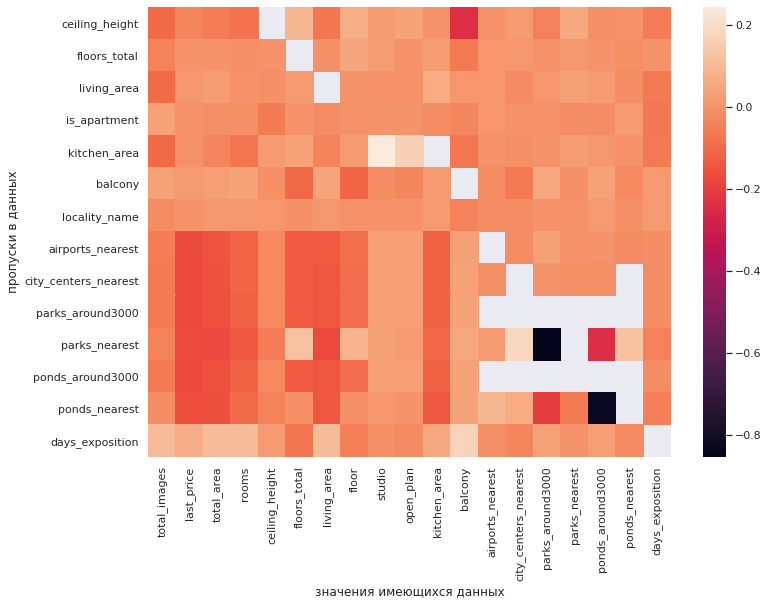

In [18]:
sns.heatmap(data_corr_missing);
plt.xlabel('значения имеющихся данных')
plt.ylabel('пропуски в данных')

In [19]:
data['na_ponds_nearest'] = data['ponds_nearest'].isna()
na_ponds_pivot = data.pivot_table(index= 'ponds_around3000', values= 'na_ponds_nearest', aggfunc= ['count', 'sum'])
na_ponds_pivot.columns = ['rows_count', 'na_count']
na_ponds_pivot

rows_count  na_count
ponds_around3000                      
0.0                     9071      9071
1.0                     5717         0
2.0                     1892         0
3.0                     1501         0

In [20]:
data['na_parks_nearest'] = data['parks_nearest'].isna()
na_parks_pivot = data.pivot_table(index= 'parks_around3000', values= 'na_parks_nearest', aggfunc= ['count', 'sum'])
na_parks_pivot.columns = ['rows_count', 'na_count']
na_parks_pivot

rows_count  na_count
parks_around3000                      
0.0                    10106     10102
1.0                     5681         0
2.0                     1747         0
3.0                      647         0

**Выводы по механизму появления пропусков, виды пропусков и методы их обработки**


Пропуски в геоданных можно поделить на 3 группы - 

1) Нежелание заполнять данные о расстоянии до ближайшего парка при их отстутствии в ближайшем радиусе - данная информация нерелевантна и скорее подчеркивает недостаток объекта недвижимости - отсюда пропуски в данных. Таким образом, мы знаем влияющий на пропуски фактор и мы его измеряли (количество парков в радиусе)  - механизм пропусков MAR.

2) Нежелание заполнять данные о расстоянии до ближайшего пруда при их отстутствии в ближайшем радиусе - данная информация нерелевантна и скорее подчеркивает недостаток объекта недвижимости - отсюда пропуски в данных. Таким образом, мы знаем влияющий на пропуски фактор и мы его измеряли (количество прудов в радиусе)  - механизм пропусков MAR.

3) Нежелание заполнять геоданные для дешевых квартир - судя по взаимосвязи отсутствия пропусков с высокой длительностью объявления и высокой стоимостью квартиры, большим метражом объектов, продавцы дешевой недвижимости сбывают ее быстрее и не особо мотивированы размещать геоинформацию для соответствующего потребительского класса (стоит ожидать, что вопрос цены является основополагающим). В то время как в дорогих квартирах вопросы геоданных уже занимают большую роль. Таким образом, мы знаем влияющий на пропуски фактор (стоимость и метраж квартиры) - механизм пропусков MAR. 

Необходимо решить, каким методом обработать данные пропуски. По факту у нас в выборке имеется 3 категории, для которых неизвестна часть данных. Если оставить данные пропуски как есть, то мы сможем избежать искажения общих результатов, однако потеряем возможность анализа пропущенной информации.  Квартиры без парка в округе - для них мы не сможем проанализировать расстояние до ближайшего парка, квартиры без пруда в округе - для них мы не сможем проанализировать расстояние до ближайшего пруда, дешевые квартиры - для них мы не сможем определить их местоположение.  Однако мы можем попробовать импутировать предполагаемые значения в пропуски для более полноценного анализа. На данный момент с целью. На данный момент для экономии времени оставим пропуски как есть и будем обрабатывать имеющеися данные, имея в виду наличие пропусков и их возможное влияние на общие результаты.

Остальные пропуски очевидно являются случайными и могут быть заменены соответствющим категориальным значением или медианой.


**Собственно обработка пропусков**

In [21]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
na_ponds_nearest            0
na_parks_nearest            0
dtype: int64

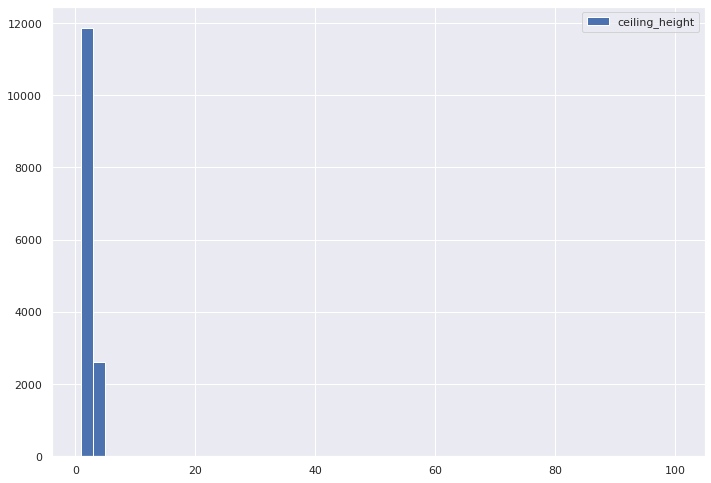

Гистограмма распределения до обработки пропусков
Количество пропусков: 9195


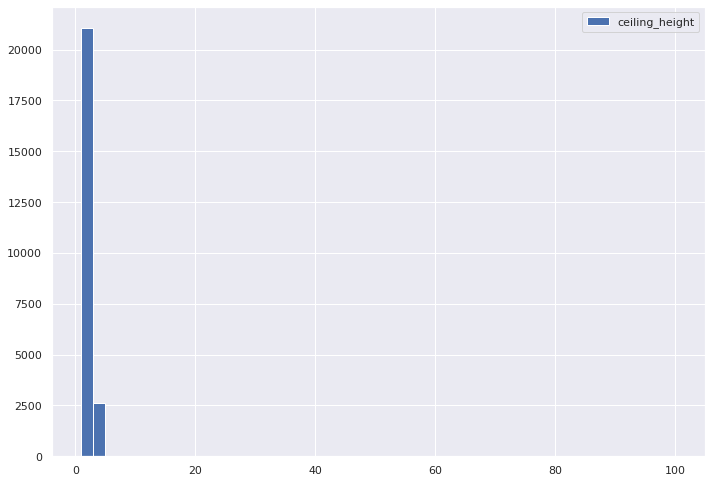

Гистограмма распределения после обработки пропусков
Количество пропусков: 0
--------------------------------------------------


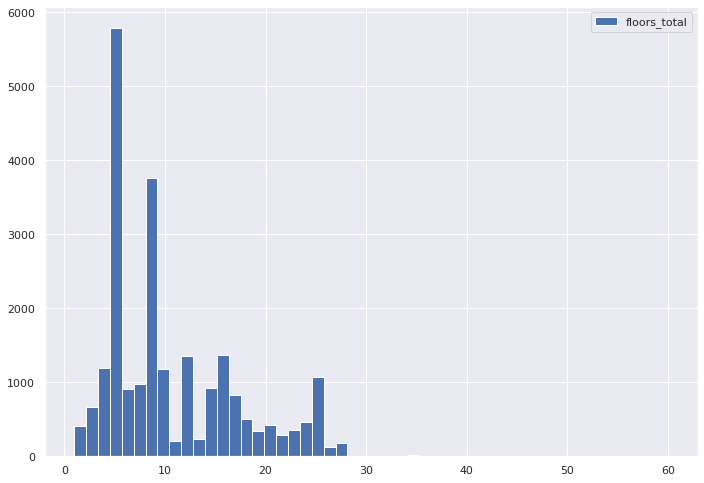

Гистограмма распределения до обработки пропусков
Количество пропусков: 86


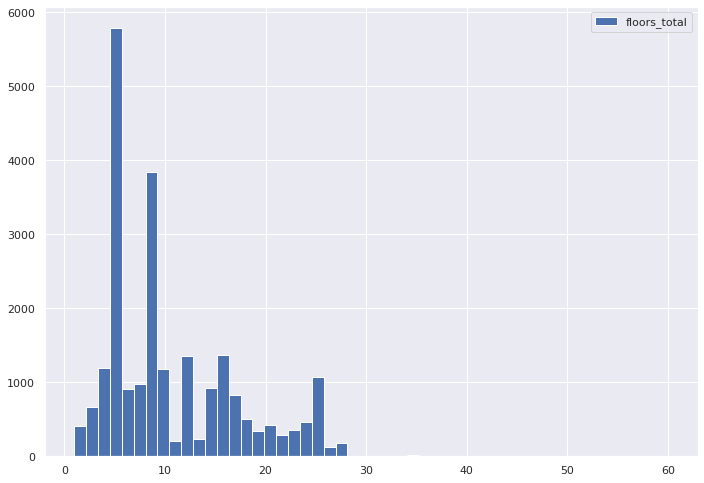

Гистограмма распределения после обработки пропусков
Количество пропусков: 0
--------------------------------------------------


In [22]:
na_numeric_columns = ['ceiling_height', 'floors_total']
nona_data = data.copy()

for column in na_numeric_columns:
    data[column].hist(bins= 50, legend= True)
    plt.show()
    print('Гистограмма распределения до обработки пропусков')
    print('Количество пропусков:', data[column].isna().sum())
    
    nona_data[column] = nona_data[column].fillna(nona_data[column].median())
    
    nona_data[column].hist(bins= 50, legend= True)
    plt.show()
    print('Гистограмма распределения после обработки пропусков')
    print('Количество пропусков:', nona_data[column].isna().sum())
    print('--------------------------------------------------')

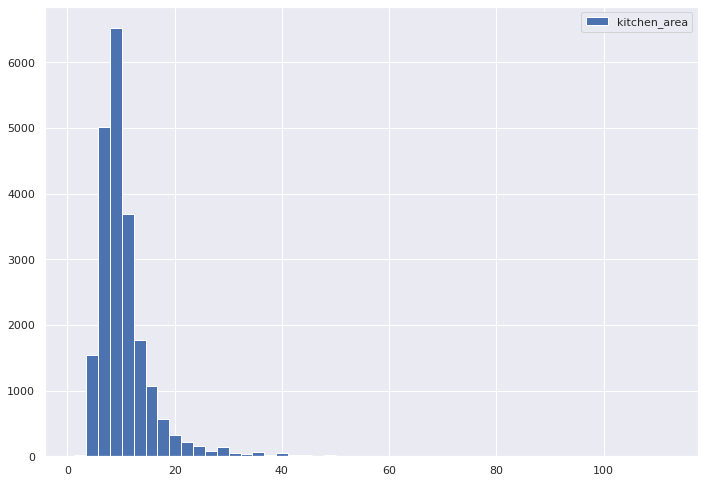

Гистограмма распределения до обработки пропусков
Количество пропусков: 2278
0.175


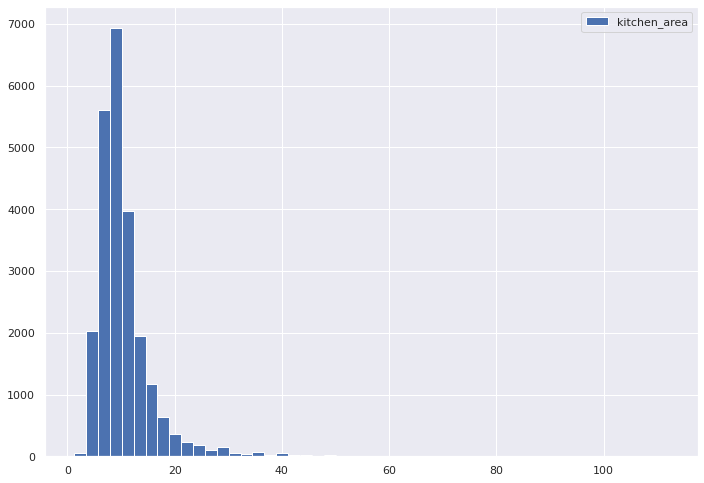

Гистограмма распределения после обработки пропусков
Количество пропусков: 0
--------------------------------------------------


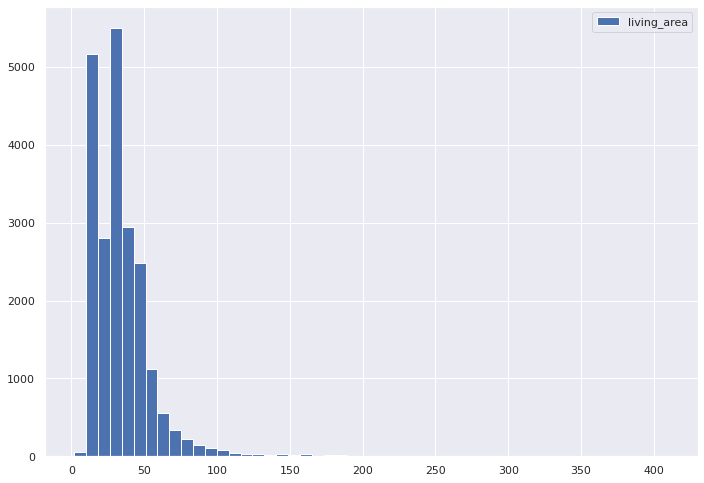

Гистограмма распределения до обработки пропусков
Количество пропусков: 1903
0.5769230769230769


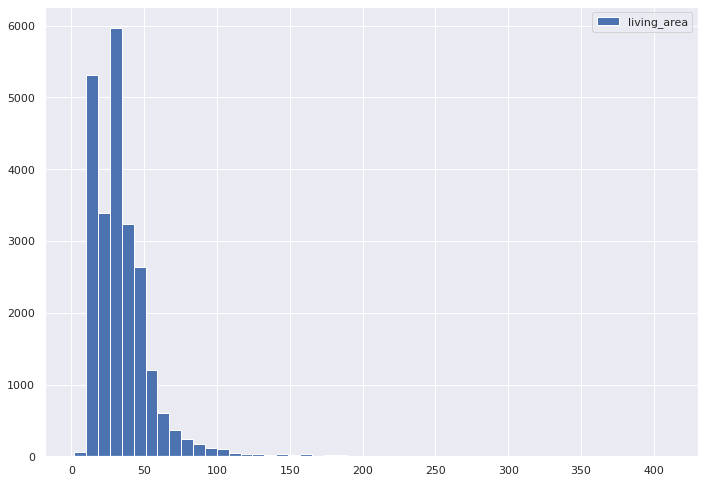

Гистограмма распределения после обработки пропусков
Количество пропусков: 0
--------------------------------------------------


In [23]:
kitchen_living = ['kitchen_area', 'living_area']

for column in kitchen_living:
    data[column].hist(bins= 50, legend= True)
    plt.show()
    print('Гистограмма распределения до обработки пропусков')
    print('Количество пропусков:', data[column].isna().sum())
    
    ratio = data[column].median() / data['total_area'].median() 
    print(ratio)
    nona_data[column] = data[column].fillna(data['total_area'] * ratio)
    
    nona_data[column].hist(bins= 50, legend= True)
    plt.show()
    print('Гистограмма распределения после обработки пропусков')
    print('Количество пропусков:', nona_data[column].isna().sum())
    print('--------------------------------------------------')

In [24]:
nona_data['is_apartment'] = nona_data['is_apartment'].astype(bool)

In [25]:
print(nona_data['is_apartment'].value_counts())
print(nona_data['is_apartment'].isna().sum())

nona_data['is_apartment'] = nona_data['is_apartment'].fillna(False)
nona_data['is_apartment'].isna().sum()

print(nona_data['is_apartment'].value_counts())
print(nona_data['is_apartment'].isna().sum())

True     20974
False     2725
Name: is_apartment, dtype: int64
0
True     20974
False     2725
Name: is_apartment, dtype: int64
0


In [26]:
print(nona_data['balcony'].value_counts())
print(nona_data['balcony'].isna().sum())

nona_data['balcony'] = nona_data['balcony'].fillna(0)
nona_data['balcony'].isna().sum()

print(nona_data['balcony'].value_counts())
print(nona_data['balcony'].isna().sum())

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64
11519
0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64
0


In [27]:
print(nona_data['locality_name'].isna().sum())
nona_data.dropna(subset= ['locality_name'], inplace= True)
nona_data['locality_name'].isna().sum()


49


0

In [28]:
nona_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
na_ponds_nearest            0
na_parks_nearest            0
dtype: int64

На данный момент случайные пропуски обработаны. Оставшиеся пропуски MAR будут оставлены как есть, так как данные пропуски выделяют отдельные группы объектов недвижимости - подставление усредненных данных исказит общие закономерности и выводы. Будем  помнить про данные характеристики и делать выводы с особой осторожностью.

###  Обработка типов данных 

In [29]:
nona_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  float64
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  float64
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  float64
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Изменение типа данных целочисленных столбцов**

In [30]:
nona_data.loc[:, ['total_images', 'rooms', 'floors_total', 'floor', 'balcony' ]] = nona_data.loc[:, ['total_images', 'rooms', 'floors_total', 'floor', 'balcony' ]].astype(int)

nona_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  int64  
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Изменение типа данных времени**

In [31]:
nona_data.head(1)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0   2019-03-07 0:00:00      3   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0             2.7            16         51.0      8          True   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0        0  Санкт-Петербург           18863.0   

   city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0               16028.0               1.0          482.0               2.0   

   ponds_nearest  days_exposition  na_ponds_nearest  na_parks_nearest  
0          755.0              NaN             False             False

In [32]:
nona_data['first_day_exposition'] = pd.to_datetime(
    nona_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)
nona_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

In [33]:
for column in nona_data.columns:
    if nona_data[column].dtype == 'float64':
        nona_data[column] = nona_data[column].astype('float32')
        
nona_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float32       
 2   total_area            23650 non-null  float32       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float32       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float32       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float32       
 13  balcony         

###  Обработка дубликатов 

**Поиск явных дубликатов**

In [34]:
nona_data['locality_name'] = nona_data['locality_name'].str.lower()
nona_data.duplicated().sum()

0

**Поиск неявных дубликатов**

In [35]:
sorted(nona_data['locality_name'].unique())

['бокситогорск',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'высоцк',
 'гатчина',
 'городской поселок большая ижора',
 'городской поселок янино-1',
 'городской посёлок будогощь',
 'городской посёлок виллози',
 'городской посёлок лесогорский',
 'городской посёлок мга',
 'городской посёлок назия',
 'городской посёлок новоселье',
 'городской посёлок павлово',
 'городской посёлок рощино',
 'городской посёлок свирьстрой',
 'городской посёлок советский',
 'городской посёлок фёдоровское',
 'городской посёлок янино-1',
 'деревня агалатово',
 'деревня аро',
 'деревня батово',
 'деревня бегуницы',
 'деревня белогорка',
 'деревня большая вруда',
 'деревня большая пустомержа',
 'деревня большие колпаны',
 'деревня большое рейзино',
 'деревня большой сабск',
 'деревня бор',
 'деревня борисова грива',
 'деревня ваганово',
 'деревня вартемяги',
 'деревня вахнова кара',
 'деревня выскатка',
 'деревня гарболово',
 'деревня глинка',
 'деревня горбунки',
 'деревня гостилицы',
 'деревня заклинье',

**Исправление орфографических ошибок (поселок -> посёлок)**

In [36]:
nona_data['locality_name'] = nona_data['locality_name'].replace(to_replace='поселок', value = 'посёлок', regex=True)

**Поиск неполных названий**

In [37]:
#лист со всеми уникальными значениями локаций
uniq_loc = list(sorted(nona_data['locality_name'].unique()))

for loc in uniq_loc:
    # лист локаций, среди которых будет вестись поиск сопадения
    # (все локации из уникальных, кроме сравниваемой)
    list_to_check = uniq_loc.copy()
    list_to_check.remove(loc)
    for elem in list_to_check:
        # поиск вхождения каждой уникальной локации в какую-либо другую
        ind = elem.find(loc)
        if ind != -1:
            print(f'{loc} найден в {elem}')
    


высоцк найден в село русско-высоцкое
деревня бор найден в деревня борисова грива
деревня старая найден в деревня старая пустошь
кингисепп найден в посёлок кингисеппский
коммунар найден в посёлок коммунары
кудрово найден в деревня кудрово
луга найден в посёлок усть-луга
любань найден в посёлок любань
мурино найден в посёлок мурино
никольское найден в село никольское
посёлок лесное найден в коттеджный посёлок лесное


Исходя из данных в интернете каждая из данных локаций является самостоятельной единицей

**Поиск дубликатов по причине разного названия одинаковых типов населенных пунктов**

In [38]:
import os

match_list = []
for loc in uniq_loc:
    # лист локаций для подставления к
    # (все локации из уникальных, кроме сравниваемой)
    list_to_check = uniq_loc.copy()
    list_to_check.remove(loc)
    for elem in list_to_check:
        #составление списка совпадающих частей между значениями
        match_part = os.path.commonprefix([loc.split(), elem.split()])
        match_part = ' '.join(match_part)
        if match_part != '':
            match_list.append(match_part)
loc_types = pd.Series(pd.Series(match_list).unique())
loc_types = loc_types.loc[(loc_types != 'деревня малое') &  (loc_types != 'деревня большая') & (loc_types != 'деревня старая')& (loc_types != 'посёлок новый') & (loc_types != 'посёлок городского типа имени')]

loc_types

0                       городской посёлок
1                                 деревня
5                      коттеджный посёлок
6                                 посёлок
7                 посёлок городского типа
10    посёлок при железнодорожной станции
11                        посёлок станции
12                   садовое товарищество
13                                   село
dtype: object

Теперь нам отчетливо видны дубликаты категорий локаций: 
1) городской поселок и поселок городского типа; 
2) если посмотреть общий список уникальных локаций, то там можно также увидеть садовое некоммерческое товарищество - оно в единственном виде и поэтому не попало в наш фильтр, однако является дубликатом к садовому товариществу.

**Замена типов локаций-дубликатов**

In [39]:
nona_data['locality_name'] = nona_data['locality_name'].replace(to_replace='городской посёлок', value = 'посёлок городского типа', regex=True)

nona_data['locality_name'] = nona_data['locality_name'].replace(to_replace='садоводческое некоммерческое товарищество', value = 'садовое товарищество', regex=True)

**Оценка результатов удаления неявных дубликатов**

In [40]:
uniq_loc = list(sorted(nona_data['locality_name'].unique()))

import os

match_list = []
for loc in uniq_loc:
    # лист локаций для подставления к
    # (все локации из уникальных, кроме сравниваемой)
    list_to_check = uniq_loc.copy()
    list_to_check.remove(loc)
    for elem in list_to_check:
        #составление списка совпадающих частей между значениями
        match_part = os.path.commonprefix([loc.split(), elem.split()])
        match_part = ' '.join(match_part)
        if match_part != '':
            match_list.append(match_part)
loc_types = pd.Series(pd.Series(match_list).unique())
loc_types = loc_types.loc[(loc_types != 'деревня малое') &  (loc_types != 'деревня большая') & (loc_types != 'деревня старая')& (loc_types != 'посёлок новый') & (loc_types != 'посёлок городского типа имени')]

loc_types

0                                 деревня
4                      коттеджный посёлок
5                                 посёлок
6                 посёлок городского типа
9     посёлок при железнодорожной станции
10                        посёлок станции
11                   садовое товарищество
12                                   село
dtype: object

In [41]:
sorted(nona_data['locality_name'].unique())

['бокситогорск',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'высоцк',
 'гатчина',
 'деревня агалатово',
 'деревня аро',
 'деревня батово',
 'деревня бегуницы',
 'деревня белогорка',
 'деревня большая вруда',
 'деревня большая пустомержа',
 'деревня большие колпаны',
 'деревня большое рейзино',
 'деревня большой сабск',
 'деревня бор',
 'деревня борисова грива',
 'деревня ваганово',
 'деревня вартемяги',
 'деревня вахнова кара',
 'деревня выскатка',
 'деревня гарболово',
 'деревня глинка',
 'деревня горбунки',
 'деревня гостилицы',
 'деревня заклинье',
 'деревня заневка',
 'деревня зимитицы',
 'деревня извара',
 'деревня иссад',
 'деревня калитино',
 'деревня кальтино',
 'деревня камышовка',
 'деревня каськово',
 'деревня келози',
 'деревня кипень',
 'деревня кисельня',
 'деревня колтуши',
 'деревня коркино',
 'деревня котлы',
 'деревня кривко',
 'деревня кудрово',
 'деревня кузьмолово',
 'деревня курковицы',
 'деревня куровицы',
 'деревня куттузи',
 'деревня лаврики',
 'деревня

###  Поиск аномальных значений

In [42]:
good_data = nona_data.copy()

**Обзор аномальных значений**

In [43]:
good_data.describe()

total_images   last_price    total_area         rooms  ceiling_height  \
count  23650.000000      23650.0  23650.000000  23650.000000    23650.000000   
mean       9.862326    6541126.5     60.329071      2.070106        2.724311   
std        5.682278   10896399.0     35.661808      1.078620        0.989255   
min        0.000000      12190.0     12.000000      0.000000        1.000000   
25%        6.000000    3400000.0     40.000000      1.000000        2.600000   
50%        9.000000    4650000.0     52.000000      2.000000        2.650000   
75%       14.000000    6799000.0     69.699997      3.000000        2.700000   
max       50.000000  763000000.0    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23650.000000  23650.000000  23650.000000  23650.000000  23650.000000   
mean      10.669852     34.612450      5.893277     10.502083      0.591712   
std        6.583725     22.386703      4.883317      6.036839      0.959662   
min        1.000000      2.000000      1.000000      1.300000      0.000000   
25%        5.000000     19.000000      2.000000      7.000000      0.000000   
50%        9.000000     30.000000      4.000000      9.000000      0.000000   
75%       16.000000     42.115383      8.000000     12.000000      1.000000   
max       60.000000    409.700012     33.000000    112.000000      5.000000   

       airports_nearest  city_centers_nearest  parks_around3000  \
count      18116.000000          18139.000000      18140.000000   
mean       28803.224609          14197.860352          0.611577   
std        12637.314453           8606.830078          0.802003   
min            0.000000            181.000000          0.000000   
25%        18575.750000           9241.000000          0.000000   
50%        26756.500000          13105.000000          0.000000   
75%        37294.000000          16293.000000          1.000000   
max        84869.000000          65968.000000          3.000000   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  
count    8064.000000      18140.000000    9085.000000     20470.000000  
mean      490.830719          0.769680     518.059875       180.753204  
std       342.554382          0.937948     277.841736       219.777924  
min         1.000000          0.000000      13.000000         1.000000  
25%       288.000000          0.000000     293.000000        45.000000  
50%       454.500000          1.000000     502.000000        95.000000  
75%       612.000000          1.000000     730.000000       231.000000  
max      3190.000000          3.000000    1344.000000      1580.000000

- Количество фотографий в целом может быть любым, крайние значения выглядят адекватно.
- Стоимость в некоторых случаях зашкаливающая - необходимо дополнительно изучить.
- Общая площадь - максимальное значение подозрительное - изучить
- Количество комнат - 19 комнат кажется чем-то выбивающимся из общего количества
- Высота потолка - изучить
- Количество этажей - адекватное
- Площадь гостиной - изучить
- Этаж - адекватные значения
- Кухня - изучить
- Балконы - изучить
- Значения расстояний и времени экспозиции в целом могут быть любыми, оставим их как есть.

**Поиск и удаление аномальных значений стоимости**

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


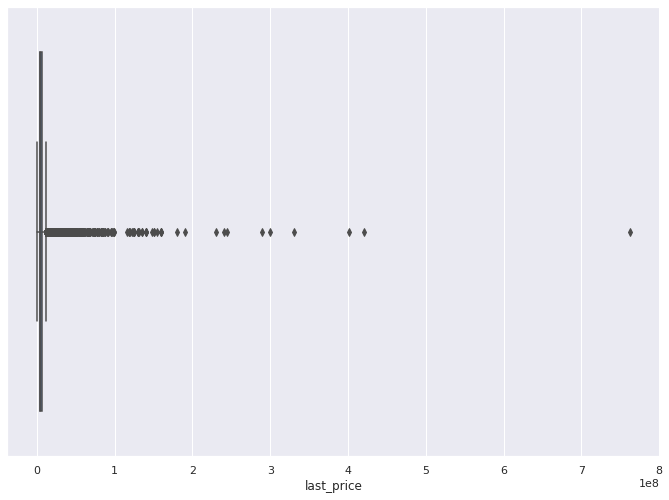

In [44]:
sns.boxplot(nona_data['last_price']);

Значение в 800 миллионов вероятнее всего выброс, как в целом и значения от 100 миллионов. Попробуем отграничить верхние значения стоимости с помощью межквартильного размаха.

last_price
Верхняя граница при поиске выборосов:  11897500.0
Удалено 8.69 % значений


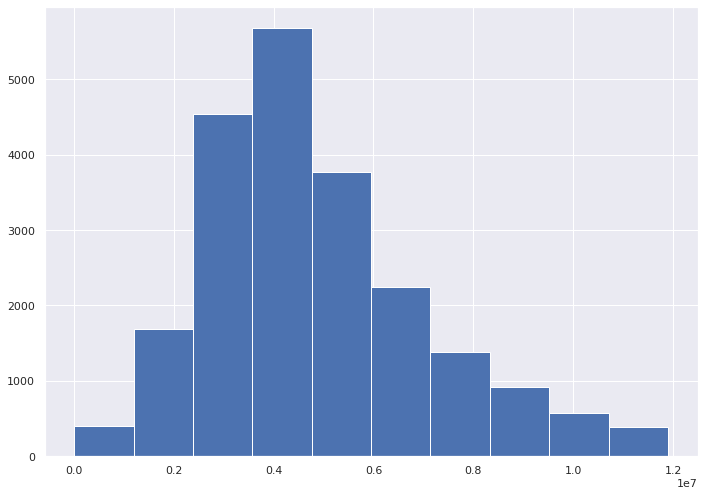

In [45]:
count = nona_data['last_price'].count()
q1 = nona_data['last_price'].describe()['25%']
q3 = nona_data['last_price'].describe()['75%']
median = nona_data['last_price'].describe()['50%']
iqr = q3 - q1
h_lim = q3 + 1.5 * iqr


good_data = nona_data.drop(nona_data.query('last_price > @h_lim').index)
good_data.reset_index(drop= True, inplace= True)

good_data['last_price'].hist();
print('last_price')
print('Верхняя граница при поиске выборосов: ', h_lim)
del_part = ((count - good_data['last_price'].count()) / count * 100).round(2)
print('Удалено', del_part, '% значений')

**Поиск и удаление аномальных значений общей площади**

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


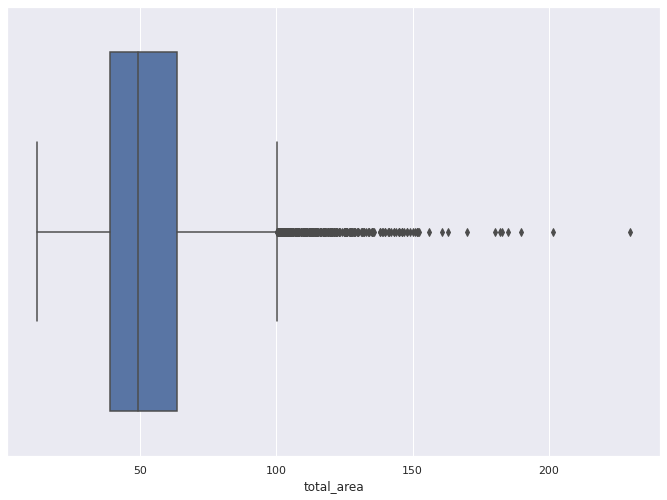

In [46]:
sns.boxplot(good_data['total_area']);

Значения более 100 м2 похожи на выбросы - уберем их.

total_area
Верхняя граница при поиске выборосов:  100.25
Удалено 2.08 % значений


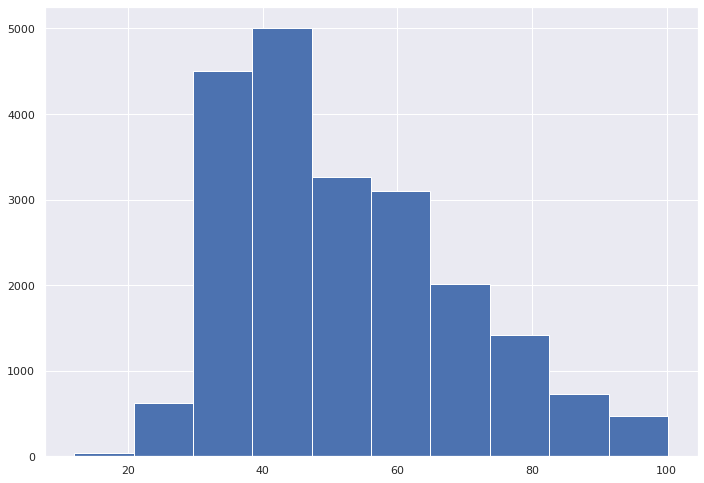

In [47]:
count = good_data['total_area'].count()
q1 = good_data['total_area'].describe()['25%']
q3 = good_data['total_area'].describe()['75%']
median = good_data['total_area'].describe()['50%']
iqr = q3 - q1
h_lim = q3 + 1.5 * iqr


good_data = good_data.drop(good_data.query('total_area > @h_lim').index)
good_data.reset_index(drop= True, inplace= True)

good_data['total_area'].hist();
print('total_area')
print('Верхняя граница при поиске выборосов: ', h_lim)
del_part = ((count - good_data['total_area'].count()) / count * 100).round(2)
print('Удалено', del_part, '% значений')

**Поиск и удаление аномальных значений высоты потолка**

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


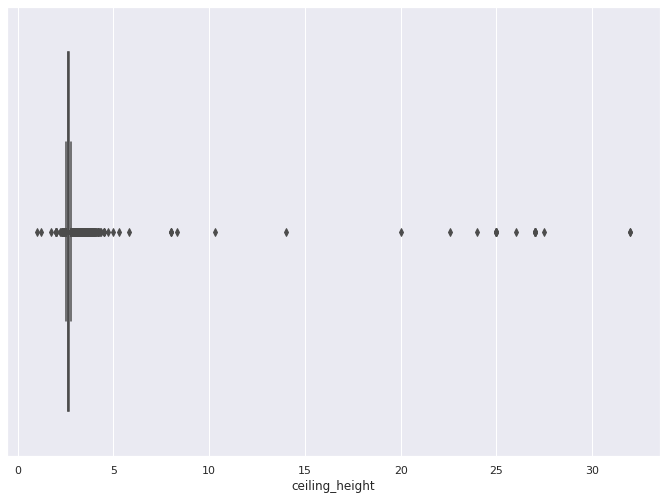

In [48]:
sns.boxplot(good_data['ceiling_height']);

Видно, что значение в 100 метров является однозначно выбросом - уберем данную запись. Однако значения выше 6 метров также подозрительны.

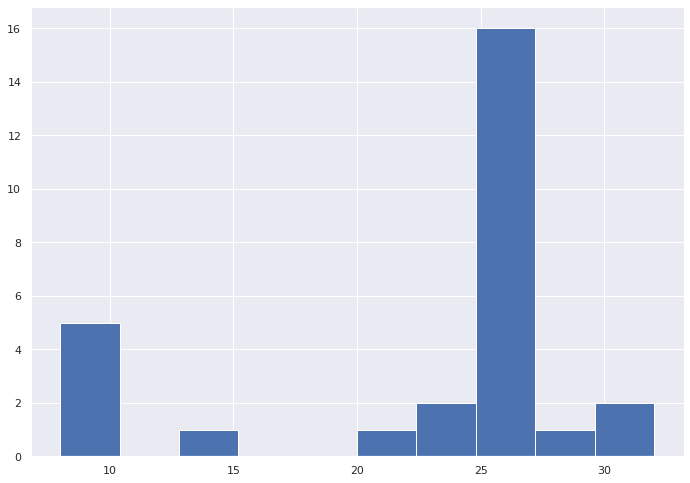

In [49]:
good_data = good_data.drop(good_data.query('ceiling_height == 100').index).reset_index(drop= True)

good_data.query('ceiling_height > 6')['ceiling_height'].hist();

Очевидно значения от 6 метров до 20 являются выбросом, значения от 20 до 40 метров - очевидно ошибочно увеличенные в 10 раз значения

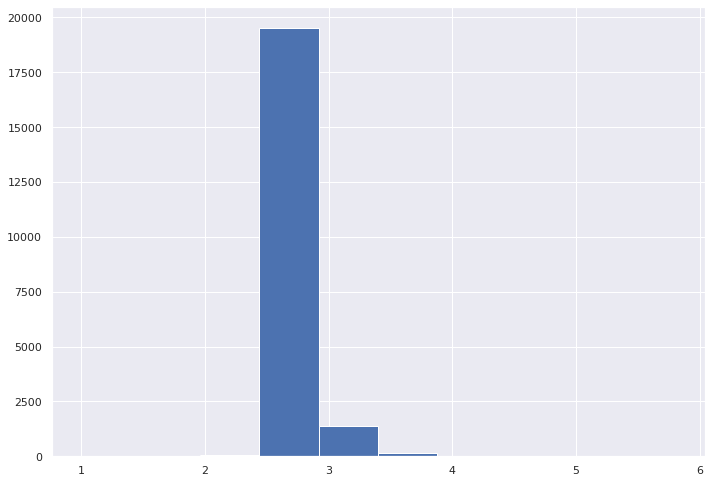

In [50]:
good_data = good_data.drop(good_data.query('ceiling_height > 6 and ceiling_height < 20').index).reset_index(drop= True)
good_data.loc[good_data['ceiling_height'] > 6, 'ceiling_height'] =good_data.loc[good_data['ceiling_height'] > 6, 'ceiling_height'] / 10

good_data['ceiling_height'].hist();

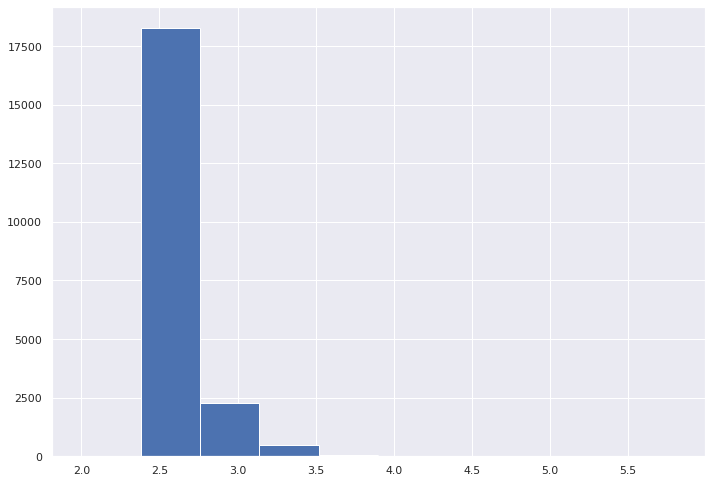

In [51]:
good_data = good_data.drop(good_data.query('ceiling_height < 2')['ceiling_height'].index).reset_index(drop= True)
good_data['ceiling_height'].hist();

**Поиск и удаление аномальных значений количества комнат**

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


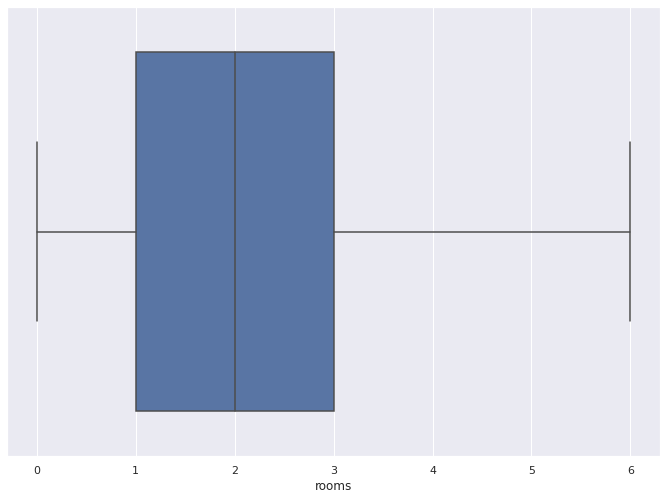

In [52]:
sns.boxplot(good_data['rooms']);

rooms
Верхняя граница при поиске выборосов:  6.0
Удалено 0.0 % значений


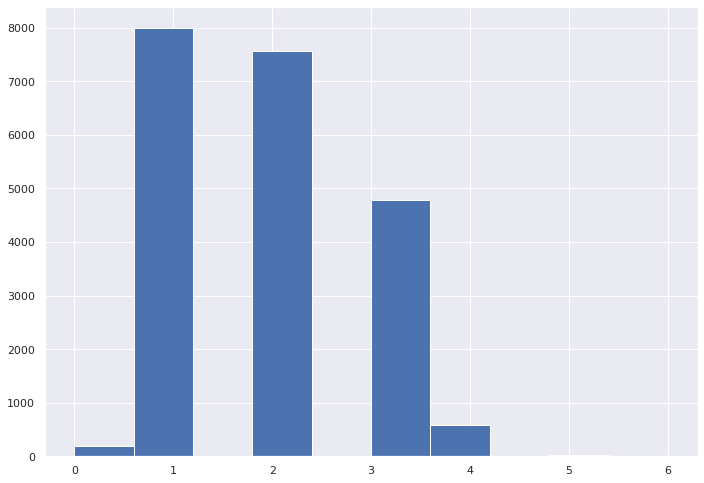

In [53]:
count = good_data['rooms'].count()
q1 = good_data['rooms'].describe()['25%']
q3 = good_data['rooms'].describe()['75%']
median = good_data['rooms'].describe()['50%']
iqr = q3 - q1
h_lim = q3 + 1.5 * iqr


good_data = good_data.drop(good_data.query('rooms > @h_lim').index)
good_data.reset_index(drop= True, inplace= True)

good_data['rooms'].hist();
print('rooms')
print('Верхняя граница при поиске выборосов: ', h_lim)
del_part = ((count - good_data['rooms'].count()) / count * 100).round(2)
print('Удалено', del_part, '% значений')

In [54]:
print(good_data.query('rooms < 1 and studio == True')['studio'].count())
print(good_data.query('rooms < 1 and studio == False')['studio'].count())
good_data.query('rooms < 1 and studio == False')['total_area'].describe()

137
58


count    58.000000
mean     26.874655
std       4.110738
min      16.000000
25%      25.000000
50%      26.100000
75%      28.162500
max      42.630001
Name: total_area, dtype: float64

Почти все объекты с менее чем 1 комнатой - студии. Однако есть 59 объектов без комнат и нестудий, судя по их площади это все же студии - заменим значения в соответствующем столбце.

In [55]:
good_data.loc[(good_data['rooms'] < 1) & (good_data['studio'] == False), 'studio'] = True
good_data.query('rooms < 1 and studio == False')['studio'].count()

0

**Поиск и удаление аномальных значений площади гостиной**

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


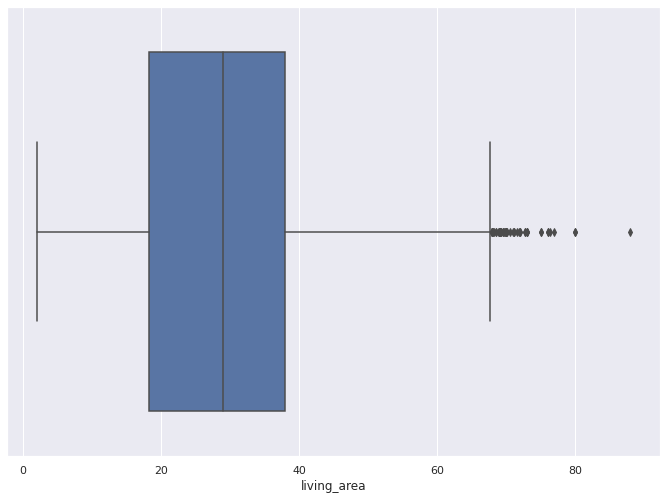

In [56]:
sns.boxplot(good_data['living_area']);

living_area
Верхняя граница при поиске выборосов:  67.62139439582825
Удалено 0.27 % значений


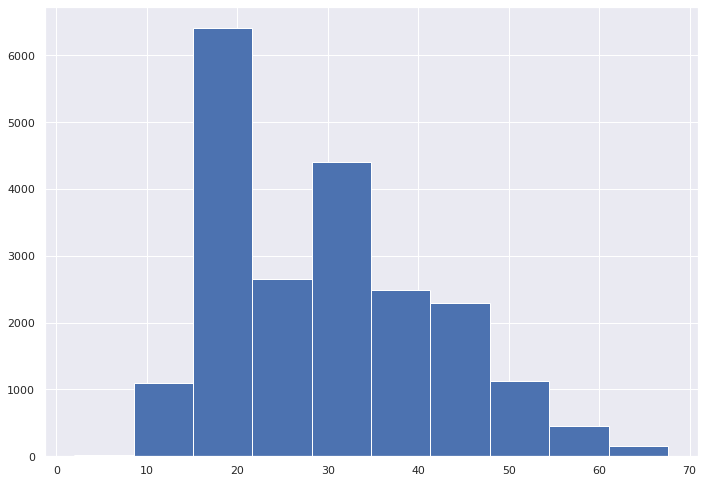

In [57]:
count = good_data['living_area'].count()
q1 = good_data['living_area'].describe()['25%']
q3 = good_data['living_area'].describe()['75%']
median = good_data['living_area'].describe()['50%']
iqr = q3 - q1
h_lim = q3 + 1.5 * iqr


good_data = good_data.drop(good_data.query('living_area > @h_lim').index)
good_data.reset_index(drop= True, inplace= True)

good_data['living_area'].hist();
print('living_area')
print('Верхняя граница при поиске выборосов: ', h_lim)
del_part = ((count - good_data['living_area'].count()) / count * 100).round(2)
print('Удалено', del_part, '% значений')

**Поиск и удаление аномальных значений площади кухни**

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


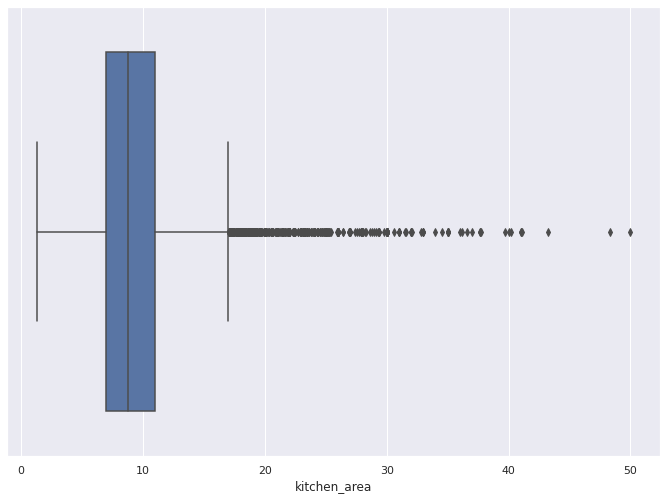

In [58]:
sns.boxplot(good_data['kitchen_area']);

kitchen_area
Верхняя граница при поиске выборосов:  17.0
Удалено 3.09 % значений


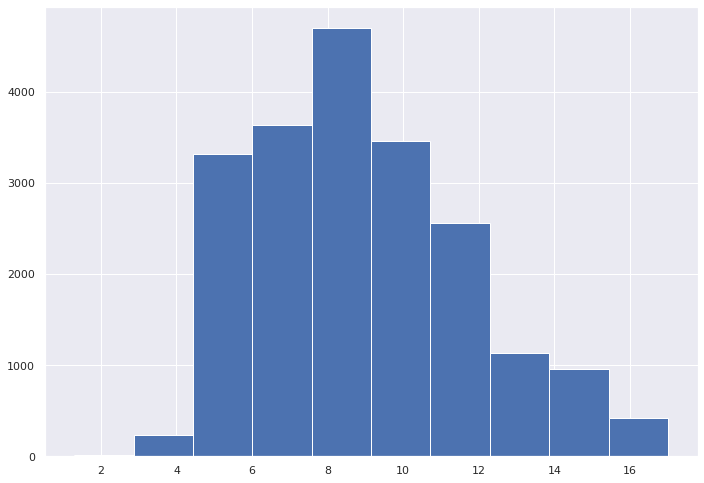

In [59]:
count = good_data['kitchen_area'].count()
q1 = good_data['kitchen_area'].describe()['25%']
q3 = good_data['kitchen_area'].describe()['75%']
median = good_data['kitchen_area'].describe()['50%']
iqr = q3 - q1
h_lim = q3 + 1.5 * iqr


good_data = good_data.drop(good_data.query('kitchen_area > @h_lim').index)
good_data.reset_index(drop= True, inplace= True)

good_data['kitchen_area'].hist();
print('kitchen_area')
print('Верхняя граница при поиске выборосов: ', h_lim)
del_part = ((count - good_data['kitchen_area'].count()) / count * 100).round(2)
print('Удалено', del_part, '% значений')

**Поиск и удаление аномальных значений количества балконов**

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    13013
1     3726
2     3284
5      222
4      124
3       57
Name: balcony, dtype: int64

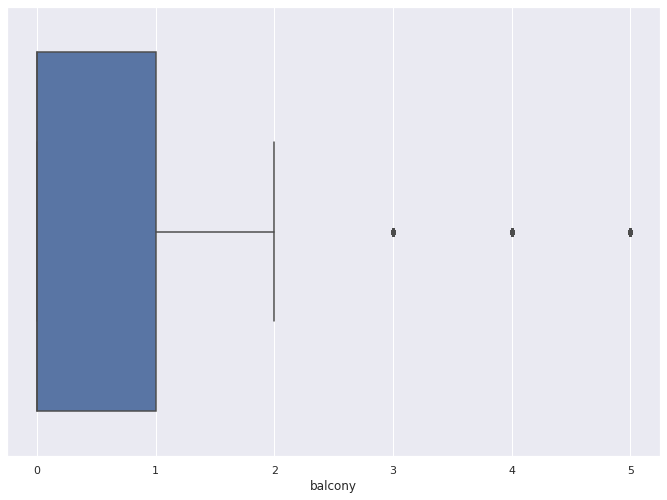

In [60]:
sns.boxplot(good_data['balcony'])
good_data['balcony'].value_counts()

balcony
Верхняя граница при поиске выборосов:  2.5
Удалено 1.97 % значений


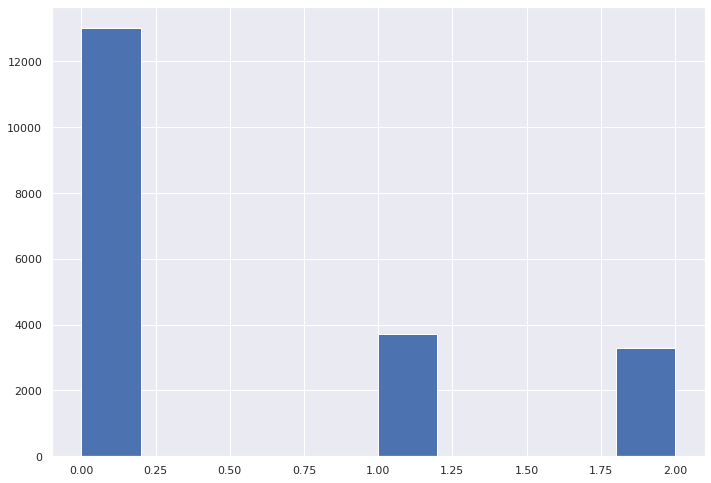

In [61]:
count = good_data['balcony'].count()
q1 = good_data['balcony'].describe()['25%']
q3 = good_data['balcony'].describe()['75%']
median = good_data['balcony'].describe()['50%']
iqr = q3 - q1
h_lim = q3 + 1.5 * iqr


good_data = good_data.drop(good_data.query('balcony > @h_lim').index)
good_data.reset_index(drop= True, inplace= True)

good_data['balcony'].hist();
print('balcony')
print('Верхняя граница при поиске выборосов: ', h_lim)
del_part = ((count - good_data['balcony'].count()) / count * 100).round(2)
print('Удалено', del_part, '% значений')

In [62]:
rows_drop = round((data.shape[0] - good_data.shape[0]) / data.shape[0] * 100)
print(f'В результате предобработки удалено {data.shape[0] - good_data.shape[0]} записей или {rows_drop}%')

В результате предобработки удалено 3676 записей или 16%


##  Исследовательский анализ данных

###  Добавление новых столбцов

- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах 

In [63]:
good_data.head(1)

total_images  last_price  total_area first_day_exposition  rooms  \
0             7   3350000.0   40.400002           2018-12-04      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.65            11         18.6      1          True   False   

   open_plan  kitchen_area  balcony   locality_name  airports_nearest  \
0      False          11.0        2  посёлок шушары           12817.0   

   city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0               18603.0               0.0            NaN               0.0   

   ponds_nearest  days_exposition  na_ponds_nearest  na_parks_nearest  
0            NaN             81.0              True              True

In [64]:
good_data['meter_price'] = good_data['last_price'] / good_data['total_area']
good_data['day_published'] = good_data['first_day_exposition'].dt.weekday
good_data['month_published'] = good_data['first_day_exposition'].dt.month
good_data['year_published'] = good_data['first_day_exposition'].dt.year

good_data['city_centers_nearest_km'] = (good_data['city_centers_nearest'] / 1000).round() 

good_data.head(1)

total_images  last_price  total_area first_day_exposition  rooms  \
0             7   3350000.0   40.400002           2018-12-04      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.65            11         18.6      1          True   False   

   open_plan  kitchen_area  balcony   locality_name  airports_nearest  \
0      False          11.0        2  посёлок шушары           12817.0   

   city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0               18603.0               0.0            NaN               0.0   

   ponds_nearest  days_exposition  na_ponds_nearest  na_parks_nearest  \
0            NaN             81.0              True              True   

    meter_price  day_published  month_published  year_published  \
0  82920.789062              1               12            2018   

   city_centers_nearest_km  
0                     19.0

In [65]:
good_data['floor_type'] = pd.Series(dtype= 'str')
good_data.loc[good_data['floor'] == 1, 'floor_type'] = 'первый'
good_data.loc[good_data['floor'] == good_data['floors_total'], 'floor_type'] = 'последний'
good_data['floor_type'] = good_data['floor_type'].fillna('другой')
display(good_data.head(1))
#good_data['floor_type'] = good_data['floor_type'].astype(object)
good_data['floor_type'].value_counts()

total_images  last_price  total_area first_day_exposition  rooms  \
0             7   3350000.0   40.400002           2018-12-04      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.65            11         18.6      1          True   False   

   open_plan  kitchen_area  balcony   locality_name  airports_nearest  \
0      False          11.0        2  посёлок шушары           12817.0   

   city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0               18603.0               0.0            NaN               0.0   

   ponds_nearest  days_exposition  na_ponds_nearest  na_parks_nearest  \
0            NaN             81.0              True              True   

    meter_price  day_published  month_published  year_published  \
0  82920.789062              1               12            2018   

   city_centers_nearest_km floor_type  
0                     19.0     первый

другой       14602
последний     2779
первый        2642
Name: floor_type, dtype: int64

###  Изучение отдельных параметров


- цена объекта;
- высота потолков;
- общая площадь;
- жилая площадь;
- площадь кухни;
- количество комнат;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.


last_price


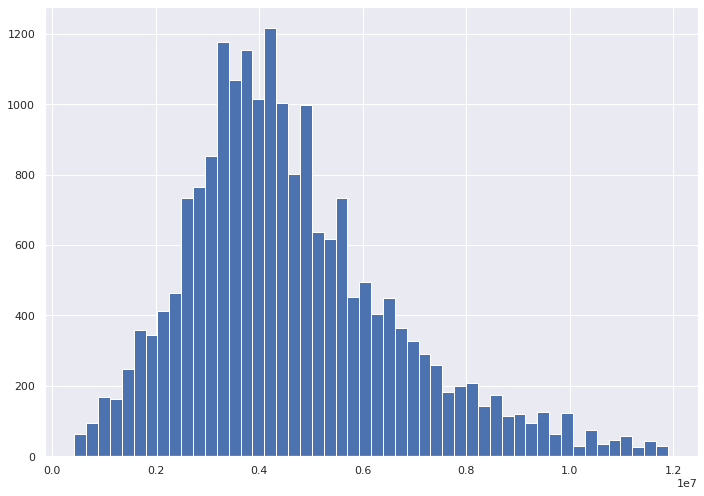

----------------------------------
ceiling_height


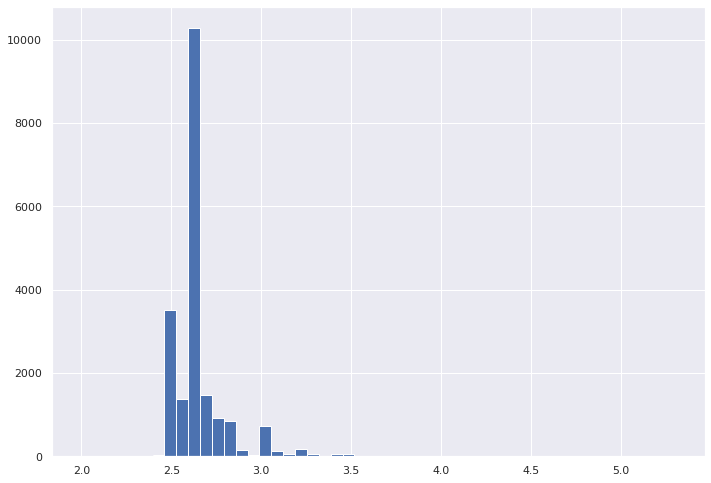

----------------------------------
total_area


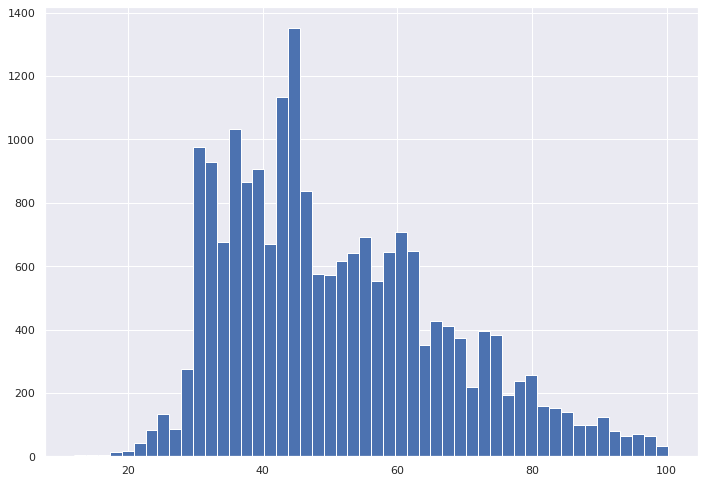

----------------------------------
living_area


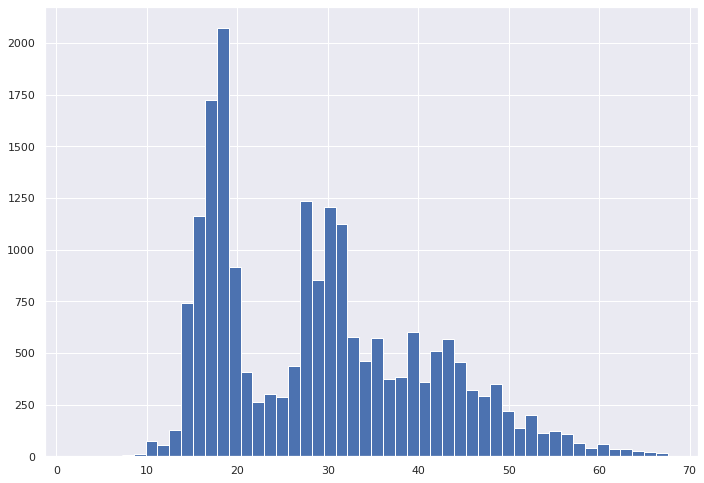

----------------------------------
kitchen_area


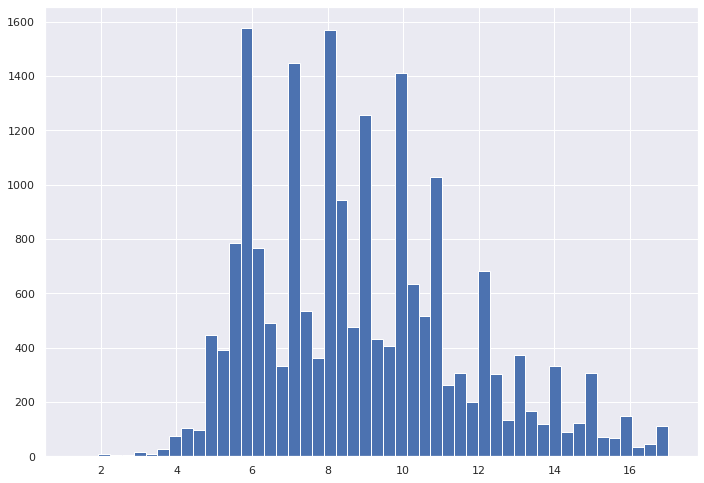

----------------------------------
rooms


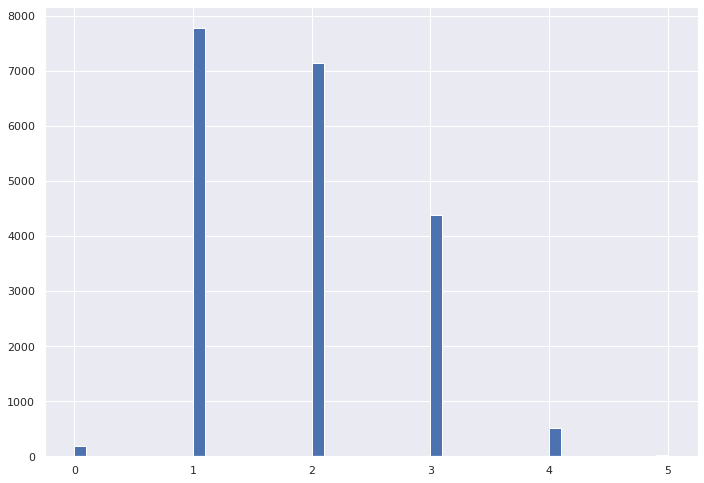

----------------------------------
floor


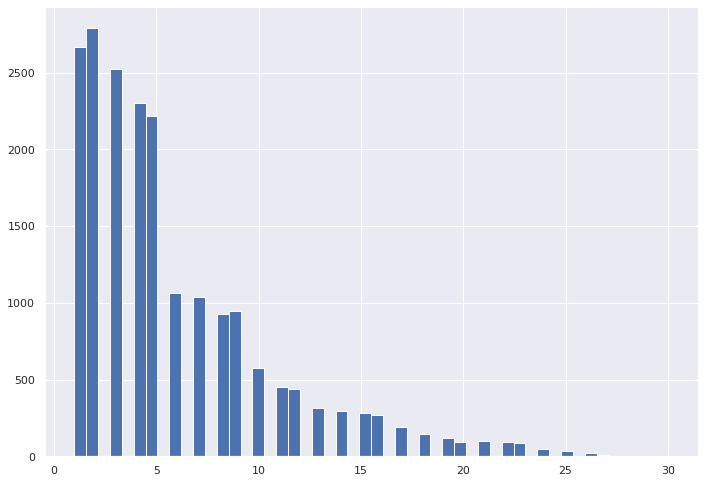

----------------------------------
floor_type


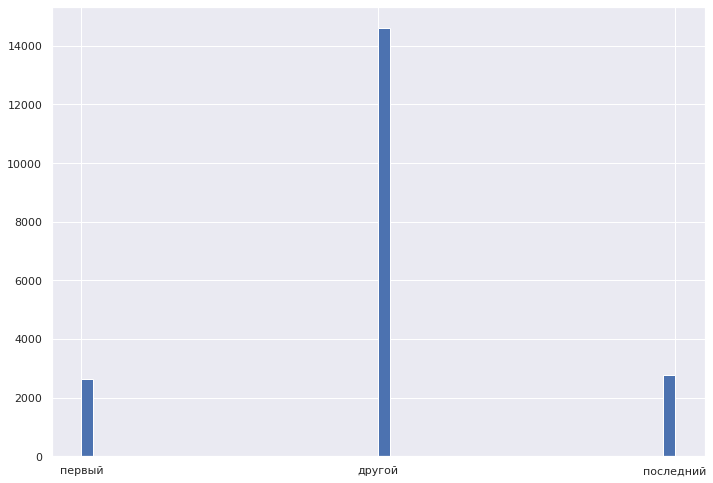

----------------------------------
floors_total


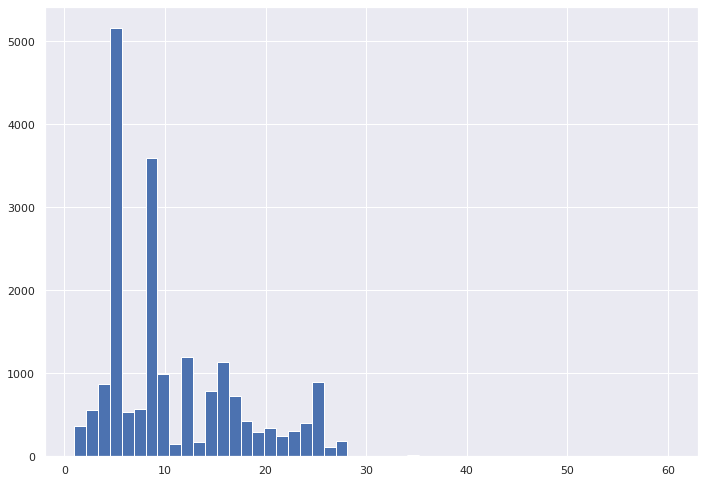

----------------------------------
city_centers_nearest_km


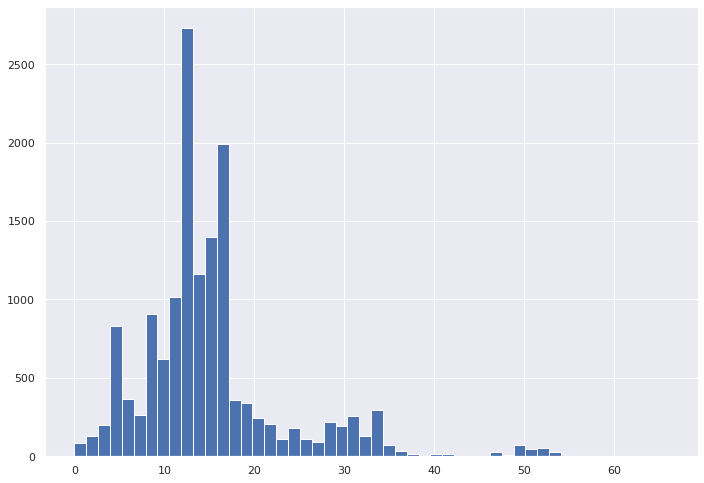

----------------------------------
airports_nearest


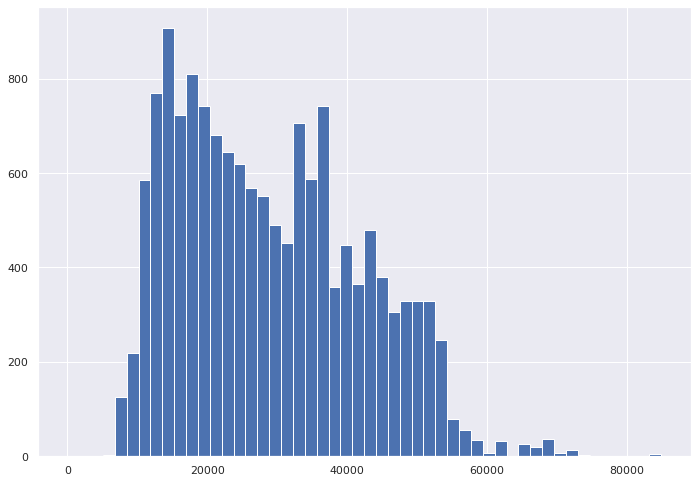

----------------------------------
parks_nearest


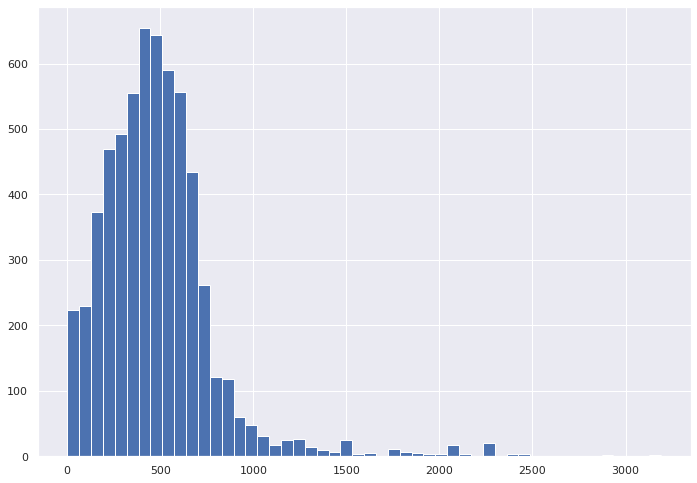

----------------------------------
days_exposition


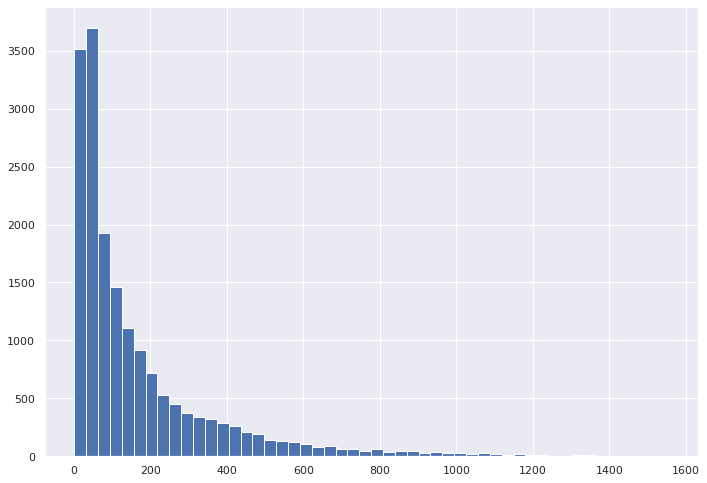

----------------------------------
day_published


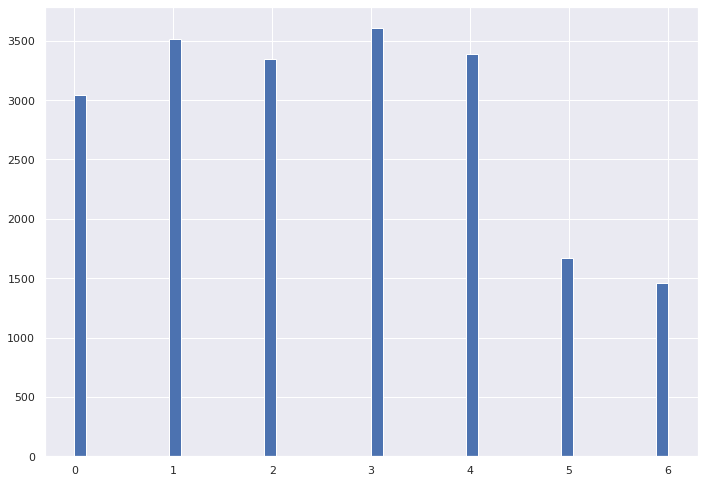

----------------------------------
month_published


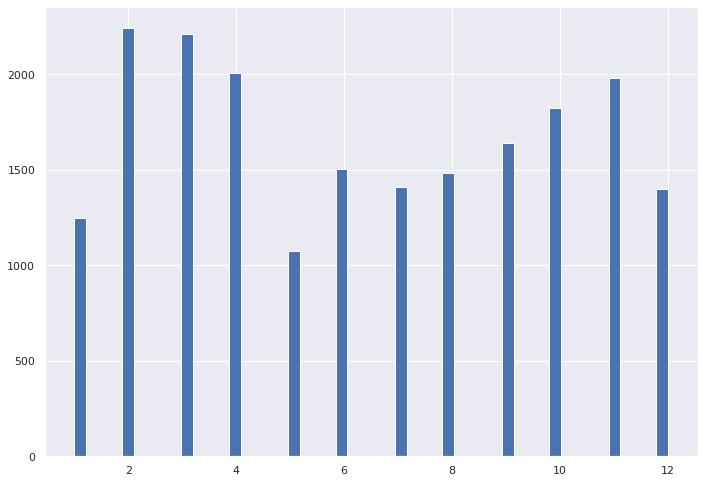

----------------------------------


In [66]:
columns_to_check = ['last_price', 'ceiling_height', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor', 'floor_type', 'floors_total', 'city_centers_nearest_km', 'airports_nearest', 'parks_nearest', 'days_exposition', 'day_published', 'month_published']

for column in columns_to_check:
    print(column)
    good_data[column].hist(bins= 50)
    plt.show()
    print('----------------------------------')

Жилая площадь - гистограмма формирует 2 пика, хотя у общей площади нормальное распределение. Возможно это связано с существованием 2 типовых решений планировки квартир, 2 серий домов. В одной серии жилая площадь примерно 15м2, в другой - 30м2. Возможно это корреляция с количеством комнат.

Площадь кухни - чаще всего в районе 8-9м2

По комнатам - больше всего продается однокомнатных квартир (около 8000), затем 2-комнатные(7000),  потом 3-комнатные (4000), единичные объявления студий и 4-комнатных квартир.

Этаж квартиры - чем меньше этаж, тем больше объявлений. Вероятнее всего связано с распространненостью малоэтажных зданий - видны четкие скачки количества объявлений между 5 и 6 этажами, 9 и 10. Данные об общей этажности здания это подтверждают

В остальном данные непримечательны

###  Изучение скорости продажи квартиры

Среднее:  169.25812
Медиана:  89.0


count    17643.000000
mean       169.258118
std        207.926819
min          1.000000
25%         43.000000
50%         89.000000
75%        214.000000
max       1553.000000
Name: days_exposition, dtype: float64

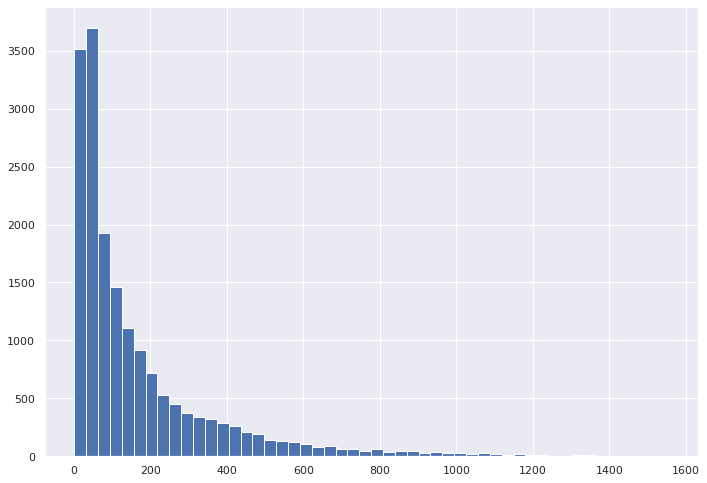

In [67]:
good_data['days_exposition'].hist(bins= 50)
print('Среднее: ', good_data['days_exposition'].mean())
print('Медиана: ', good_data['days_exposition'].median())

good_data['days_exposition'].describe()

Cудя по полученным данным в среднем квартиры продаются за 3 месяца. Продажу менее чем за месяц можно назвать быстрой, но могут быть и необычно долгие продажи - объявления висят больше полугода.

###   Поиск факторов, наиболее влияющих на стоимость

Какие факторы больше всего влияют на общую (полную) стоимость объекта?
 Изучите, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

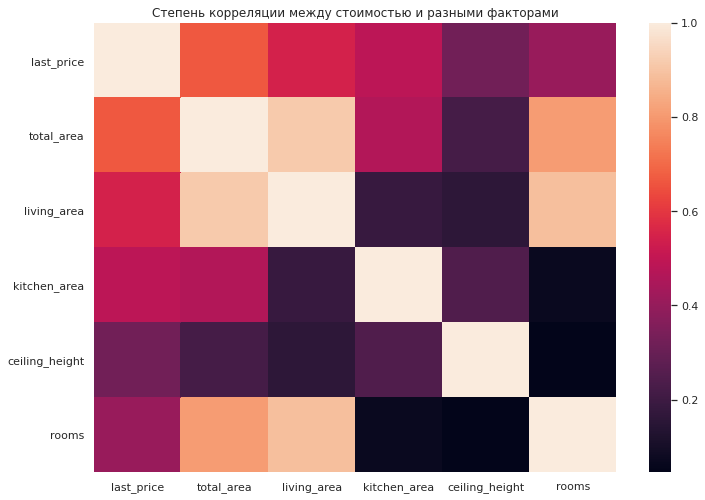

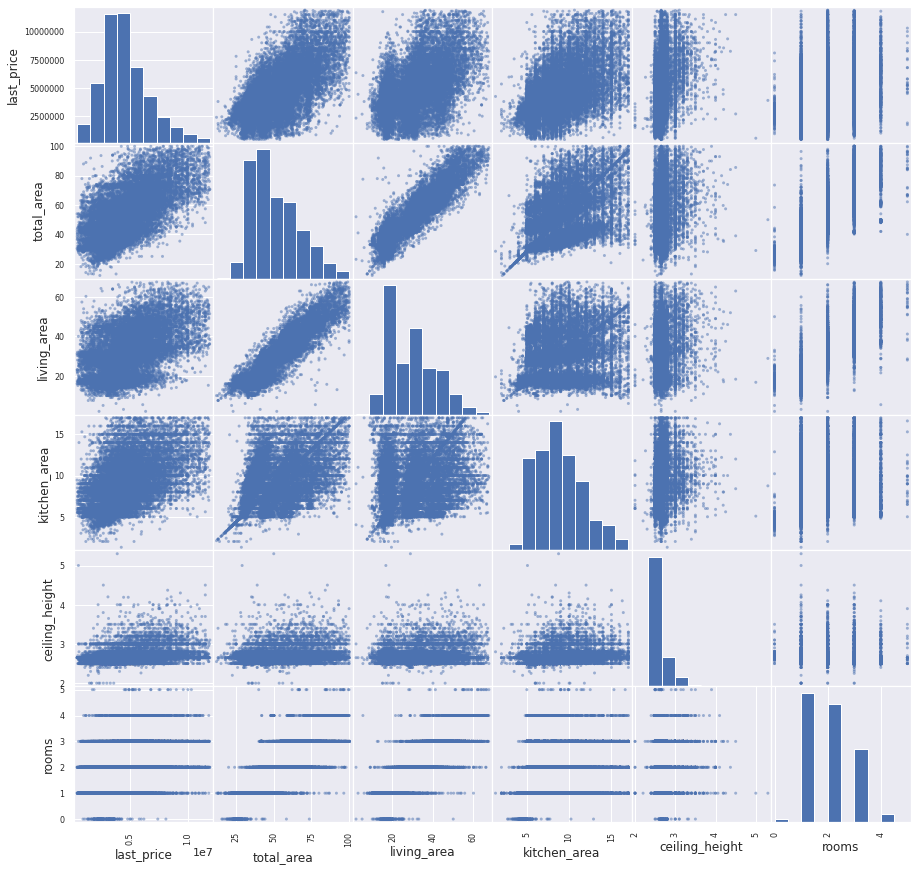

In [68]:
price_corr_columns = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'ceiling_height', 'rooms', 'floor_type', 'first_day_exposition']

price_corr_df = good_data[price_corr_columns]
price_corr_df.corr()
sns.heatmap(price_corr_df.corr())
plt.title('Степень корреляции между стоимостью и разными факторами')

pd.plotting.scatter_matrix(price_corr_df, figsize= (15, 15))
plt.show()



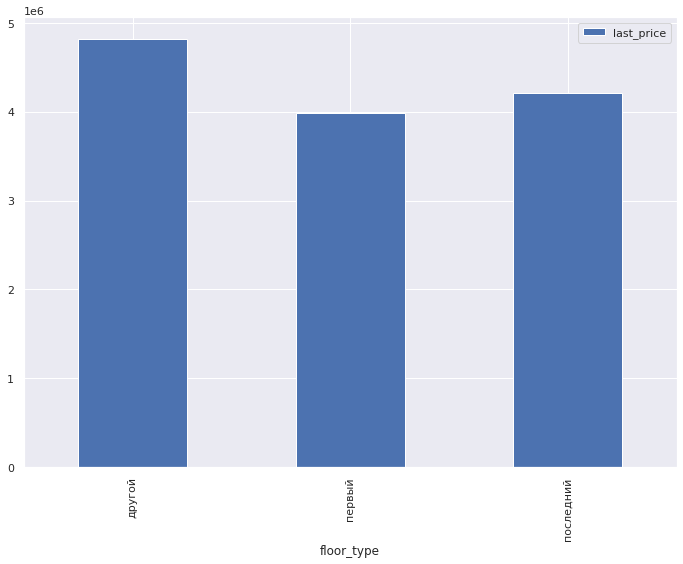

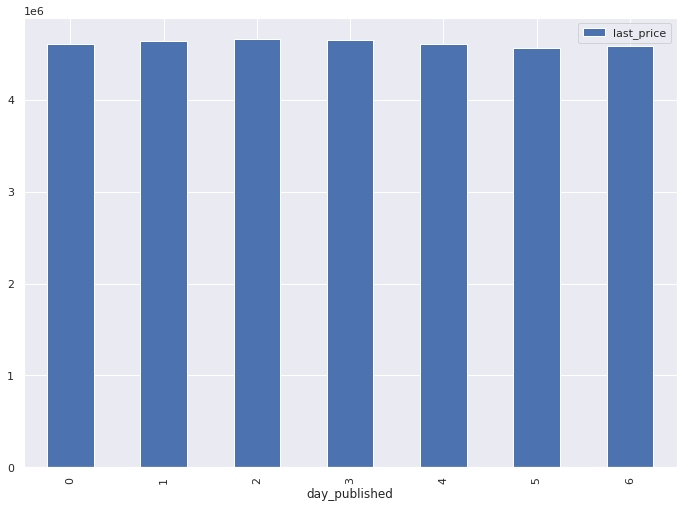

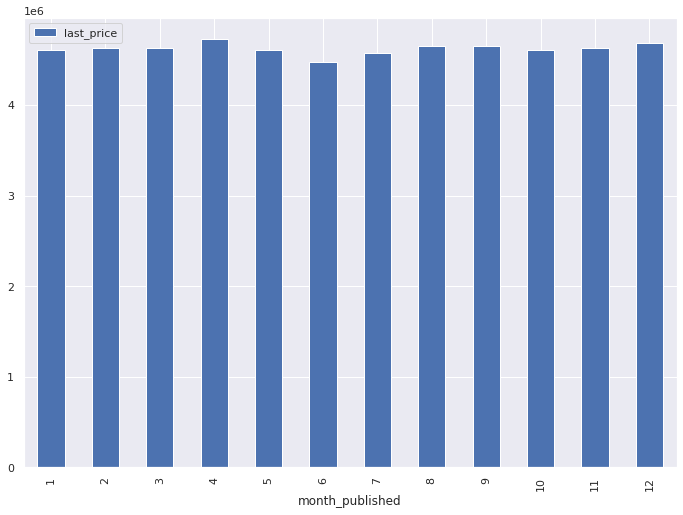

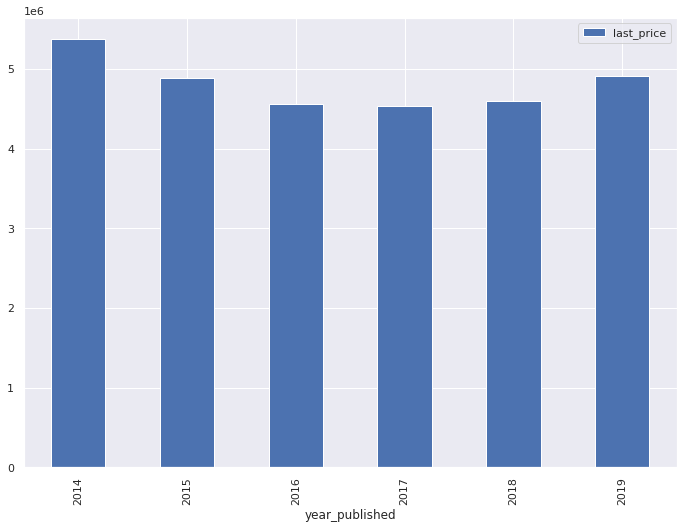

In [69]:
cat_corrs = ['floor_type', 'day_published', 'month_published', 'year_published']

for column in cat_corrs:
    cat_corrs_pivot = good_data.pivot_table(index= column, values= 'last_price')
    cat_corrs_pivot.plot(kind= 'bar')

Таким образом видно, что стоимость квартиры сильнее всего зависит от общей площади и всех связанных характеристик:  жилой площади, площади кухни и количества комнат.
Квартиры не на первом и не на последнем этажах в среднем дороже - 4.8 млн, в то время как среднее для последнего этажа около 4,2 млн, первого этажа - 4 млн.
Средняя цена в объявлении снизилась с 2014 по 2016 год с 5,3 млн до 4,5, затем ценник держался на одном уровне до 2018, после чего тенденция на рост цены - 4,9 млн на момент 2019 года.
С остальными факторами нет корреляции - они не имеют влияния.

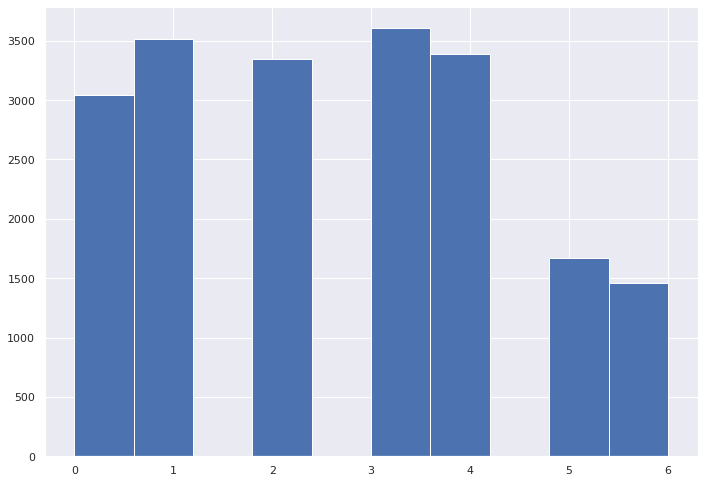

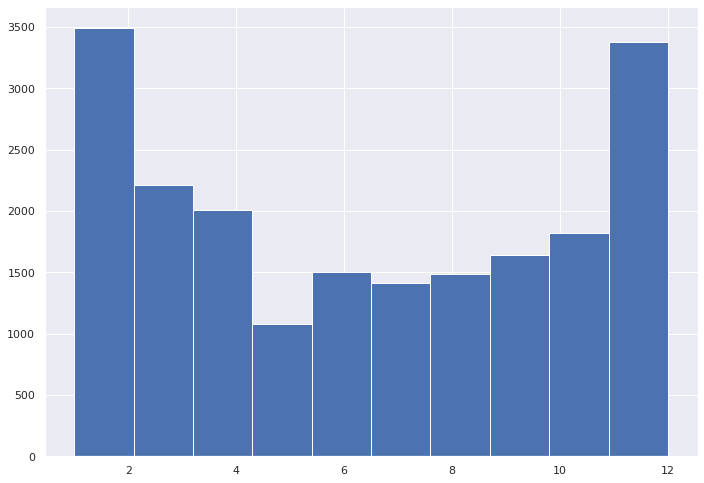

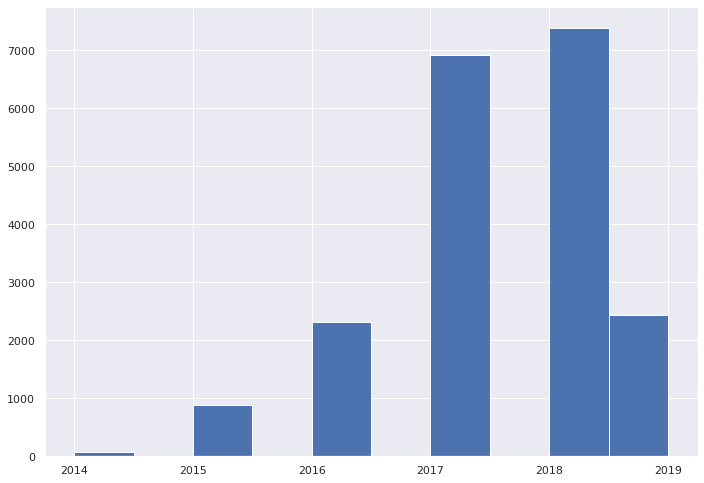

In [70]:
good_data['day_published'].hist();
plt.show()
good_data['month_published'].hist();
plt.show()
good_data['year_published'].hist();

###  Влияние локации на стоимость 

In [71]:
meter_price_pivot = good_data.pivot_table(index= 'locality_name', values= 'meter_price', aggfunc=['mean', 'count'])
meter_price_pivot.columns = ['mean_meter_price', 'count']
meter_price_pivot = meter_price_pivot.sort_values(by= 'count', ascending= False).head(10)

<AxesSubplot:xlabel='locality_name'>

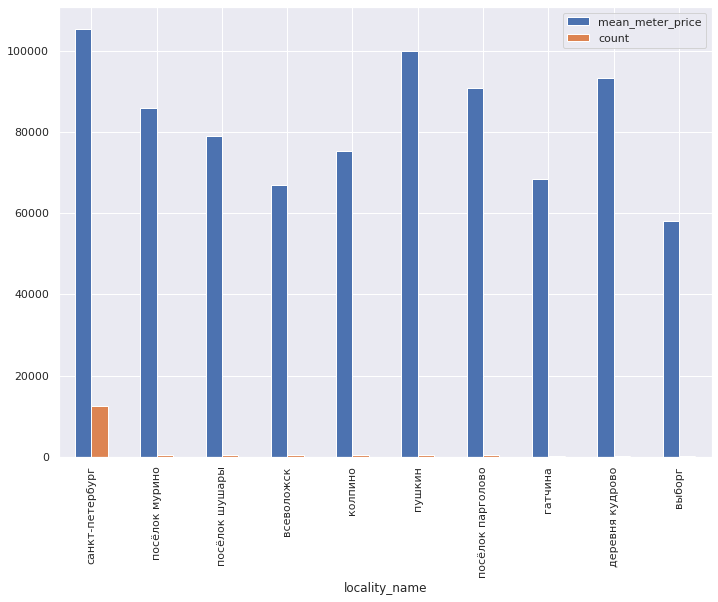

In [72]:
meter_price_pivot.plot(kind= 'bar')

Таким образом самая высокая стоимость м2 (среди 10 населенных пунктов с наибольшим количеством объявлений) в Петербурге и составляет 106 000 р. Наименьшая стоимость м2 в Выборге - 58 000 р.

###  Влияние отдаленности от центра Санкт-Петербурга на стоимость

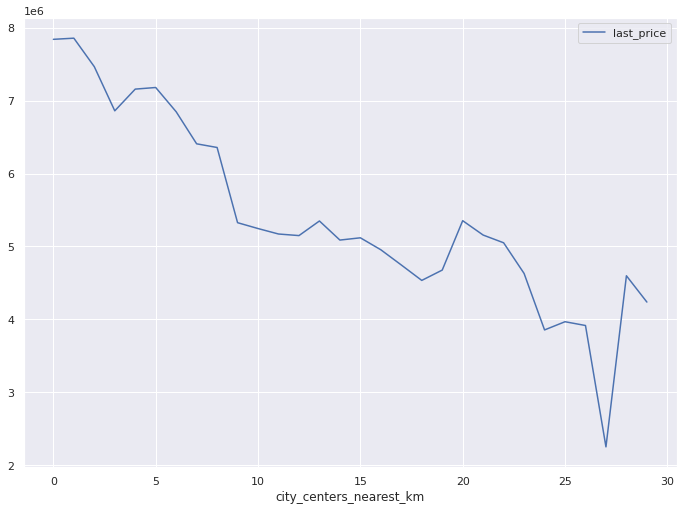

In [73]:
good_data.query('locality_name == "санкт-петербург"').pivot_table(index= 'city_centers_nearest_km', values= 'last_price').plot(grid= True);


Судя по графику имеется сильная обратная корреляция между удаленностью от центра города и стоимостью жилья

##  Общий вывод

1) Выводы по качеству предоставленных данных:
- Имеется группа пропусков в картографических данных. В первую группу входят пропуски геоданных о дешевых квартирах – в связи с этим все дальнейшие выводы о стоимости и связанных характеристиках (метражи) не учитывают существование таких объявлений. При критичности данной информации стоит задуматься над автоматическим добавлением ее в объявление. Во второй группе пропусков геоданных – отсутствие данных о расстоянии до ближайшего пруда или парка, если в радиусе 3км нет таковых. Вероятнее всего данный пропуск вряд ли является критичным. 
- Имелись единичные пропуски в данных о населенном пункте – возможно стоит проверить на техническую проблему.
- Имелись дубликаты в названиях населенных пунктов – для ускорения обработки данных и уменьшения вероятности ошибки рекомендуется создать фиксированный список локаций, избегать ручного ввода
- В данных было около 50 записей с высотой потолка выше 8 метров, что подозрительно. Возможно существует техническая ошибка/ нет контроля значений ручного ввода.

2)Выводы из исследовательского анализа:
- на стоимость жилья в первую очередь оказывают влияние метрические характеристики, а именно площадь жилья общая, в некоторой степени влияют площадь кухни, жилая площадь и высота потолка(практически не влияет)
- самая высокая стоимость м2 (среди 10 населенных пунктов с наибольшим количеством объявлений) в Петербурге и составляет 106 000 р. Наименьшая стоимость м2 в Выборге - 58 000 р
- Квартиры не на первом и не на последнем этажах в среднем дороже - 4.8 млн, в то время как среднее для последнего этажа около 4,2 млн, первого этажа - 4 млн.
- Средняя цена в объявлении снизилась с 2014 по 2016 год с 5,3 млн до 4,5, затем ценник держался на одном уровне до 2018, после чего тенденция на рост цены - 4,9 млн на момент 2019 года.
- Судя по графику имеется сильная обратная корреляция между удаленностью от центра города и стоимостью жилья- длительность объявления не имеет какой-либо корреляции с исследуемыми параметрами
- с годами количество объявлений выросло
- в выходные объявления публикуют реже, чем в будни (работают риэлторы?)
- в течение года количество объявлений циклично растет к зиме, где достигает пика и падает летом